# 模块导入

In [2]:
#1.导入文字和表格模组
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH  #设置对象居中、对齐等。
from docx.enum.text import WD_TAB_ALIGNMENT,WD_TAB_LEADER,WD_LINE_SPACING  #设置制表符等
from docx.shared import Inches   #设置图像大小
from docx.shared import Pt,Cm   #设置像素、缩进等
from docx.shared import RGBColor    #设置字体颜色
from docx.shared import Length    #设置宽度
from docx.oxml.ns import qn  #设置中文版式
import os

from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.enum.text import WD_ALIGN_PARAGRAPH


#2.导入数据处理模组
import pymysql
import psycopg2
import pymysql.cursors
import pandas as pd
import numpy as np
from functools import reduce#计算求和
from decimal import Decimal#保证比例呈现两位小数
import re
import math #向上取整函数

#3.导入图像模组
from pyecharts.charts import Bar,Line,PictorialBar,Map,Pie,Sankey,Grid,Gauge,Radar,WordCloud,Liquid
from pyecharts import options as opts
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
from pyecharts.commons.utils import JsCode
from pyecharts.components import Image
from pyecharts.options import ComponentTitleOpts
import seaborn as sns
import matplotlib.pyplot as plt

# 变量声明

In [33]:
xxmc = '西安工业大学'  #学校名称
xxsf = '陕西省'           #学校省份
xxcs = '西安市'           #学校城市
bynd = 2022               #毕业年份
pic_path = 'model/' #存储路径

#颜色设置
color_1 = '#147BC5' #主配色
color_2 = '#FBB03E' #主配色
color_3 = '#24AAE1' #主配色
color_4 = '#E3798D' 
color_5 = '#00ABCB' 


#矢量图设置,可以在阿里巴巴矢量图网站自行查找需要的图标,复制SVG代码
bd = 'path://M945.08544 366.6432l-425.97376-183.1936a20.5312 20.5312 0 0 0-8.12544-1.6896c-2.7648 0-5.52448 0.5632-8.14592 1.6896L76.87168 366.6432c-8.98048 3.84512-14.92992 13.65504-14.92992 24.59136 0 10.9568 5.94944 20.74112 14.92992 24.60672L502.8352 599.04a20.29056 20.29056 0 0 0 16.27136 0l331.1872-142.43328v145.7152c-17.75104 9.40032-30.08512 29.8496-30.08512 53.62688 0 23.7824 12.33408 44.22656 30.08512 53.62688v50.83136h43.6224v-50.82112c17.76128-9.40032 30.1056-29.8496 30.1056-53.63712s-12.34432-44.2368-30.1056-53.63712V437.84704l51.16416-22.00576c8.97536-3.8656 14.9248-13.65504 14.9248-24.60672 0-10.93632-5.94944-20.74624-14.9248-24.59136z m-434.0992 269.16352a47.96928 47.96928 0 0 1-19.03104-3.95776L226.4064 517.632v157.70112c0 129.16224 193.65888 167.936 254.208 167.936h60.69248c45.35808 0 254.22848-38.77376 254.22848-167.936v-157.696l-265.55904 114.21184a47.76448 47.76448 0 0 1-18.9952 3.95776z'
sf = 'path://M0,10 L10,10 C5.5,10 5.5,5 5,0 C4.5,5 4.5,10 0,10 z'
male = 'path://M724.8 314.2c2.8 1.6 5.5 3.2 8.2 5.1l8.2 5.6 0.1 9.8c0.4 28.5-3 52.6-10.4 71.1-6.9 17-17.1 29.7-30.7 37.3-9.3 33.1-20.2 63.8-35.6 89.6-17.8 29.7-41.2 52.5-74.4 64.8-14.8 5.4-52.7 8-89.1 7.4-35.2-0.5-70.5-4-84.5-10.5-30.1-13.9-51.3-37.2-67.4-66.3-13.8-24.8-23.6-53.7-32.1-84.2-14.1-7.4-24.7-20-31.8-37.1-7.8-18.7-11.4-43.2-10.9-72.2l0.1-9.9 8.2-5.5c2.1-1.4 4.2-2.7 6.3-3.9-9.2-114.1-5.7-156.3 36.6-204.5 82.6-67.7 272-65.3 355.7-3.9 57 53.8 61 114.1 43.5 207.3zM551.3 644.1l1.2 26.1-15.5 25.6 21.6 141.8L647 647.5l134.7-4.6c69.6 65.8 114.2 220.8 103.2 321.9H134.2c1.9-88.8 18.2-240.4 106.6-317.6l121.7 1.1 114 188 21.4-140.6-15.5-25.5 1.2-26.1c29.5-1.6 38.2-1.6 67.7 0zM652 273.7c-53.5 10.5-133.2 19.6-196.2-15.8-24.2-13.6-59.7 14.3-88.7 11.4-9 17.8-15.7 37.3-19.6 58l-3.2 17.1-17.2-1.7c-3.2-0.3-6.5 0.1-10 1.3-1.6 0.5-3.1 1.1-4.7 1.9 0.5 19 3.1 34.7 8 46.5 4.3 10.4 10.4 17.1 18.2 19.6l10.1 3.1 2.8 10.1c8.4 31.3 17.9 60.8 31.2 84.8 12.3 22.3 28.1 40 50 50.1 9.2 4.2 38.4 6.6 69 7.1 32.5 0.5 64.9-1.3 75.6-5.2 24.1-8.9 41.4-26.1 54.9-48.6 14.5-24.2 24.8-54.9 33.8-88.6l2.6-9.6 9.6-3.3c7.6-2.7 13.5-9.6 17.6-20 4.7-11.7 7.3-27.2 7.7-45.8-1.4-0.7-2.8-1.3-4.2-1.7-3.4-1.1-6.6-1.7-9.7-1.5l-16.8 1.1-3.1-16.5c-3.8-19.2-9.7-37.2-17.7-53.8z m0 0'
female = 'path://M354.304 631.808c18.944-7.168 44.544-17.408 56.32-26.624 7.168-5.632 11.264-16.384 12.8-28.16-4.608-3.072-9.216-6.144-12.288-9.728-53.248-54.784-56.32-132.608-56.832-229.376 8.704 1.536 271.872 5.12 284.16 3.584 2.048 109.056-5.632 176.128-68.608 234.496l-1.024 1.024c2.048 12.288 6.144 23.04 12.8 28.16 12.8 9.728 35.84 20.992 51.2 28.16-29.696 108.544-66.048 172.544-103.936 195.584-5.632-20.48-6.144-44.544-0.512-72.192-4.608-2.048-9.216-3.584-14.336-5.632-5.12 6.656-9.728 13.312-13.824 20.48-4.096-6.656-8.704-13.824-13.824-20.48-4.608 2.048-9.216 3.584-14.336 5.632 5.632 29.184 5.12 54.272-1.536 75.776-41.984-19.968-82.944-88.064-116.224-200.704z m393.216 16.384c-9.216-28.672-16.384-64.512-9.728-95.232 16.384-74.24 3.584-138.752-5.12-159.744-20.992-51.2 2.56-101.888-6.656-140.8-14.848-62.464-41.984-105.984-86.016-135.68-60.928-40.96-151.552-37.888-230.4-20.48-69.12 14.848-134.656 49.152-130.56 107.008 3.072 41.984-4.608 71.168-19.968 92.16-13.824 19.456-15.872 39.424-12.8 60.416 9.216 54.272 48.128 83.968 26.624 136.704-18.944 47.616-41.984 124.928-44.544 169.472-31.232 11.776-66.56 26.112-103.936 39.936-28.672 52.736-38.4 125.952-32.768 268.8H890.88c2.56-111.616 1.024-221.184-40.448-296.96-31.744-7.168-68.608-16.896-102.912-25.6z'
#cube = 'path://M42.666667 128m53.333333 0l832 0q53.333333 0 53.333333 53.333333l0 661.333334q0 53.333333-53.333333 53.333333l-832 0q-53.333333 0-53.333333-53.333333l0-661.333334q0-53.333333 53.333333-53.333333Z'
cube = 'path://M62 62h900v900h-900v-900z'
box = 'path://M962 802H 62V 222h 900v 580z      M162 702h 793V 322H 70v 380z'
boy='path://M516.769444 0c-282.75 0-512 229.25-512 512 0 282.75 229.25 512 512 512 282.75 0 512-229.25 512-512 0-282.875-229.25-512-512-512z m0 987.375c-262.5 0-475.375-212.875-475.375-475.375 0-126.125 50.125-247 139.25-336.125S390.769444 36.5 516.769444 36.5c262.625 0 475.375 212.875 475.375 475.375 0.125 262.625-212.75 475.5-475.375 475.5z M788.144444 691.625c2.5 8 4.25 16.25 5.125 24.625 1.625 10 2.375 20 2.375 30.125 0.125 9.625-0.875 19.25-2.75 28.75-1 7.25-3.625 14.25-7.625 20.375-5.5 4.625-12.125 7.875-19.125 9.375-12.75 3.5-25.625 6.25-38.625 8.25-15.5 2.5-32.625 5-51.75 7.25-19.125 2.25-37.875 4.25-57 5.875-19.125 1.625-37.5 2.75-55.375 3.5-17.875 0.75-33.5 1-47 1s-29.125-0.5-47-1.375c-17.875-0.875-35.875-2.125-54.625-3.5-18.75-1.375-37.5-3-55.75-4.875-18.375-1.875-35.5-4-50.625-6.25s-28.25-4.5-39-6.5c-6.875-0.75-13.625-3-19.5-6.625-6.875-8.75-10.625-19.625-10.75-30.75-2.125-22.5-1-45.25 3.25-67.375 1.625-14.375 9.125-27.375 20.75-35.875 11.75-8.625 24.75-15.25 38.625-19.625 14.75-4.875 30.25-9.125 46.625-12.75 14.875-3.125 29.125-8.75 42.25-16.625 7.875-4.375 15.25-9.75 21.875-16 4.875-4.25 8.75-9.375 11.5-15.25 2-5 3.125-10.5 3.125-16s-0.375-11.75-0.75-18.625c-0.25-9-4.125-17.5-10.75-23.5-6.75-5.875-13.75-11.625-20.75-17.25-4.25-3.125-7.625-7.25-10-12-2.875-5.375-5.5-10.75-8-16.25-2.625-6.5-4.875-13.125-6.75-19.875-0.75-0.875-2.375-2.5-4.375-4.875-1.875-3-3.625-6.125-5.125-9.375-2.625-5.5-5-11.125-6.75-17-2.125-6.5-3.75-13.125-4.75-19.875-0.875-4.875-0.75-10 0.375-14.875 0.25-4.625 1.5-9 3.625-13.125 0.125-16.25 1.125-32.375 3.125-48.5 2.25-14.75 5.5-29.25 9.625-43.5 4.25-15.375 11.5-29.75 21.5-42.125 8.5-10.875 18.375-20.5 29.5-28.75 10-7.5 21-13.375 32.625-17.625 11-4.125 22.25-7 33.875-8.625 11-1.5 22-2.375 33.125-2.375 9.375 0.625 18.75 2 27.875 4 6.125 1.25 12 3.125 17.5 5.875 4.375 2.125 8.375 5 12 8.375 3.125 3.125 6.375 6.5 10 9.625h14.375c4.5 0 8.875 0.625 13.125 1.75 4.625 1.375 8.875 3.625 12.75 6.625 5 4.125 9.5 8.75 13.5 13.875 11.25 13.375 19.875 28.75 25.5 45.25 5.25 15.25 9.25 30.75 12 46.625 2.5 16.75 4.125 33.625 4.75 50.5 1 2.625 1.625 5.5 2 8.25 0.375 3.25 0.75 7.125 1.25 11.75 0.375 5.75-0.125 11.625-1.25 17.25-0.5 7.375-2 14.75-4.375 21.75-1.5 4.375-3.875 8.375-6.75 12-2.125 3-5 5.375-8.375 6.875-1.75 6.875-4 13.5-6.75 19.875-2.375 5.5-4.75 11-7.625 16.25-2.5 4.75-6 8.875-10.375 12-8.375 6.5-15.5 12-20.75 16.25-6.25 6-10.375 13.875-11.5 22.5-1.25 6.375-1.625 12.875-1.25 19.375 0.5 7 2.5 13.75 5.625 19.875 3.75 7.375 9 13.875 15.5 19 9.125 7 19.375 12.375 30.25 16 11.5 4 24.25 8 37.875 11.5 13.5 3.5 27.125 7.375 39.875 11.75 12.125 4.125 23.625 9.875 34.25 17 9.5 6.375 16.75 15.875 20.625 26.625z m-240.375-22.75c1.5-2.625 1.625-5.875 0.375-8.625-1.375-3.125-3.25-6.125-5.625-8.625-2.75-2.75-5.625-5.75-9.125-9h-34.25c-3.125 2.75-5.875 5.75-8.375 9-2 2.25-3.625 4.875-4.75 7.625-1.25 2.375-1.125 5.375 0.375 7.625 3.25 6.5 6.375 12 8.75 17 2 4.375 4.875 8.25 8.375 11.375-1.25 4-2.375 10-4.375 17.625s-4 15.5-6 23.5c-2 8.125-3.125 15.75-4.375 22.875-1 5.375-1.5 10.75-1.625 16.25 0.125 3 1.25 6 3.25 8.25 2.5 3.5 5.125 6.875 8 10 2.625 3.25 5.75 6.125 9.125 8.625 4.875 4.625 12.625 4.625 17.5 0 3.75-2.375 7.125-5 10.375-8 3.125-2.875 5.75-6.125 8-9.625 2-2.5 3.25-5.5 3.625-8.625-0.375-4.75-1.125-9.5-2.375-14.125-1.625-6.75-3.125-14.125-4.75-22.5-1.625-8.25-3.625-16.375-5.625-24.25-2-7.75-3.625-14.125-5.125-18.75 3.25-2.875 6.125-6.25 8.375-10 2.75-4.375 6.25-10.25 10.25-17.625z'
girl='path://M516.769444 0c-282.75 0-512 229.25-512 512 0 282.75 229.25 512 512 512 282.75 0 512-229.25 512-512 0-282.75-229.125-512-512-512z m0 987.375c-262.5 0-475.375-212.75-475.375-475.375C41.394444 385.875 91.519444 265 180.644444 175.875S390.769444 36.625 516.769444 36.625c262.625 0 475.375 212.875 475.375 475.375 0.125 262.625-212.75 475.375-475.375 475.375z M788.019444 687c2.625 7.875 4.5 15.875 5.625 24.125 1.25 9.875 1.875 19.75 2 29.625 0 9.5-0.75 19-2.375 28.375-0.875 7.25-3.5 14.25-7.625 20.375-5.625 4.75-12.25 7.875-19.5 9.25-10.375 3.125-23.875 6.375-39.875 9.5-15.875 3.125-33.875 6.25-53.375 9.25-19.5 3-39.375 5.5-59 7.625-19.5 2.125-38.625 3.75-57 4.875-18.375 1.125-33.875 1.625-47.375 1.625-13.5 0-28.625-0.625-46.25-2-17.5-1.25-34.625-2.875-53.375-4.75-18.75-1.875-36.25-4-54.125-6.75-17.875-2.75-34.25-5.125-49-8-14.75-2.75-27.125-5.25-37-7.625-6.875-1.125-13.5-3.375-19.5-6.75-7-8.75-10.875-19.625-11.125-30.875-2.125-22.375-1-45 3.125-67.125 2.125-14 9.75-26.625 21.125-35 11.875-8.375 25.125-14.875 39-19.125 14.75-4.625 30.25-8.875 46.25-12.75 14.875-3.25 29.125-8.875 42.25-16.5 7.5-4.125 14.625-9 21.125-14.625 4.5-3.875 8.25-8.5 11.125-13.625 2.25-4.25 3.625-8.875 4.375-13.625 0.75-5.125 0.875-10.25 0.375-15.25l-30.625-4.625h-119.5c20.5-22.25 34.375-49.875 39.875-79.625-0.25-59.375 8.375-118.375 25.5-175.25 9.5-21.5 23.375-40.75 40.625-56.625 33.875-36.625 83.625-54.125 133-47 64.125-7.25 126.5 24 159.25 79.625 24.875 63.5 38.25 130.875 39.875 199.125 0.875 31.125 15.5 60.25 39.875 79.625h-119.5l-31.875 4.75c-0.375 5.625 0 11.375 1.25 16.875 1.375 6 3.75 11.75 7.125 16.875 4.5 6.125 9.875 11.5 15.875 15.875 8.5 5.75 17.75 10.25 27.5 13.375 12.125 4.5 24.5 8.375 37 11.5 13.5 3.25 26.75 7.125 39.875 11.75 12.125 4.125 23.625 9.75 34.25 16.875 9.625 6.375 16.875 15.75 20.75 26.625z m-266.5 102.375c3.75-0.5 7.25-1.875 10.375-4 4.875-2.875 9.5-6.25 14-9.875 4.375-3.5 8.5-7.375 12.375-11.375 2.5-2.375 4.375-5.5 5.125-8.875-0.375-4.5-1-9-2-13.375-1.625-6.375-3.125-13.375-5.125-21-2-7.625-3.625-15-5.625-22.25-1.25-6-2.875-12-4.75-17.75 4.625-3.25 8.75-7.125 12.375-11.5 3-3.5 4.875-8 5.125-12.75-0.125-3.75-1.5-7.375-4-10.125-2.625-3.5-5.5-6.625-8.75-9.5-3.625-3-8-5.875-12.375-8.875h-35c-4 3-8 6-11.125 8.875-2.875 2.75-5.5 5.875-7.625 9.25-2.25 3-3.5 6.75-3.625 10.5 0.625 3.625 2.375 6.875 4.75 9.5 3.875 4.625 8.125 8.875 12.75 12.75-2 5.25-3.75 10.75-5.125 16.25-2 7-4.375 14.375-6.75 22.25-2.375 7.875-4.375 15.25-6 22.25-1.375 5.125-2.125 10.375-2.375 15.625 0.875 3.375 2.625 6.5 5.125 8.875 4 4.125 8.25 7.875 12.75 11.375 4.625 3.75 9.5 7 14.75 9.875 3.25 2.125 6.875 3.5 10.75 3.875z'
location='path://M528 32C325.056 32 160 196.8 160 399.36c0 75.2 22.656 147.584 65.024 208.48 2.112 3.648 4.256 7.168 6.784 10.592l268.608 353.472c7.296 8.096 17.088 12.576 27.584 12.576 10.368 0 20.224-4.512 28.768-14.08l267.36-352c2.624-3.52 4.896-7.36 6.112-9.6A364.864 364.864 0 0 0 896 399.36C896 196.8 730.912 32 528 32z m0 498.72a131.52 131.52 0 0 1-131.456-131.232 131.488 131.488 0 0 1 262.88 0 131.52 131.52 0 0 1-131.424 131.2z'
airplane='path://M965.40416 342.76608c-19.50976-52.24704-47.744-100.41472-83.92064-143.16288-18.26688-21.58592-50.57408-24.27392-72.15872-6.0096-21.58464 18.26688-24.2752 50.5728-6.00832 72.15872C861.4336 334.42816 893.44 421.88032 893.44 512c0 210.32576-171.11424 381.44-381.44 381.44-210.32704 0-381.44-171.11424-381.44-381.44 0-210.32704 171.11296-381.44 381.44-381.44 60.48896 0 118.30784 13.72672 171.85152 40.8 25.2288 12.75648 56.03328 2.64704 68.7936-22.58816 12.76032-25.23392 2.64576-56.03456-22.58816-68.7936C662.05312 45.5936 588.68992 28.16 512 28.16c-65.29536 0-128.66432 12.8-188.34688 38.04416-57.62176 24.37248-109.36064 59.2512-153.7792 103.66976-44.41856 44.41856-79.29856 96.15744-103.66976 153.77792C40.96 383.3344 28.16 446.70464 28.16 512c0 65.29536 12.8 128.6656 38.04416 188.34688 24.37248 57.62176 59.2512 109.36064 103.66976 153.7792s96.15744 79.29856 153.7792 103.66976C383.33568 983.04 446.70464 995.84 512 995.84c65.29536 0 128.6656-12.8 188.34816-38.04416 57.62176-24.3712 109.36064-59.2512 153.77792-103.66976 44.41856-44.41856 79.29856-96.15744 103.66976-153.7792C983.04 640.6656 995.84 577.29536 995.84 512 995.84 453.79328 985.6 396.85504 965.40416 342.76608z  M718.52672 248.7872c-28.15104 3.3984-50.06336 18.60608-68.33152 39.93472-17.31456 20.21376-35.4048 39.76192-53.09312 59.65568-9.1136 10.24896-17.9328 20.76672-27.22688 30.848-3.22944 3.50464-5.80992 8.89984-12.31232 7.28448-3.84896-0.95616-7.7504-1.69984-11.59936-2.65472-36.48128-9.04064-72.96128-18.08512-109.43232-27.168-60.3712-15.03616-120.73344-30.10816-181.10592-45.14432-9.62304-2.39616-18.24896 0.9856-22.54336 9.56544-3.24864 6.49216-4.54016 14.9376 4.33152 22.69952 5.83808 5.10848 12.08832 9.75232 18.2336 14.5024 19.91424 15.39456 39.84512 30.76864 59.808 46.10048 16.80256 12.90496 33.6896 25.69984 50.48192 38.61632 19.79008 15.22432 39.51104 30.53696 59.2768 45.79328 8.96128 6.91712 17.95584 13.78944 27.40352 21.04064-19.81568 21.91744-39.24864 43.34848-58.5984 64.85376-4.78592 5.31968-8.928 11.26912-14.04416 16.22784-5.04192 4.88704-10.34752 11.35488-16.57088 12.86272-32.064 7.76576-64.45824 14.1632-96.74112 21.02912-8.75776 1.8624-13.8624 8.44928-14.24256 17.36192-0.544 12.77568 5.64864 16.6592 15.6544 20.66688 25.02016 10.0224 50.08896 19.92704 75.02592 30.15552 2.44352 1.00224 4.96896 3.5456 5.9968 5.98784 11.0208 26.20032 21.80864 52.50048 32.52992 78.82496 4.96 12.18176 18.5408 14.64064 27.68256 9.10848 7.41632-4.48896 8.10752-11.79648 9.67168-19.33568 5.04576-24.3264 10.70976-48.52608 16.34048-72.72704 2.4192-10.39616 2.5728-21.76256 12.8256-28.92416 5.67168-3.9616 10.81984-8.71168 15.99488-13.34016 21.27232-19.02336 42.45248-38.15168 63.70816-57.19424 1.73824-1.55776 3.80032-2.752 5.95072-4.288 2.752 3.44064 5.02272 6.20288 7.21152 9.02784 14.5216 18.73664 29.00352 37.50272 43.5392 56.22784 10.68288 13.76256 21.39776 27.49952 32.15232 41.20448 14.64832 18.66496 29.36576 37.27488 44.02304 55.93344 14.13248 17.9904 28.14464 36.07424 42.3808 53.97888 4.43392 5.57696 14.08384 8.33408 20.02688 5.9008 6.4384-2.6368 14.7328-8.84864 12.9088-18.06464-1.53728-7.76576-3.0528-15.55328-5.02528-23.21664-11.86048-46.09408-23.89504-92.14208-35.7824-138.22976-12.672-49.12256-25.27744-98.26176-37.76256-147.43168-0.48256-1.90208-0.07552-4.68096 1.056-6.208 2.2592-3.04768 5.19168-5.64224 8.05376-8.18944 18.61248-16.56704 37.248-33.1072 55.94496-49.57952 9.17248-8.08064 18.71104-15.76064 27.68384-24.05376 8.83712-8.16768 17.97888-16.22144 25.55648-25.49376 16.64768-20.36992 22.62272-44.4032 20.3456-70.34624-1.32224-15.0592-7.29728-28.56576-18.59968-38.81472C760.5312 248.56064 739.60704 246.24256 718.52672 248.7872zM761.84064 323.68128c1.86496 19.5456-6.144 33.90208-21.51552 44.9664-3.6032 2.59456-7.03616 2.65856-10.54464-0.34688-8.30976-7.11808-16.67712-14.17088-25.08672-21.17376-9.52448-7.93344-19.16416-15.72864-28.6592-23.69792-3.52768-2.96064-6.2976-5.32608-3.69536-11.50208 6.65472-15.78752 25.36192-30.99392 43.86688-29.17632C737.91744 281.6704 759.61984 300.41984 761.84064 323.68128z'
star = 'path://M956.741665 419.885046c-5.241374-16.200984-19.178805-28.054963-36.034704-30.496571l-254.931157-44.791136L551.77233 115.15981c-7.444553-15.248286-22.992667-24.898063-40.025599-24.898063-17.036002 0-32.522718 9.648754-40.146349 24.898063L357.655238 344.597339 102.784456 390.936737c-16.856923 2.442632-30.852682 14.295588-36.035728 30.496571-5.300726 16.141632-0.893346 33.951253 11.317767 45.804209l184.407963 170.410158-48.186466 247.662613c-2.859118 16.737196 3.930519 33.833573 17.809621 43.720757 13.244652 13.244652 40.562834 6.90834 47.053666 3.514033l232.595452-113.64634L742.85225 932.545078c6.490831 3.394307 32.166607 11.373025 47.052642-3.514033 13.760398-9.887184 20.787442-26.982538 17.869996-43.720757L761.077334 637.647675l184.467315-172.018795C957.69641 453.836299 962.043415 436.026678 956.741665 419.885046z'

# 自定义函数

In [4]:
# 自定义函数

def pysqldf(a):
    return sqldf(a,globals())

def format_to(indexname,goal_list,change):#取数长度不同后的归一化处理，但是不一定通用，对于缺乏数据的地方会用第三个变量机型填补填补
    a=[]
    for i in indexname:
        try:
            a.append(goal_list[i])
        except:
            a.append(change)
    return a 

def write_zw(content,style='正文段落文本'):#传入一个字符串格式，将你要写的题注或者图注放入即可
    b=document.add_paragraph(content,style=style)
    b

    
def write_tz(content,style='标准题注'):#传入一个字符串格式，将你要写的题注或者图注放入即可
    b=document.add_paragraph(content,style=style)
    b

    
def add_pic(name,size):
    a=document.add_paragraph()
    b=a.add_run().add_picture(pic_path+f'{name}'+'.png',width=Cm(size))
    a.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

    
    
      
def  table_format ():
    for a in table.rows:
        a.height = Cm(0.5)
        for b in a.cells:
            b.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
            b.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            for c in b.paragraphs:
                c.paragraph_format.first_line_indent = Pt(0)
                c.paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
                c.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER 
                c.paragraph_format.line_spacing=1
                c.paragraph_format.space_before=Pt(0)
                c.paragraph_format.space_after=Pt(0)
                for item in c.runs:
                    item.font.name = 'Times New Roman'  # 英文字体设置
                    item._element.rPr.rFonts.set(qn('w:eastAsia'), '宋体')
                    item.font.size=Pt(9)
                    item.font.no_proof=True
                    item.font.no_proof=True#无视系统检索报错的下划线

                    
def list_sum(tolist):#解决列表里有'-'求和的情况
    a=0
    for i in range(len(tolist)):
        if tolist[i]=='-':
            pass
        else:
            a+=tolist[i]
    return a

def saveDatatoDB(i):        
    comand = '''
        INSERT INTO bzcwz VALUES('%s','%s','%s','%s','%s')

    '''%(escape_string(i[0]),escape_string(i[1]),escape_string(i[2]),escape_string(i[3]),escape_string(i[4]))
    cursor.execute(comand)
    conn_1.commit()
    print(i)    

def jylb_calculate(a):
    if df_jy[df_jy["jylb"].map(lambda x:x in (a))].count()['xh'] == 0:
        p =(f"无{a}")
        data = df_jy[df_jy["jylb"].map(lambda x:x in (a))]
        return p,data
    else:
        data = df_jy[df_jy["jylb"].map(lambda x:x in (a))]
        rs = df_jy[df_jy["jylb"].map(lambda x:x in (a))].count()['xh']
        ratio = round(rs/df_jy.count()["xh"]*100,2)
        zy = data['zy'].nunique()
        p =(f'毕业生中{a}{rs}人，{a}率{ratio:.2f}%，分布在{zy}个专业。')
        return p,data,ratio

def calculate_index(a,b):
    if jylb_calculate(b)[1][f'{a}'].count()['xh'] == 0 :
        return (f"无{a}")
    else:
        locals()[f'{a}_count']= jylb_calculate(b)[1].groupby(a).count()['xh'].sort_index(ascending=False)
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/locals()[f'{a}_count'].sum()*100,2)
        return locals()[f'{a}_ratio']


def calculate_values(a,b):
    data =jylb_calculate(b)[1]
    if data[a].count() == 0 :
        return (f"无{a}")
    else:
        locals()[f'{a}_count']= data.groupby(a).count()['xh'].sort_values(ascending=False)
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/locals()[f'{a}_count'].sum()*100,2)
        p = topthree(locals()[f'{a}_count'],locals()[f'{a}_ratio'],index_dict[b])
        p = p.split(b)[0]+b+index_dict[a]+p.split(b)[1]
        return p
    
#查找特定维度的总数与占比
def map_type(index_name,types):#index_name表示字段名，types表示具体数值，如index_name='dwjy',types='是'
    if index_name.find('_') == -1 :
        count = df_jy[df_jy[index_name].map(lambda x:x in (types))].count()["xh"]#待就业总人数
        ratio = round(count/df_jy["xh"].count()*100,2)#待就业比例
    elif index_name.split('_')[0] =='dy':
        count = df_dy[df_dy[index_name].map(lambda x:x in (types))].count()["dy_xh"]#待就业总人数
        ratio = round(count/df_dy["dy_xh"].count()*100,2)#待就业比例
    elif index_name.split('_')[0] =='cdy':
        count = df_dw[df_dw[index_name].map(lambda x:x in (types))].count()["cdy_ybid"]#待就业总人数
        ratio = round(count/df_dw["cdy_ybid"].count()*100,2)#待就业比例
    return count,ratio

def topthree(name_1, name_2, a):
    if a.split('_')[0] =='cdy'or a.split('_')[0] =='dy':
        if name_1.shape[0] >= 3:
            if a =='cdy_lzqk':
                p =(f'“{index_dict[name_1.index[0]]}”（占比{name_2[0]:.2f}%）、“{index_dict[name_1.index[1]]}”（占比{name_2[1]:.2f}%）、“{index_dict[name_1.index[2]]}”（占比{name_2[2]:.2f}%）。')
            else:   
                p =(f'“{name_1.index[0]}”（占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（占比{name_2[1]:.2f}%）、“{name_1.index[2]}”（占比{name_2[2]:.2f}%）。')
        elif name_1.shape[0] == 2:
            if a =='cdy_lzqk':
                p =(f'“{index_dict[name_1.index[0]]}”（占比{name_2[0]:.2f}%）、“{index_dict[name_1.index[1]]}”（占比{name_2[1]:.2f}%）。')
            else:  
                p =(f'“{name_1.index[0]}”（占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（占比{name_2[1]:.2f}%）。')
        elif name_1.shape[0] == 1:
            if a =='cdy_lzqk':
                p =(f'“{index_dict[name_1.index[0]]}”（占比{name_2[0]:.2f}%）。')
            else:  
                p =(f'“{name_1.index[0]}”（占比{name_2[0]:.2f}%）。')           
    else:   
        if name_1.shape[0] >= 3: 
            p =(f'“{name_1.index[0]}”（{name_1[0]}人，占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（{name_1[1]}人，占比{name_2[1]:.2f}%）、“{name_1.index[2]}”（{name_1[2]}人，占比{name_2[2]:.2f}%）。')
        elif name_1.shape[0] == 2: 
            p =(f'“{name_1.index[0]}”（{name_1[0]}人，占比{name_2[0]:.2f}%）、“{name_1.index[1]}”（{name_1[1]}人，占比{name_2[1]:.2f}%）。')
        elif name_1.shape[0] == 1:
            p =(f'“{name_1.index[0]}”（{name_1[0]}人，占比{name_2[0]:.2f}%）。')
        else:
            p = ''
    return p

def topthree_proportion(name_1,a):
    if a.split('_')[0] =='cdy':
        b = '用人单位'
    else:
        b ='毕业生'
    if name_1.shape[0] >= 3:
        p =(f'“{name_1.index[-1]}”（占比{name_1[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_1[-2]:.2f}%）、“{name_1.index[-3]}”（占比{name_1[-3]:.2f}%）。')
    elif name_1.shape[0] == 2:
        p =(f'“{name_1.index[-1]}”（占比{name_1[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_1[-2]:.2f}%）。')
    elif name_1.shape[0] == 1:
        p =(f'“{name_1.index[-1]}”（占比{name_1[-1]:.2f}%）。')
    else:
        p = ''
    return p

def topthree_score_proportion(name_1,a):
    if a.split('_')[0] =='cdy':
        b = '用人单位'
    else:
        b ='毕业生'
    if name_1.shape[0] >= 3:
        p =(f'“{index_dict[name_1.index[0]]}”（{name_1[0]:.2f}分），其次为“{index_dict[name_1.index[1]]}”（{name_1[1]:.2f}分）和“{index_dict[name_1.index[2]]}”（{name_1[2]:.2f}分）。')
    elif name_1.shape[0] == 2:
        p =(f'“{index_dict[name_1.index[0]]}”（{name_1[0]:.2f}分），其次为“{index_dict[name_1.index[1]]}”（{name_1[1]:.2f}分）。')
    elif name_1.shape[0] == 1:
        p =(f'“{index_dict[name_1.index[0]]}”（{name_1[0]:.2f}分）。')
    else:
        p = ''
    return p


def dwsx_topthree_proportion(name_1, name_2, a):
    if name_1.shape[0] >= 3:
        p =(f'“{name_1.index[-1]}”（占比{name_2[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_2[-2]:.2f}%）、“{name_1.index[-3]}”（占比{name_2[-3]:.2f}%）。')
    elif name_1.shape[0] == 2:
        p =(f'“{name_1.index[-1]}”（占比{name_2[-1]:.2f}%）、“{name_1.index[-2]}”（占比{name_2[-2]:.2f}%）。')
    elif name_1.shape[0] == 1:
        p =(f'“{name_1.index[-1]}”（占比{name_2[-1]:.2f}%）。')
    else:
        p = ''
    return p

def topthree_count(name_1):
    if len(name_1) >= 4:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人、“{name_1.index[1]}”就业{name_1[1]}人、“{name_1.index[2]}”就业{name_1[2]}人、“{name_1.index[3]}”就业{name_1[3]}人。')
    elif len(name_1) == 3:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人、“{name_1.index[1]}”就业{name_1[1]}人、“{name_1.index[2]}”就业{name_1[2]}人。')
    elif len(name_1) == 2:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人、“{name_1.index[1]}”就业{name_1[1]}人。')
    elif len(name_1) == 1:
        p =(f'其中“{name_1.index[0]}”就业{name_1[0]}人。')
    else:
        p = ''
    return p

#赋分题占比，例如非常满意，非常关注等
def index_scores_proportion(index_name,order):#index_name表示字段名，order表示升序还是降序，True表示降序,False表示升序。
    if index_name.split('_')[0] =='dy':
        if df_dy[f'{index_name}'].count() == 0 :
            locals()[f'{index_name}_ratio']=0
            return (f"无{index_name}")
        else:
            locals()[f'{index_name}_count']= df_dy.groupby(index_name).count()['dy_xh'].sort_index(ascending=order)
            locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_count']/locals()[f'{index_name}_count'].sum()*100,2)
            for i in range(1,6):
                if df_dy[df_dy[index_name] == str(i)].shape[0] == 0 :
                    locals()[f'{index_name}_{i}_ratio']=0
                else:
                    locals()[f'{index_name}_{i}_ratio'] = locals()[f'{index_name}_ratio'][str(i)]#非常相关
    elif index_name.split('_')[0] =='cdy':
        if df_dw[f'{index_name}'].count() == 0 :
            locals()[f'{index_name}_ratio']=0
            return (f"无{index_name}")
        else:
            locals()[f'{index_name}_count']= df_dw.groupby(index_name).count()['cdy_ybid'].sort_index(ascending=order)
            locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_count']/df_dw[index_name].count()*100,2)
            for i in range(1,6):
                if df_dw[df_dw[index_name] == str(i)].shape[0] == 0 :
                    locals()[f'{index_name}_{i}_ratio']=0
                else:
                    locals()[f'{index_name}_{i}_ratio'] = locals()[f'{index_name}_ratio'][str(i)]#非常相关
    
    locals()[f'{index_name}_all_ratio'] = round(locals()[f'{index_name}_5_ratio']+locals()[f'{index_name}_4_ratio']+locals()[f'{index_name}_3_ratio'],2)
            #print(f'{a}_all_ratio',locals()[f'{a}_all_ratio'])
    return locals()[f'{index_name}_ratio'],locals()[f'{index_name}_all_ratio'],(f'''{locals()[f'{index_name}_all_ratio']:.2f}%，其中“非常{index_dict[index_name[-3:]]}”占比{locals()[f'{index_name}_5_ratio']:.2f}%，“{index_dict[index_name[-3:]]}”占比{locals()[f'{index_name}_4_ratio']:.2f}%，“比较{index_dict[index_name[-3:]]}”占比{locals()[f'{index_name}_3_ratio']:.2f}%。''')

#单选题前三排序
def index_single_options_top(index_name,order,sort='value'):#index_name表示字段名
    if index_name.split('_')[0] =='dy':
        if df_dy[f'{index_name}'].count() == 0 :
            return (f"无{index_name}")
        else:
            if sort =='value':
                locals()[f'{index_name}_count']= df_dy.groupby(index_name).count()['dy_xh'].sort_values(ascending=order)
            else:
                df_dy[f'{index_name}'] = df_dy[f'{index_name}'].astype('category').cat.set_categories(sort) 
                locals()[f'{index_name}_count']= df_dy.groupby(index_name).count()['dy_xh']
            locals()[f'{index_name}_ratio'] =  round(locals()[f'{index_name}_count']/locals()[f'{index_name}_count'].sum()*100,2)
            #print(locals()[f'{a}_count'],locals()[f'{a}_ratio'])
            if index_name =='dy_shbz':
                d = df_dy.query("dy_shbz.str.contains('无|没有',na=False)",engine='python')["dy_shbz"].values[0]
                c = locals()[f'{index_name}_ratio'].drop(d)
                ratio = round(c.sum(),2)
                p = (f'毕业生社会保障度为{ratio:.2f}%，其中')+str(topthree(locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],index_name))
                return p,locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],ratio
            else:
                p = topthree(locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],index_name)
                return p,locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count'].sum()
    elif index_name.split('_')[0] =='cdy':
        locals()[f'{index_name}_all_count']=df_dw[index_name].count()#招聘薪资计数总数
        if sort =='value':
            locals()[f'{index_name}_count']=df_dw.groupby(index_name).count()["cdy_ybid"].sort_values(ascending=order)#招聘薪资区间分组计数
        else:
            df_dw[f'{index_name}'] = df_dw[f'{index_name}'].astype('category').cat.set_categories(sort)
            locals()[f'{index_name}_count']=df_dw.groupby(index_name).count()["cdy_ybid"]
        locals()[f'{index_name}_ratio']=round(locals()[f'{index_name}_count']/locals()[f'{index_name}_all_count']*100,2)#招聘薪资分组占比
        p = topthree(locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],index_name)
        return p,locals()[f'{index_name}_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count'].sum()

#多选题
def index_multiple_options_top(index_name,order):#index_name表示字段名
    if index_name.split('_')[0] =='dy':
        if df_dy[f'{index_name}'].count() == 0 :
            return (f"无{index_name}")
        else:
            locals()[f'{index_name}_count']= df_dy.count()[index_name]
            locals()[f'{index_name}_count_split']= df_dy[index_name].str.split(';',expand=True).dropna(how='all') #分列选项过滤none值
            locals()[f'{index_name}_value_count'] = locals()[f'{index_name}_count_split'].apply(pd.value_counts) #选项计数
            locals()[f'{index_name}_all_count'] = locals()[f'{index_name}_value_count'].apply(lambda x:x.sum(),axis =1).fillna(0).sort_values(ascending=order) #按行合计并排序
            locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_all_count']/locals()[f'{index_name}_count']*100,2)
            p = topthree_proportion(locals()[f'{index_name}_ratio'],index_name)
            return p,locals()[f'{index_name}_all_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count']
    elif index_name.split('_')[0] =='cdy':
        locals()[f'{index_name}_count']= df_dw[index_name].count()
        locals()[f'{index_name}_count_split']= df_dw[index_name].str.split(';',expand=True).dropna(how='all') #分列选项过滤none值
        locals()[f'{index_name}_value_count'] = locals()[f'{index_name}_count_split'].apply(pd.value_counts) #选项计数
        locals()[f'{index_name}_all_count'] = locals()[f'{index_name}_value_count'].apply(lambda x:x.sum(),axis =1).fillna(0).sort_values(ascending=order) #按行合计并排序
        locals()[f'{index_name}_ratio'] = round(locals()[f'{index_name}_all_count']/locals()[f'{index_name}_count']*100,2)
        p = dwsx_topthree_proportion(locals()[f'{index_name}_all_count'],locals()[f'{index_name}_ratio'],index_name)
        return p,locals()[f'{index_name}_all_count'],locals()[f'{index_name}_ratio'],locals()[f'{index_name}_count']

#雷达图取数
def radar_map(a,b,c,*args):#a为大指标维度，如dy_jyjx或者dy_gzys等；
    #b的参数为auto时，会自动匹配相关指标进行计算，为hand则需要在后续手动添加；
    #c为True时，则为升序排列，为False时，则为降序排列。*args时b参数为hand时，需要手动添加的指标维度。
    dy_list=[]
    dy_name=[]    
    if a.split('_')[0] =='dy':
        if b == 'auto' :
            list_1 =[]
            zd = a+'_'
            for i in df_dy.columns.values: #如教育教学评价:dy_jyjx_jxtj,dy_jyjx_szsp,实践教学评价:dy_sjjx_kcsy,dy_sjjx_kcsyx
                if len(re.findall(zd, i)) > 0:
                    list_1.append(i)
            args =list_1
        elif b =='hand':
            args = args
        for i,j in enumerate(args):
            if df_dy[j].count() == 0:
                locals()[f'{args[i]}_count']=0
            else:
                locals()[f'{args[i]}_count'] = round(df_dy[j].apply(pd.to_numeric).mean(),2)
            dy_list.append(locals()[f'{args[i]}_count'])
            dy_name.append(j)
        dy_name_list = dict(zip(dy_name,dy_list))#两个列表合并成字典
        dy_name_list_sort = pd.Series(dy_name_list).sort_values(ascending=c)#字典转换成Series并降序
    elif a.split('_')[0] =='cdy':
        if b == 'auto' :
            list_1 =[]
            zd = a+'_'
            for i in df_dw.columns.values: #如教育教学评价:dy_jyjx_jxtj,dy_jyjx_szsp,实践教学评价:dy_sjjx_kcsy,dy_sjjx_kcsyx
                if len(re.findall(zd, i)) > 0:
                    list_1.append(i)
            args =list_1
        elif b =='hand':
            args = args        
        for i,j in enumerate(args):
            if df_dw[j].count() == 0:
                locals()[f'{args[i]}_count']=0
            else:
                locals()[f'{args[i]}_count'] = round(df_dw[j].apply(pd.to_numeric).mean(),2)
            dy_list.append(locals()[f'{args[i]}_count'])
            dy_name.append(j)
        dy_name_list = dict(zip(dy_name,dy_list))#两个列表合并成字典
        dy_name_list_sort = pd.Series(dy_name_list).sort_values(ascending=c)#字典转换成Series并降序
    p = topthree_score_proportion(dy_name_list_sort,a)
    return p,dy_name_list_sort


def type_values(a,order):#按groupby计算，如国企总数和占比
    if a.find('_') == -1 :
        locals()[f'{a}_count']= df_jy.groupby(a).count()['xh'].sort_values(ascending=order)
        jy_all_count=df_jy.count()['xh']#调研单位总数
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/jy_all_count.sum()*100,2)
        p = topthree(locals()[f'{a}_count'],locals()[f'{a}_ratio'],a)
        return p,locals()[f'{a}_count'],locals()[f'{a}_ratio']
    elif a.split('_')[0] =='cdy':
        locals()[f'{a}_count']= df_dw.groupby(a).count()['cdy_ybid'].sort_values(ascending=order)#单位规模分组
        dw_all_count=df_dw.count()['cdy_ybid']#调研单位总数
        locals()[f'{a}_ratio'] = round(locals()[f'{a}_count']/dw_all_count.sum()*100,2)#单位规模比例
        p = dwsx_topthree_proportion(locals()[f'{a}_count'],locals()[f'{a}_ratio'],a)
        return p,locals()[f'{a}_count'],locals()[f'{a}_ratio']

def average(a,b='个'):#a为指标名称，b为字段值分割符号(如1-3个月，'个'就是分隔符，并且b默认值为'个')，然后计算平均值。
    if df_dy['dy_qzsc'].count() == 0:
        return (f'无{a}')
    else:
        x=df_dy[a].str.split(b,expand=True).dropna(how='all')
        if a =='dy_qzsc':  
            x1=x.replace('1-3','3').replace('4-6','5').replace('7-9','8').replace('10-12','11').replace('9-12','11')
            print(x1)
            x1[0]=x1[0].astype('int')#转换为int格式
            locals()[f'{a}_all_count']=x1[0].sum()
        else:
            x[0]=x[0].astype('int')#转换为int格式
            locals()[f'{a}_all_count']=x[0].sum()
        locals()[f'{a}_count']=df_dy.count()[a]#
        locals()[f'{a}_avg']=round(locals()[f'{a}_all_count']/locals()[f'{a}_count'],2)
        l = locals()[f'{a}_avg']
        p =(f'平均{index_dict[a]}为{l}')
        return p,l

def map_type_class(index_name,type_name,index_value,order):#index_name表示字段名，type_name表示字段值，index_value表示某类,order表示排序，True表示降序，False表示升序
    if index_name.find('_') == -1 :
        count = df_jy[df_jy[index_name].map(lambda x:x in (type_name))].groupby(index_value).count()["xh"].sort_values(ascending = order)#待就业总人数
        ratio = round(count/df_jy[df_jy[index_name].map(lambda x:x in (type_name))].count()["xh"]*100,2)#待就业比例
    elif index_name.split('_')[0] =='dy':
        count = df_dy[df_dy[index_name].map(lambda x:x in (type_name))].groupby(index_value).count()["dy_xh"].sort_values(ascending = order)#待就业总人数
        ratio = round(count/df_dy[df_dy[index_name].map(lambda x:x in (type_name))].count()["dy_xh"]*100,2)#待就业比例
    elif index_name.split('_')[0] =='cdy':
        count = df_dw[df_dw[index_name].map(lambda x:x in (type_name))].groupby(index_value).count()["cdy_ybid"].sort_values(ascending = order)#待就业总人数
        ratio = round(count/df_dw[df_dw[index_name].map(lambda x:x in (type_name))].count()["cdy_ybid"]*100,2)#待就业比例
    return count,ratio

# RGB格式颜色转换为16进制颜色格式

def RGB_to_Hex(rgb):
    RGB = rgb.split(',') # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i) # 将R、G、B分别转化为16进制拼接转换并大写 hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color  # RGB格式颜色转换为16进制颜色格式

def RGB_list_to_Hex(RGB):
    # RGB = rgb.split(',') # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i)
        # 将R、G、B分别转化为16进制拼接转换并大写 hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

# 16进制颜色格式颜色转换为RGB格式
def Hex_to_RGB(hex):
    r = int(hex[1:3], 16)
    g = int(hex[3:5], 16)
    b = int(hex[5:7], 16)
    rgb = str(r) + ',' + str(g) + ',' + str(b)
    return rgb, [r, g, b]

# 生成渐变色
def gradient_color(color_list, color_sum=700):
    color_center_count = len(color_list)
    # if color_center_count == 2:
    # color_center_count = 1
    color_sub_count = int(color_sum / (color_center_count - 1))
    color_index_start = 0
    color_map = []
    for color_index_end in range(1, color_center_count):
        color_rgb_start = Hex_to_RGB(color_list[color_index_start])[1]
        color_rgb_end = Hex_to_RGB(color_list[color_index_end])[1]
        r_step = (color_rgb_end[0] - color_rgb_start[0]) / color_sub_count
        g_step = (color_rgb_end[1] - color_rgb_start[1]) / color_sub_count
        b_step = (color_rgb_end[2] - color_rgb_start[2]) / color_sub_count
        # 生成中间渐变色
        now_color = color_rgb_start
        color_map.append(RGB_list_to_Hex(now_color))
    for color_index in range(1, color_sub_count):
        now_color = [now_color[0] + r_step, now_color[1] + g_step, now_color[2] + b_step]
        color_map.append(RGB_list_to_Hex(now_color))
        color_index_start = color_index_end
    return color_map

def get_color(*args):
    colors = gradient_color(args)
    sns.palplot(colors[::int(len(colors)/3)][1:4])
    return colors[::int(len(colors)/3)][1:4],plt.show()

def get_lighter_color(*args):
    colors = gradient_color(args)
    sns.palplot(colors[::int(len(colors)/10)][:])
    return colors[::int(len(colors)/10)][:],plt.show()

# 图形封装

In [5]:
# 循环画图，防止报错
def while_func(picture_name,pic):
    count = 0
    while count<=10:
        try:
            make_snapshot(snapshot,pic.render(), pic_path+f'{picture_name}.png',pixel_ratio = 5)
            break
        except:
            count += 1
            pass

## 中国地图

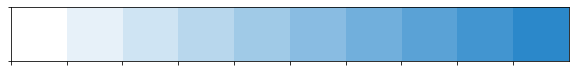

In [6]:
#中国地图
def picture_china_map(data,picture_name,label_fontsize=13,color = get_lighter_color('#FFFFFF',color_1)[0]):
    data_zip = [*zip(data.index.tolist(),data)]#构建省份和对应统计人数的列表,地图数据传入的指定格式
    for i in range(len(data_zip)):
        data_zip[i]=[data_zip[i][0].strip('省市自治区壮族维吾尔回族特别行政'),data_zip[i][1]]
        data_zip[i][1]=i+1
    max_ = data_zip[len(data_zip)-1][1]
    a= (
    Map()
    .add("",data_zip,"china",is_map_symbol_show = False,is_roam = False,#数据传入,地图类型设置:中国地图"china"
         label_opts=opts.LabelOpts(formatter= '{b}',font_size=label_fontsize,font_family = '宋体'),#标签设置
         itemstyle_opts=opts.ItemStyleOpts(border_color = '#A6A6A6')) #图形的描边颜色
    .set_global_opts(
         visualmap_opts=opts.VisualMapOpts(is_show=False,max_ = max_,range_color = color))#颜色渐变设置
    )
    return while_func(picture_name,a),a.render_notebook()

## 省份地图

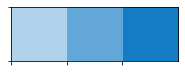

In [7]:
#省份地图
def picture_province_map(type1,type2,picture_name,province=xxsf,label_fontsize=13,color = get_color('#FFFFFF',color_1)[0]):
    provinces = {
    '吉林省': [125.326800, 43.896160], '黑龙江省': [126.662850, 45.742080],
    '辽宁省': [123.429250, 41.835710], '内蒙古': [111.765220, 40.817330],
    '新疆': [87.627100, 43.793430], '青海省': [101.780110, 36.620870],
    '北京市': [116.407170, 39.904690], '天津市': [117.199370, 39.085100],
    '上海市': [121.473700, 31.230370], '重庆市': [106.550730, 29.564710],
    '河北省': [114.469790, 39.035990], '河南省': [113.753220, 34.765710],
    '陕西省': [108.954240, 34.764860], '江苏省': [118.762950, 32.060710],
    '山东省': [117.020760, 36.668260], '山西省': [112.562720, 37.873430],
    '甘肃省': [103.826340, 36.059420], '宁夏': [106.258670, 38.471170],
    '四川省': [104.075720, 30.650890], '西藏': [91.117480, 29.647250],
    '安徽省': [117.285650, 31.861570], '浙江省': [120.153600, 30.265550],
    '湖北省': [114.342340, 30.545390], '湖南省': [112.983400, 28.012660],
    '福建省': [119.296590, 26.099820], '江西省': [115.910040, 28.674170],
    '贵州省': [106.707220, 26.598200], '云南省': [102.709730, 25.045300],
    '广东省': [113.266270, 23.131710], '广西省': [108.327540, 22.815210],
    '香港': [114.165460, 22.275340], '澳门': [113.549130, 22.198750],
    '海南省': [110.348630, 20.019970], '台湾省': [121.520076, 25.030724],
    }
    snjy_count = df_jy.query(f"sfmc=='{province}'&{type1}=='{type2}'").groupby('sqmc').count()['xh'].sort_values(ascending = True)#省内就业计数，不同省份需要修改
    list_xh = []
    for i in range(snjy_count.shape[0]):
        list_xh.append(i + 1)
    list_xh
    snjy_count_zip = [*zip(snjy_count.index.tolist(),list_xh)]
    a = (
    Map()
    .add("",snjy_count_zip,f"{province}".replace('省',''),is_map_symbol_show = False,is_roam = False,#省份地图如:"湖南"
         center = provinces[province],#省份的经纬度
         label_opts=opts.LabelOpts(formatter= '{b}',font_size=label_fontsize,font_family = '宋体'),#标签设置
         itemstyle_opts=opts.ItemStyleOpts(border_color = '#A6A6A6'))#图形的描边颜色
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(is_show=False,range_color = color,max_= max(list_xh))))
    return while_func(picture_name,a),a.render_notebook()

## 象形条形图

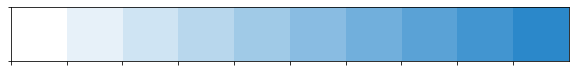

In [8]:

#象形条形图
def pictorial_reversal_bar(x_data,y1_data,y2_data,all_count,picture_name,color=f'{color_1}',color_1=get_lighter_color('#FFFFFF',color_1)[0][1],label_fontsize=16,label_fontfamily='Bahnschrift SemiLight Condensed',axislabel_fontsize=21,height = '700px',pos_left="35%"):
    # 标签格式
    jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % value_count.sum() + "+ '%' + ' ' + params.value + '人'}"
    print(y1_data,sum(y1_data),jscode)
    a = (
    PictorialBar()
    .add_xaxis(x_data)
    .add_yaxis("",y2_data,label_opts=opts.LabelOpts(is_show=False),symbol_size=[25,25],
               itemstyle_opts=opts.ItemStyleOpts(color=color_1),symbol=bd,symbol_repeat=True) #添加辅助条形图,增加灰色进度条
    .add_yaxis("",y1_data,symbol_size=['100%',25],
               label_opts=opts.LabelOpts(position="right",color=color,font_weight='bold',
#                                          formatter =JsCode("function (params) {return (params.value/3352*100).toFixed(2) + '%' + ' ' + params.value + '人'}"),
                                         formatter=JsCode(jscode),
                                         font_size=label_fontsize,font_family =label_fontfamily                                     
                                         ),
               itemstyle_opts=opts.ItemStyleOpts(color=color),symbol=cube)#设置柱形图样式
  
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color)),axislabel_opts=opts.LabelOpts(font_size=axislabel_fontsize,color='black',font_family = '宋体')))
    )
    a = (
         Grid(init_opts = opts.InitOpts(height = height,width='1000px'))  #设置图形大小,高度:height,宽度:width
        .add(a, grid_opts=opts.GridOpts(pos_left=pos_left))#位置调整
    )
    return while_func(picture_name,a),a.render_notebook()

## 饼图

In [9]:
#饼图
def picture_pie(index_name,picture_name,title_fontsize=21,label_fontsize=21):
    if index_name =='dy_shbz':
        data = index_single_options_top(index_name,False)[2]
        data = data.apply(lambda x: '%.2f' % x)
        title_1 ='社会保障度'
        title_2 =f'{index_single_options_top(index_name,False)[3]:.2f}%'
    else:
        data = index_scores_proportion(index_name,False)[0].rename(index={'5':f"非常{index_dict[index_name[-3:]]}",'4':f"{index_dict[index_name[-3:]]}",'3':f"比较{index_dict[index_name[-3:]]}",'2':f"不太{index_dict[index_name[-3:]]}",'1':f"不{index_dict[index_name[-3:]]}"})
        data = data.apply(lambda x: '%.2f' % x)
        if len(index_dict[index_name]) >=8:
            title_1 = f'{index_dict[index_name][:-3]}' + '\n' + f'{index_dict[index_name][-3:]}'
        else:
            title_1 = f'{index_dict[index_name]}'
        title_2 = f'{index_scores_proportion(index_name,False)[1]:.2f}%'
    myd_name_count = [*zip(data.index,data)]#构建指标和对应数值的列表,饼图数据传入的指定格式
    a = (
    Pie()
    .add("",myd_name_count,radius=["30%", "55%"],
            label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
            label_opts=opts.LabelOpts(interval=0,
                position="outside",
    #             formatter='{b|{b}}'+'\n'+'{d|{d}}%',
                formatter='{d|{c}}{per|%}'+'\n'*4+'{b|{b}}',
                rich={
                    "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                    "per": {"fontSize": 20},
                    "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
                })
         ) 
    .set_global_opts(
        title_opts=opts.TitleOpts(title=title_1 ,
                                  subtitle=title_2,pos_left='center',pos_top='45%', #标题位置
                                  title_textstyle_opts=opts.TextStyleOpts(font_size = 30,font_family = '宋体',color=color_1),
                                  subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 35,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
        legend_opts=opts.LegendOpts(is_show=False))#去掉图例
       .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}']))
    a = (
     Grid(init_opts = opts.InitOpts(height = '800px',width='1050px'))  #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts())#位置调整
    )
    return while_func(picture_name,a),a.render_notebook()

## 简单条形图

In [10]:
#简单条形图
def picture_reversal_bar(x_data,y1_data,y2_data,picture_name,bgcolor=0.1,reversal_bar_width = 25,color=f'{color_1}',label_fontsize='16',axislabel_fontsize='21',height = '700px',pos_left="30%"):
    a = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis("",y1_data,bar_width=reversal_bar_width,stack="stack1",
               label_opts=opts.LabelOpts(position='right',color=color,formatter = '{c}%',font_weight='bold',font_size = label_fontsize,font_family = 'Times New Roman'),
               itemstyle_opts=opts.ItemStyleOpts(color=color))#设置柱形图样式
    .add_yaxis("",y2_data,stack="stack1",label_opts=opts.LabelOpts(is_show=False),
                     itemstyle_opts=opts.ItemStyleOpts(color='#808080',opacity=bgcolor)) #添加辅助条形图,增加灰色进度条
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),axislabel_opts=opts.LabelOpts(font_size = axislabel_fontsize,color='black',font_family = '宋体'))))
    a =( 
    Grid(init_opts = opts.InitOpts(height = height))  #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left=pos_left))#位置调整
    )
    return while_func(picture_name,a),a.render_notebook()

## 雷达图

In [11]:
#雷达图
def picture_radar(data,picture_name,text_fontsize=21,color=color_1):
    if data =='dy_dwpj':
        data1 =radar_map(data,'hand',False,'dy_dwzmd','dy_pxjh','dy_jskj','dy_gzhj','dy_gzzzx','dy_gzyl','dy_gzwdx','dy_gwfzqj','dy_gzdd','dy_qywh','dy_gzfw','dy_dwzhmyd')[1]
        data1 = data1.apply(lambda x: '%.2f' % x)
    else:
        data1 = radar_map(data,'auto',False)[1]
        data1 = data1.apply(lambda x: '%.2f' % x)
    data2 = [data1.tolist()]
    radar_name = []
    c_schema = []
    c_symbol = []
    for i in data1.index:
        radar_name.append(index_dict[i])
        
    for i in range(len(radar_name)):
        c_schema.append({"name": radar_name[i], "max": 5, "min": 0})
    
    c_symbol.append({"value": data1.tolist(), "symbol": "circle","symbolSize": 10})
    
    a = (
    Radar()
    #雷达图样式设置,维度设置
    .add_schema(
        schema=c_schema,
        shape="circle",
        center=["50%", "50%"],
        radius="80%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=360,
            is_clockwise=False,
            interval=5,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False)),
        radiusaxis_opts=opts.RadiusAxisOpts(
            axislabel_opts=opts.LabelOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),
            min_=0,
            max_=5,
            interval=1,
            splitarea_opts=opts.SplitAreaOpts(is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1))),
        polar_opts=opts.PolarOpts(),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
        textstyle_opts=opts.TextStyleOpts(color=color,font_size =text_fontsize,font_family = '宋体'))
    #数据传入
    .add(               
        series_name="",
        data=c_symbol,
        color=color,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
        label_opts=opts.LabelOpts(formatter='{c}',font_family='Bahnschrift SemiLight Condensed',font_size=20,font_weight='bolder',position="outside")))
    return while_func(picture_name,a),a.render_notebook()

In [12]:
#图形取数文字输出一起封装
def dy_pie(a):
    if a =='dy_shbz':
        print(f'''{index_single_options_top(a,False)[0]}''')
    else:
        print(f'''{index_scores_proportion(a,False)[2]}''')
    picture_pie(a,index_dict[a])[1]
    add_pic(index_dict[a],15.24)
    return picture_pie(a,index_dict[a])[1]


def pictorial_sorm(a,b,height='700px'):#a为字段名，b为s(单选)或者m(多选)
    if b=='s':
        value_count_1 = []
        for i in range(index_multiple_options_top(a,True)[1].shape[0]):
            value_count_1.append(max(index_single_options_top(a,True)[1])*1.3)#构建辅助条形图数据 
        p = pictorial_reversal_bar(x_data=index_single_options_top(a,True)[1].index.tolist(),y1_data=index_single_options_top(a,True)[1].tolist(),y2_data=value_count_1,all_count=index_single_options_top(a,True)[3],height=height,picture_name=f'{index_dict[a]}')[1]
        add_pic(f'{index_dict[a]}',15.24)
    elif b=="m":
        value_count_1 = []
        for i in range(index_multiple_options_top(a,True)[1].shape[0]):
            value_count_1.append(max(index_multiple_options_top(a,True)[1])*1.3)#构建辅助条形图数据 
        p =pictorial_reversal_bar(x_data=index_multiple_options_top(a,True)[1].index.tolist(),y1_data=index_multiple_options_top(a,True)[1].tolist(),y2_data=value_count_1,all_count=index_multiple_options_top(a,True)[3],height=height,picture_name=f'{index_dict[a]}')[1]
        add_pic(f'{index_dict[a]}',15.24)
    return p


# 创建字典

In [13]:
# 字典
index_dict = {
            #基础指标
            'myd':'满意','ppd':'匹配','xgd':'相关','tjd':'愿意','gzd':'关注','xb':'性别','yx':'院系','zy':'专业','sysf':'生源省份',
            'mz':'民族','jyq':'乐观','zqj':'乐观','zsp':'满意','jjx':'满意','lzt':'乐观','sjy':'满意','yjy':'满意','ljy':'满意',
            #派遣数据
            'sxgxlx':'升学院校类型','sxgxbq':'升学院校层次',
            #分数指标
            '5':'非常高','4':'高','3':'比较高','2':'不太高','1':'不高',
            #教育教学调研
            'dy_cyzyxgd':'创业专业相关度','dy_cyyy':'创业原因','dy_cylx':'创业类型','dy_cyfs':'创业方式',
              'dy_cykn':'创业困难','dy_cyfwjy':'创业服务建议','dy_mxmyd':'母校满意度','dy_mxtjd':'母校推荐度','dy_jyjx':'教育教学',
              'dy_mxtjd':'母校推荐度','dy_jyjx_tsjy':'通识教育满意度','dy_tsjyjy':'通识教育建议','dy_jyjx_zyjy':'专业教育满意度','dy_zykcjy':'专业教育建议',
             'dy_jyjx_sjjx':'实践教学满意度','dy_sjjxjy':'实践教学建议','dy_zynljy':'职业能力教育建议','dy_zzdgjjy':'师资水平建议',
             'dy_jyjx_zynljy':'职业教育满意度','dy_jyjx_szsp':'师资水平','dy_jyjx_xsjz':'学术讲座','dy_jyjx_jxss':'教学设施',
            'dy_jyjx_khfs':'考核方式','dy_sjjxmyd':'实践教学满意度','dy_jyjx_zhmyd':'综合满意度',
            'dy_sjjx_kcsy':'课程实验','dy_sjjx_kcsyx':'课程实用性','dy_sjjx_sjkbz':'实践课比重','dy_sjjx_bylw':'毕业论文',
             'dy_sjjx_sys':'实验室的使用与管理','dy_kcszjy':'课程设置建议','dy_szsp':'师资水平满意度','dy_szsp_jxtd':'教学态度满意度',
             'dy_szsp_jxnr':'教学内容满意度','dy_szsp_jxff':'教学方法、方式满意度','dy_qzwt':'求职问题','dy_zxjl':'在校经历',
             'dy_szsp_sshd':'师生互动满意度','dy_szsp_zynl':'专业知识能力满意度',
             'dy_jycyfwmyd':'就业创业服务满意度','dy_jycyfwjy':'就业创业服务建议','dy_jycy':'就业创业',
             'dy_jycy_zcxc':'政策宣传与讲解','dy_jycy_xxtg':'信息提供与发布','dy_jycy_zyzx':'职业选择咨询/辅导','dy_jycy_jnpx':'就业/创业技能培训','dy_jycy_xlts':'求职心理调适','dy_jycy_mszd':'面试指导与训练',
             'dy_jycy_sxzd':'升学指导','dy_jycy_lxzd':'留学指导','dy_jycy_kc':'就业/创业课程','dy_jycy_xssxh':'线上双选会','dy_jycy_xyzp':'校园招聘活动','dy_jycy_jysx':'就业手续办理','dy_jycy_knbf':'就业困难群体帮扶',
              #就业调研
              '自主创业':'zzcy','dwhy':'单位行业','zzcy':'自主创业','sfmc':'所在省份','dy_lzcs':'离职次数','dy_jyqjyq':'专业前景预期',
              'dy_jymyd':'就业满意度','dy_jyzyxgd':'就业专业相关度','dy_jyjxmyd':'教育教学满意度','dy_jyqs':'就业歧视',
              'dy_jyzybxgyy':'就业专业不相关原因','dy_zwppd':'职业期待匹配度','dy_xzmyd':'薪资满意度','dy_jyyx':'月薪',
              'dy_jypjxz':'平均月薪','dy_shbz':'社会保障','dy_gwfzqj':'发展前景预期','dy_qwyz':'期望月薪',
              'dy_shbzmyd':'社会保障满意度','dy_dwpj':'岗位评价','dy_dwzmd':'单位知名度','dy_pxjh':'培训机会','dy_jskj':'晋升空间',
              'dy_gzhj':'工作环境','dy_gzzzx':'工作自主性','dy_gzyl':'工作压力','dy_gzwdx':'工作稳定性','dy_gwfzqj':'岗位发展前景',
              'dy_gzdd':'工作地点','dy_qywh':'企业文化','dy_gzfw':'工作氛围','dy_dwzhmyd':'单位综合满意度',
              'dy_lzyy':'离职原因','dy_gzys':'求职关注因素','dy_gzys_xcsp':'薪酬水平','dy_gzys_shbz':'社会保障',
              'dy_gzys_gzwdx':'工作稳定度','dy_gzys_gzcs':'工作城市','dy_gzys_dwsw':'单位社会声望','dy_gzys_gzhj':'工作环境',
              'dy_gzys_fzkj':'发展空间','dy_gzys_jrqw':'父母家人期望','dy_gzys_rjgx':'人际关系','dy_gzys_zydk':'专业对口',
              'dy_gzys_grxq':'个人兴趣','dy_gzys_rczc':'人才政策','dy_qztj':'求职途径','dy_offer':'offer数','dy_qzsc':'求职时长',
              'dy_wjyyy':'未就业原因','dy_qwdwlx':'期望单位类型','dy_qwjyss':'期望就业省市','dy_cgcjyy':'出国出境原因',
              'dy_qwbf':'期望帮扶','dy_nltsxq':'期望求职帮助','dy_jxszzyxgd':'继续深造与专业相关度','dy_gnsxyy':'国内升学原因',
              'dy_yqyx_zygh':'职业规划影响','dy_yqyx_xlzt':'就业乐观度',
              #单位调研
              'cdy_dwgm':'单位规模','cdy_dwxz':'单位性质','cdy_dwhy':'单位行业','cdy_dwszd':'单位所在地','cdy_zpqd':'招聘渠道',
              'cdy_kzys':'关注因素','cdy_zpxz':'招聘薪酬范围','cdy_zygzd':'专业关注度','cdy_rcpymyd':'人才培养认同度',
              'cdy_bysmyd':'毕业生满意度','cdy_byspj_sxpz':'思想品质','cdy_rcpyjy':'人才培养建议','cdy_lxzpyy':'来校招聘原因',
              'cdy_byspj_gztd':'工作态度','cdy_byspj_zysp':'专业水平','cdy_byspj_zynl':'职业能力','cdy_byspj_fzql':'发展潜力',
              'cdy_byspj':'毕业生评价','cdy_gwsysj':'岗位适应时间','cdy_lzqk':'离职情况','cdy_lzyy':'离职原因','cdy_zpkn':'招聘困难',
              'cdy_jyfwmyd':'就业服务满意度','cdy_zmyjyfw':'就业服务','cdy_jyfwjy':'就业服务建议'}

# 连接数据库

In [34]:
#连接PostgreSQL数据库
conn_3 = psycopg2.connect(database="weyon", #数据库名
                        user="LTAI5tLAtRZDhcHSaW3mYJsx", #用户名
                        password="foaMQRl3Nr5KLccBi4f3vNIymQDN0Z", #用户密码
                        host="lightning.cn-shenzhen.maxcompute.aliyun.com", #主机
                        port="443") #端口信息

#连接dw_database数据库
conn=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='dw_database'#数据库名称
,charset='utf8' # 字符编码
)

#连接warehouse数据库
conn_1=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='warehouse'#数据库名称
,charset='utf8' # 字符编码
)

#连接yun-campusjob数据库
conn_2=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='yun-campusjob'#数据库名称
,charset='utf8' # 字符编码
)

# 数据库取数

In [35]:
#派遣数据
sql_jy =f'''
    SELECT * FROM dw_s_employment_auto
    where xxmc = '{xxmc}' and substring(bynd,1,4) = '{bynd}'
    '''
df_jy = pd.read_sql(sql=sql_jy, con=conn)

# sql_hndy = f'''
#     SELECT * FROM dw_s_short_survey_hunan_province_auto 
#     where dy_xxmc = '{xxmc}'
#     '''
# df_hndy = pd.read_sql(sql=sql_hndy,con=conn) #取出湖南省调研数据

#毕业生调研数据
sql_dy = f'''
    SELECT * FROM dw_2022_s_short_survey_auto
    where dy_xxmc = '{xxmc}' 
     '''
df_dy = pd.read_sql(sql=sql_dy,con=conn)

#单位调研数据
sql_dw = f'''
    SELECT * FROM dw_2022_c_short_survey_auto
    where cdy_xxmc = '{xxmc}'
    '''
df_dw = pd.read_sql(sql=sql_dw,con=conn)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [16]:
df_jy.tail(3)

,xxdm,xxmc,bynd,yx,zydm,zy,bj,xm,xh,sfzhm,...,dim_company_property,dim_industry_category,dim_scale,dim_registered_capital,dim_dwmc_province,dim_dwmc_city,jylbfl,dwhy_c,sjly,xxmc_c
8104,10534,湖南科技大学,2022,数学与计算科学学院,None,数学与应用数学,18数学(定向)4班,刘柱成,1807010409,43052819991106131X,...,,,,,,,国家、地方项目,教育,省库,None
8105,10534,湖南科技大学,2022,齐白石艺术学院,None,音乐学,18音乐学2班,吴思琴,1816030220,430202199912100026,...,,,,,,,其他录用形式就业,文化、体育和娱乐业,省库,None
8106,10534,湖南科技大学,2022,计算机科学与工程学院,None,计算机科学与技术,18计算机5班,宋姣龙,1805010502,410425199803216099,...,,,,,,,签就业协议形式就业,信息传输、软件和信息技术服务业,省库,None


# 文档基本格式设置

In [24]:
document=Document(pic_path+'红色模板.docx')   # 读取文档


def Heading_1(content):
    result=document.add_heading('',level = 1).add_run(content)
    return result


def Heading_2(content):
    result=document.add_heading('',level = 2).add_run(content)
    return result


def Heading_3(content):
    result=document.add_heading('',level = 3).add_run(content)
    return result


def Heading_4(content):
    result=document.add_heading('',level = 4).add_run(content)
    return result

def Heading_5(content):
    result=document.add_heading('',level = 5).add_run(content)
    return result

bys_count = df_jy.count()['xh']#毕业生总人数
byswj_number_1 = df_dy.count()['dy_byqx']#问卷一毕业生问卷回收量
byswj_number_2 = df_dy.shape[0]#问卷二毕业生问卷回收量
byswj_ratio_1 = round(byswj_number_1/bys_count*100,2)#问卷一回收率
byswj_ratio_2 = round(byswj_number_2/bys_count*100,2)#问卷二回收率
dwwj_number = df_dw.shape[0]#单位问卷回收量

list_xh = []
for j in range(len(document.paragraphs)):
    if 'bys' in document.paragraphs[j].text or 'dwwj' in document.paragraphs[j].text or 'xxmc' in document.paragraphs[j].text:
        list_xh.append(j)

#模板中数据来源关键指标数据替换
text_1 = document.paragraphs[list_xh[0]].text.replace('xxmc',f'{xxmc}')
text_2 = document.paragraphs[list_xh[1]].text.replace('bys_number',f'{bys_count}').replace('xxmc',f'{xxmc}')
# text_3 = document.paragraphs[list_xh[2]].text.replace('byswj_number',f'{byswj_number}').replace('byswj_ratio',f'{byswj_ratio}%').replace('bys_number',f'{bys_count}').replace('xxmc',f'{xxmc}')
text_4 = document.paragraphs[list_xh[3]].text.replace('dwwj_number',f'{dwwj_number}').replace('xxmc',f'{xxmc}')
text_5 = document.paragraphs[list_xh[4]].text.replace('xxmc',f'{xxmc}')

document.paragraphs[list_xh[0]].text = text_1
document.paragraphs[list_xh[1]].text = text_2
# document.paragraphs[list_xh[2]].text = text_3
document.paragraphs[list_xh[3]].text = text_4
document.paragraphs[list_xh[4]].text = text_5


#湖南省中心 模板中数据来源关键指标数据替换
text_1 = document.paragraphs[list_xh[0]].text.replace('xxmc',f'{xxmc}')
text_2 = document.paragraphs[list_xh[1]].text.replace('bys_number',f'{bys_count}').replace('xxmc',f'{xxmc}')
# text_3 = document.paragraphs[list_xh[2]].text.replace('byswj_number',f'{byswj_number_1}').replace('byswj_ratio',f'{byswj_ratio_1}%').replace('bys_number',f'{bys_count}').replace('xxmc',f'{xxmc}').replace('byswj_count',f'{byswj_number_2}').replace('byswj_proportion',f'{byswj_ratio_2}%')
text_4 = document.paragraphs[list_xh[3]].text.replace('dwwj_number',f'{dwwj_number}').replace('xxmc',f'{xxmc}')
text_5 = document.paragraphs[list_xh[4]].text.replace('xxmc',f'{xxmc}')

document.paragraphs[list_xh[0]].text = text_1
document.paragraphs[list_xh[1]].text = text_2
# document.paragraphs[list_xh[2]].text = text_3
document.paragraphs[list_xh[3]].text = text_4
document.paragraphs[list_xh[4]].text = text_5

# 第一章     毕业生就业基本情况

## 一、毕业生规模及结构

### （一）本科毕业生规模

In [25]:
#Heading_1("第一章 毕业生就业基本情况")#写标题类型内容

write_zw(f'''本部分数据来源于{xxmc}2022届毕业生派遣数据库，主要从毕业生规模与结构、初次毕业去向落实情况、单位就业流向三个方面进行分析。''')

Heading_2("一、毕业生规模与结构")

Heading_3("（一）毕业生规模")

In [26]:
xb_count = df_jy.groupby('xb').count()[['xh']]#分性别人数
xb_ratio = round(df_jy.groupby('xb').count()[['xh']]/df_jy.count()['xh'],4)
formatter_1 ="%d"%(xb_count['xh']['男'])+'人'+'\n'+"%.2f"%(xb_ratio['xh']['男']*100)+'%'+'\n'*9+'男生'
formatter_2 = "%d"%(xb_count['xh']['女'])+'人'+'\n'+"%.2f"%(xb_ratio['xh']['女']*100)+'%'+'\n'*9+'女生'
bys_count = df_jy.count()['xh']#毕业生总人数
xb_proportion = math.ceil(xb_count['xh']['男']/xb_count['xh']['女']*100)

In [27]:
write_zw(f'''毕业生总人数{bys_count}人。其中，男生{xb_count['xh']['男']}人，占毕业生总人数的{xb_ratio['xh']['男']*100:.2f}%；女生{xb_count['xh']['女']}人，占毕业生总人数的{100-xb_ratio['xh']['男']*100:.2f}%。男女比例为{xb_proportion}：100。''')

In [28]:
p1_1 = (
    Liquid()
    .add("男生", [xb_ratio['xh']['男']], is_outline_show=False,shape = boy,center=["30%", "50%"],is_animation=False,color = [color_1],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_1,
        formatter=f'{formatter_1}'))
    .add("女生", [xb_ratio['xh']['女']], is_outline_show=False,shape = girl, center=["70%", "50%"],is_animation=False,color = [color_2],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_2,
         formatter=f'{formatter_2}'))
    .set_series_opts(radius="35%"))
p1_1.render_notebook()

In [29]:
#make_snapshot(snapshot,p1_1.render(), pic_path+'毕业生规模及性别分布.png',pixel_ratio = 5)
while_func('毕业生规模及性别分布',p1_1)

In [30]:
add_pic('毕业生规模及性别分布',15.24)
write_tz('毕业生规模及性别分布')

### （二）毕业生结构分布

#### 1.学院结构

In [31]:
Heading_3("（二）毕业生结构分布")
Heading_4("1.学院结构")

In [ ]:
#通用取数
zd='yx'#填入需要分组的字段,如院系:yx,生源地区:sysf,民族:mz,毕业去向分布:jylb
zdzw='学院'#填入需要分组的字段中文

sql11=f'''
SELECT {zd},rs,round(cast(rs as numeric)/cast(syrs as numeric),4)*100 ratio FROM
((SELECT {zd},count(xh) rs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by {zd})a
left join
(SELECT count(xh) syrs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}')b on 1=1) order by ratio desc
     '''

df_bysjg = pd.read_sql(sql=sql11,con=conn)
df_bysjg

In [ ]:
write_zw(f'''毕业生人数排名前三的学院分别为{df_bysjg['yx'][0]}（{df_bysjg['rs'][0]}人，占比{df_bysjg['ratio'][0]:.2f}%）、{df_bysjg['yx'][1]}（{df_bysjg['rs'][1]}人，占比{df_bysjg['ratio'][1]:.2f}%）、{df_bysjg['yx'][2]}（{df_bysjg['rs'][2]}人，占比{df_bysjg['ratio'][2]:.2f}%）。''')

In [ ]:
#普通表结构模板

#aql查询生成的DataFrame按列赋值给变量
list1=df_bysjg[f'{zd}'] #学院结构:yx,生源结构:sysf,民族结构:mz
list2=df_bysjg['rs']
list3=df_bysjg['ratio']

trow=len(list1)#行数,学院结构:yx,生源结构:sysf,民族结构:mz
tcol=3 #列数

write_tz(f'毕业生{zdzw}分布')#题注
table = document.add_table(rows=trow+2,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = f'{zdzw}' 
table.cell(0,1).text ='人数'
table.cell(0,2).text ='占比'

#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=list1[i]
    table.cell(i+1,1).text=str(list2[i])
    if type(list3[i])==str:#输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
        table.cell(i+1,2).text=list3[i]
    else:
        table.cell(i+1,2).text=str(Decimal(list3[i]).quantize(Decimal("0.00")))+'%'


#加入尾部汇总行
table.cell(trow+1,0).text='总计'
table.cell(trow+1,1).text=str(list2.sum())
table.cell(trow+1,2).text="100.00%"

#调整单元格内部的格式
table_format ()     

document.add_paragraph().add_run(u'''''')#增加空行

#### 2.专业结构

In [ ]:
Heading_4("2.专业结构")

In [ ]:
#专业结构取数
sql6=f'''SELECT yx,zy,rs,round(cast(rs as numeric)/cast(syrs as numeric),4)*100 ratio from
((SELECT yx,zy,count(xh) rs FROM "dw_s_employment_auto" where xxmc='{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)a
left join
(SELECT count(xh) syrs FROM "dw_s_employment_auto" where xxmc='{xxmc}'and substring(bynd,1,4)='{bynd}' )b on 1=1) order by yx'''
df_zyjg = pd.read_sql(sql=sql6,con=conn)

#院系结构取数
sql7=f'''SELECT yx,rs,round(cast(rs as numeric)/cast(syrs as numeric),4)*100 ratio from
((SELECT yx,count(xh) rs FROM "dw_s_employment_auto" where xxmc='{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)a
left join
(SELECT count(xh) syrs FROM "dw_s_employment_auto" where xxmc='{xxmc}'and substring(bynd,1,4)='{bynd}' )b on 1=1) order by yx'''
df_yxjg = pd.read_sql(sql=sql7,con=conn)

In [ ]:
#专业结构重新排序,用来取前三专业
df_zyjg_order = df_zyjg.sort_values(by='ratio',ascending=False)
df_zyjg_order

In [ ]:
write_zw(f'''毕业生人数排名前三的专业分别为{df_zyjg_order.iloc[0]['zy']}（{df_zyjg_order.iloc[0]['rs']}人，占比{df_zyjg_order.iloc[0]['ratio']:.2f}%）、{df_zyjg_order.iloc[1]['zy']}（{df_zyjg_order.iloc[1]['rs']}人，占比{df_zyjg_order.iloc[1]['ratio']:.2f}%）、{df_zyjg_order.iloc[2]['zy']}（{df_zyjg_order.iloc[2]['rs']}人，占比{df_zyjg_order.iloc[2]['ratio']:.2f}%）。''')

In [ ]:
#包含小计表结构模板

trow=len(df_yxjg['yx'])+len(df_zyjg['zy'])#行数
tcol=4 #列数

write_tz('毕业生专业分布')#题注
table=document.add_table(rows=trow+2,cols=tcol,style="表格-全部")
table.alignment = WD_TABLE_ALIGNMENT.CENTER 
table.cell(0,0).text='学院'
table.cell(0,1).text='专业'
table.cell(0,2).text='毕业人数'
table.cell(0,3).text='占比'

#aql查询生成的DataFrame按列赋值给变量
list1=df_yxjg['yx']
list2=df_yxjg['rs']
list3=df_zyjg['yx']
list4=df_yxjg['ratio']
list5=df_zyjg['rs']

num=0
for i in range(len(list1)):
    yx_name=list1[i]
    yx_rs=list2[i]
    zy_number=df_zyjg[list3.map(lambda x: x== f'{yx_name}')].sort_values(by='ratio',ascending=False)
    table.cell(num+1,0).merge(table.cell(num+len(zy_number),0))#学院列合并单元格
    table.cell(num+1,0).text=yx_name
    for j in range(len(zy_number)):
        table.cell(num+1,1).text=zy_number['zy'].iloc[j]
        table.cell(num+1,2).text=str(zy_number['rs'].iloc[j])
        table.cell(num+1,3).text=str(Decimal(zy_number['ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'
        num+=1
    table.cell(num+1,1).merge(table.cell(num+1,0))
    table.cell(num+1,1).text=f'{yx_name}'+" 汇总"
    table.cell(num+1,2).text=f'{yx_rs}'
    table.cell(num+1,3).text=str(Decimal(list4[i]).quantize(Decimal("0.00")))+'%'
    num+=1
table.cell(trow+1,0).merge(table.cell(trow+1,1))
table.cell(trow+1,0).text="总计"
table.cell(trow+1,2).text=str(list5.sum())
table.cell(trow+1,3).text='100.00%'

table_format ()#修改单元格格式函数
document.add_paragraph().add_run(u'''''')#增加空行

#### 3.生源地结构

In [ ]:
Heading_4("3.生源地结构")
sysf_count=type_values('sysf',True)[1]
sysf_ratio=type_values('sysf',True)[2]
picture_china_map(sysf_count,'毕业生生源地区分布')[0]
picture_china_map(sysf_count,'毕业生生源地区分布')[1]

In [ ]:
#文字部分取数

#生源省份个数
sysf_num = sysf_count.count()

#生源省份top1
sysf_top1 = sysf_count.index[len(sysf_count)-1]
sysf_count_top1 = sysf_count[len(sysf_count)-1]
sysf_ratio_top1 = sysf_ratio[len(sysf_count)-1]

#省外生源人数和占比
not_sysf_count_top1 = sysf_count[:len(sysf_count)-1].sum()
not_sysf_ratio_top1 = 100-sysf_ratio_top1

#生源省份top2
sysf_top2 = sysf_count.index[len(sysf_count)-2]
sysf_count_top2 = sysf_count[len(sysf_count)-2]
sysf_ratio_top2 = sysf_ratio[len(sysf_count)-2]

#生源省份top3
sysf_top3 = sysf_count.index[len(sysf_count)-3]
sysf_count_top3 = sysf_count[len(sysf_count)-3]
sysf_ratio_top3 = sysf_ratio[len(sysf_count)-3]

#生源省份top4
sysf_top4 = sysf_count.index[len(sysf_count)-4]
sysf_count_top4 = sysf_count[len(sysf_count)-4]
sysf_ratio_top4 = sysf_ratio[len(sysf_count)-4]

In [ ]:
write_zw(f'''毕业生生源地覆盖{sysf_num}个省（自治区、直辖市、特别行政区），“{sysf_top1}”生源人数最多，共有{sysf_count_top1}人（占比{sysf_ratio_top1:.2f}%），非{sysf_top1}生源人数{not_sysf_count_top1}人（占比{not_sysf_ratio_top1:.2f}%）。省外生源人数位列前三的地区分别为“{sysf_top2}”（{sysf_count_top2}人，占比{sysf_ratio_top2:.2f}%）、“{sysf_top3}”（{sysf_count_top3}人，占比{sysf_ratio_top3:.2f}%）、“{sysf_top4}”（{sysf_count_top4}人，占比{sysf_ratio_top4:.2f}%）。''')

In [ ]:
add_pic('毕业生生源地区分布',15.24)
write_tz('毕业生生源地区分布')

In [ ]:
write_zw(f'''生源地区分布如下表所示。''')
zd='sysf'#填入需要分组的字段,如院系:yx,生源地区:sysf,民族:mz,毕业去向分布:jylb
zdzw='生源地区'#填入需要分组的字段中文

sql11=f'''
SELECT {zd},rs,round(cast(rs as numeric)/cast(syrs as numeric),4)*100 ratio FROM
((SELECT {zd},count(xh) rs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by {zd})a
left join
(SELECT count(xh) syrs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}')b on 1=1) order by ratio desc
     '''

df_bysjg = pd.read_sql(sql=sql11,con=conn)
df_bysjg

In [ ]:
#普通表结构模板

#aql查询生成的DataFrame按列赋值给变量
list1=df_bysjg[f'{zd}'] #学院结构:yx,生源结构:sysf,民族结构:mz
list2=df_bysjg['rs']
list3=df_bysjg['ratio']

trow=len(list1)#行数,学院结构:yx,生源结构:sysf,民族结构:mz
tcol=3 #列数

write_tz(f'毕业生{zdzw}分布')#题注
table = document.add_table(rows=trow+2,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = f'{zdzw}' 
table.cell(0,1).text ='人数'
table.cell(0,2).text ='占比'

#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=list1[i]
    table.cell(i+1,1).text=str(list2[i])
    if type(list3[i])==str:#输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
        table.cell(i+1,2).text=list3[i]
    else:
        table.cell(i+1,2).text=str(Decimal(list3[i]).quantize(Decimal("0.00")))+'%'


#加入尾部汇总行
table.cell(trow+1,0).text='总计'
table.cell(trow+1,1).text=str(list2.sum())
table.cell(trow+1,2).text="100.00%"

#调整单元格内部的格式
table_format ()     

document.add_paragraph().add_run(u'''''')#增加空行

#### 4.民族结构

In [ ]:
Heading_4("4.民族结构")

mz_count = type_values('mz',True)[1]
mz_ratio = (mz_count/mz_count.sum()*100).sort_values(ascending=True)
hz_ratio = round(mz_ratio[-1],2)
hz_count = mz_count[-1]
ssmz_ratio = round(mz_ratio[:-1].sum(),2)
ssmz_count = mz_count[:-1].sum()
mz_ratio_union = [hz_ratio,ssmz_ratio]
mz_name = ['汉族','少数民族']
mz_name_ratio = [*zip(mz_name,mz_ratio_union)]
mz_title = f' 汉族\n{hz_count}人\n{hz_ratio}%'
mz_num = mz_count.count()
#生源人数排名前三少数民族取数
ssmz_top1 = mz_count.index[-2]
ssmz_count_top1 = mz_count[-2]
ssmz_ratio_top1 = mz_ratio[-2]

ssmz_top2 = mz_count.index[-3]
ssmz_count_top2 = mz_count[-3]
ssmz_ratio_top2 = mz_ratio[-3]

ssmz_top3 = mz_count.index[-4]
ssmz_count_top3 = mz_count[-4]
ssmz_ratio_top3 = mz_ratio[-4]

In [ ]:
write_zw(f'''毕业生来自于{mz_num}个民族，汉族生源人数最多，共有{hz_count}人（占比{hz_ratio:.2f}%），少数民族生源人数{ssmz_count}人（占比{ssmz_ratio:.2f}%）。少数民族生源人数位列前三的民族分别为：{ssmz_top1}（{ssmz_count_top1}人，占比{ssmz_ratio_top1:.2f}%）、{ssmz_top2}（{ssmz_count_top2}人，占比{ssmz_ratio_top2:.2f}%）、{ssmz_top3}（{ssmz_count_top3}人，占比{ssmz_ratio_top3:.2f}%）。''')

In [ ]:
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % mz_count.sum() + "+ '%' + '  ' + params.value + '人'}"
pic_1 = (
    Pie()
    .add(
        "",mz_name_ratio,radius = ["20%", "40%"], #radius为饼图的半径，数组的第一项是内半径，第二项是外半
           center = ['22%', '50%'])               #设置饼状图位置，第一个百分数调水平位置，第二个百分数调垂直位置
    .set_global_opts(
        title_opts=opts.TitleOpts(title = mz_title,pos_left='18%',pos_top='45%',
                                  title_textstyle_opts=opts.TextStyleOpts(font_size = 21,font_family = '宋体',color=color_1)), #标题字体样式配置项
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
pic_2 = (
    Bar()
    .add_xaxis(type_values('mz',True)[1][:-1].index.tolist())
    .add_yaxis("",type_values('mz',True)[1][:-1].tolist(),bar_width=20)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right",color=color_1,font_weight='bold',
                                               formatter= JsCode(jscode),font_size = 16,font_family = 'Bahnschrift SemiLight Condensed'),
                     itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}'))
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),
                     yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 18,font_family = '宋体',color='black'),
                                             axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)))) #设置坐标轴文字样式
    .set_colors([f'{color_1}', f'{color_2}']))
grid = (
     Grid(init_opts = opts.InitOpts(height = '750px'))
    .add(pic_2, grid_opts=opts.GridOpts(pos_left="50%"))
    .add(pic_1, grid_opts=opts.GridOpts(pos_left=""))
)
grid.render_notebook()

In [ ]:
#make_snapshot(snapshot,grid.render(), pic_path+'毕业生民族结构分布.png',pixel_ratio = 5)
while_func('毕业生民族结构分布',grid)
add_pic('毕业生民族结构分布',15.24)
write_tz('毕业生民族结构分布')

## 二、初次毕业去向落实情况

### （一）总体毕业去向落实率

#### 1.毕业去向落实率

In [ ]:
Heading_2("二、初次毕业去向落实情况")
Heading_3("（一）总体毕业去向落实率")
Heading_4("1.毕业去向落实率")

In [ ]:
# lsbyqx_count=map_type('lsbyqx','是')#index_name表示字段名，types表示具体数值，如index_name='dwjy',types='是'
# # jylb_count=map_type_class('lsbyqx','是','jylbfl',False)[1]
# jylb_count=df_jy.query("lsbyqx=='是'").groupby('jylbfl').count()['xh']/df_jy.count()['xh']*100
# jylb_count['协议和合同就业']=jylb_count['签劳动合同形式就业']+jylb_count['签就业协议形式就业']+jylb_count['应征义务兵']+jylb_count['国家、地方项目']
# jylb_count['继续深造']=jylb_count['出国、出境']+jylb_count['升学']
# jylb_count['灵活就业']=jylb_count['其他录用形式就业']+jylb_count['自由职业']
# jylb_count.drop(['签就业协议形式就业','其他录用形式就业','自由职业','签劳动合同形式就业','出国、出境','国家、地方项目','应征义务兵','升学'],inplace=True)
# jylb_count = jylb_count.reindex(index=['协议和合同就业','自主创业','灵活就业','继续深造'])
# jylb_count = round(jylb_count,2)

In [ ]:
sql12=f'''
SELECT case when jylbfl in ('签就业协议形式就业','签劳动合同形式就业','应征义务兵','国家、地方项目','科研助理') then '协议和合同就业'
when jylbfl = '自主创业' then '自主创业'
when jylbfl in ('其他录用形式就业','自由职业') then '灵活就业'
when jylbfl in('升学','出国、出境') then '继续深造'
when jylbfl = '暂不就业' then '暂不就业'
when jylbfl = '待就业' then '待就业'end as fl,sum(rs) as rs,round(cast(sum(rs) as numeric)/cast(syrs as numeric),4)*100 ratio FROM
((SELECT jylbfl,count(xh) rs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'group by jylbfl )a
left join
(SELECT count(xh) syrs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}')b on 1=1) group by fl 
order by (case when fl = '协议和合同就业' then 1 when fl = '继续深造' then 2 when fl = '灵活就业' then 3 
when fl = '自主创业' then 4 when fl = '待就业' then 5 when fl = '暂不就业' then 6 end) 
     '''
df_jylbfl = pd.read_sql(sql=sql12,con=conn)
df_jylbfl

In [ ]:
df_jylbfl.query("fl=='灵活就业'")['ratio'].values[0]

In [ ]:
lsbyqx_count=map_type('lsbyqx','是')#index_name表示字段名，types表示具体数值，如index_name='dwjy',types='是'

#轴标签换行
index_list_n = []
index_list = df_jylbfl['fl'][:4].values.tolist()
for index in index_list:
    if len(index) > 5:
        index_list_n.append(index[:5]+'\n'+index[5:])
    else:
        index_list_n.append(index)
index_list_n

In [ ]:
#定义柱形图图元颜色
#if type(color) == list:    
color_fuc = """
                function (params) {
                    if (params.dataIndex == 0) return """ + f"'{color_2}';" + """if (params.dataIndex == 1)return """ + f"'{color_3}';" +"""
                    if (params.dataIndex == 2) return """ + f"'{color_4}';" +""" if (params.dataIndex == 3)return """ + f"'{color_5}';" +"""}   
               """
#柱形图        
a = (
    Bar()
    .add_xaxis(index_list_n)
    .add_yaxis("",df_jylbfl['ratio'][:4].tolist(),bar_width=35,stack="stack1",
                label_opts=opts.LabelOpts(position='top',color=JsCode(color_fuc),formatter='{c}%',font_size = 23,font_family = 'Bahnschrift SemiLight Condensed'),
                itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_fuc)))#设置柱形图样式
    .set_global_opts(yaxis_opts=opts.AxisOpts(is_show=False),#不显示y轴
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 16,font_family = '宋体'))))


#水波图
b = (
    Liquid()
    .add("毕业去向落实率", [lsbyqx_count[1]/100], is_outline_show=False,shape = 'circle',center=["25%", "50%"],is_animation=False,
         color = [get_lighter_color('#FFFFFF',color_1)[0][2]],background_color=['#FFFFFF'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_1,formatter="{c|%s}" % lsbyqx_count[1] + '%' +'\n'*10+'{d|毕业去向落实率}',
                                   rich={"c": {"fontSize": 27, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'bolder'},
                                         "d": {"fontSize": 18, "fontFamily": '宋体'}}))
    .set_series_opts(radius="60%"))

c = (
    Liquid()
    .add("", [1], is_outline_show=False,shape = bd,center=["25%", "50%"],is_animation=False,color = [color_1],
        label_opts=opts.LabelOpts(is_show=False))
    .set_series_opts(radius="40%"))

#组合在一起
grid = (
     Grid(init_opts = opts.InitOpts(height = '350px',width='1000px'))
    .add(a, grid_opts=opts.GridOpts(pos_left="45%"))
    .add(b, grid_opts=opts.GridOpts(pos_left=""))
    .add(c, grid_opts=opts.GridOpts(pos_left=""))
)
grid.render_notebook()

In [ ]:
write_zw(f'''截至2022年8月31日，毕业生毕业去向落实人数为{lsbyqx_count[0]}人，初次毕业去向落实率为{lsbyqx_count[1]:.2f}%。其中协议和合同就业率{df_jylbfl.query("fl=='协议和合同就业'")['ratio'].values[0]:.2f}%、继续深造率{df_jylbfl.query("fl=='继续深造'")['ratio'].values[0]:.2f}%、灵活就业率{df_jylbfl.query("fl=='灵活就业'")['ratio'].values[0]:.2f}%、自主创业率{df_jylbfl.query("fl=='自主创业'")['ratio'].values[0]:.2f}%。''')

In [ ]:
#make_snapshot(snapshot,grid.render(), pic_path+'初次毕业去向落实率.png',pixel_ratio = 5)
while_func('初次毕业去向落实率',grid)
add_pic('初次毕业去向落实率',15.24)
write_tz('初次毕业去向落实率')

#### 2.毕业去向分布

In [36]:
Heading_4("2.毕业去向分布")
#通用取数

zd='jylb'#填入需要分组的字段,如院系:yx,生源地区:sysf,民族:mz,毕业去向分布:jylb
zdzw='毕业去向'#填入需要分组的字段中文

sql11=f'''
SELECT case when jylbfl in ('签就业协议形式就业','签劳动合同形式就业','应征义务兵','国家、地方项目','科研助理') then '协议和合同就业'
when jylbfl = '自主创业' then '自主创业'
when jylbfl in ('其他录用形式就业','自由职业') then '灵活就业'
when jylbfl in('升学','出国、出境') then '继续深造'
when jylbfl = '暂不就业' then '暂不就业'
when jylbfl = '待就业' then '待就业'
when jylb = '暂不就业(无就业意愿)' then '暂不就业' end as fl,{zd},rs,round(cast(rs as numeric)/cast(syrs as numeric),4)*100 ratio FROM
((SELECT jylbfl,{zd},count(xh) rs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by {zd},jylbfl)a
left join
(SELECT count(xh) syrs FROM dw_s_employment_auto where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}')b on 1=1) order by ratio desc
     '''
df_jylb = pd.read_sql(sql=sql11,con=conn)
df_jylb

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,fl,jylb,rs,ratio
0,协议和合同就业,签就业协议形式就业,3181,59.29
1,继续深造,研究生,721,13.44
2,待就业,待就业,470,8.76
3,继续深造,第二学士学位,221,4.12
4,暂不就业,不就业拟升学,214,3.99
5,灵活就业,其他录用形式就业,171,3.19
6,协议和合同就业,签劳动合同形式就业,131,2.44
7,暂不就业,其他暂不就业,58,1.08
8,灵活就业,自由职业,55,1.03
9,自主创业,自主创业,54,1.01


In [69]:
write_zw(f'''已落实毕业生中位列前三的毕业去向分别为：{df_jylb['jylb'][0]}（{df_jylb['rs'][0]}人，占比{df_jylb['ratio'][0]:.2f}%）、{df_jylb['jylb'][1]}（{df_jylb['rs'][1]}人，占比{df_jylb['ratio'][1]:.2f}%）、{df_jylb['jylb'][2]}（{df_jylb['rs'][2]}人，占比{df_jylb['ratio'][2]:.2f}%）。''')

In [70]:
#包含小计表结构模板

trow=len(df_jylbfl['fl'])+len(df_jylb['jylb'])#行数
tcol=4 #列数

write_tz('毕业生毕业去向分布')#题注
table=document.add_table(rows=trow+2,cols=tcol,style="表格-全部")
table.alignment = WD_TABLE_ALIGNMENT.CENTER 
table.cell(0,0).text='分类'
table.cell(0,1).text='毕业去向'
table.cell(0,2).text='人数'
table.cell(0,3).text='占比'

#aql查询生成的DataFrame按列赋值给变量
list1=df_jylbfl['fl']
list2=df_jylbfl['rs']
list3=df_jylb['fl']
list4=df_jylbfl['ratio']
list5=df_jylb['rs']

num=0
for i in range(len(list1)):
    fl_name=list1[i]
    fl_rs=list2[i]
    jylb_number=df_jylb[list3.map(lambda x: x== f'{fl_name}')].sort_values(by='ratio',ascending=False)
    table.cell(num+1,0).merge(table.cell(num+len(jylb_number),0))#学院列合并单元格
    table.cell(num+1,0).text=fl_name
    for j in range(len(jylb_number)):
        table.cell(num+1,1).text=jylb_number['jylb'].iloc[j]
        table.cell(num+1,2).text=str(jylb_number['rs'].iloc[j])
        table.cell(num+1,3).text=str(Decimal(jylb_number['ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'
        num+=1
    table.cell(num+1,1).merge(table.cell(num+1,0))
    table.cell(num+1,1).text=f'{fl_name}'+" 汇总"
    table.cell(num+1,2).text=f'{fl_rs}'
    table.cell(num+1,3).text=str(Decimal(list4[i]).quantize(Decimal("0.00")))+'%'
    num+=1
table.cell(trow+1,0).merge(table.cell(trow+1,1))
table.cell(trow+1,0).text="总计"
table.cell(trow+1,2).text=str(list5.sum())
table.cell(trow+1,3).text='100.00%'

table_format ()#修改单元格格式函数
document.add_paragraph().add_run(u'''''')#增加空行

### （二）分类别毕业去向落实率

#### 1.二级学院及专业毕业去向落实率

In [16]:
Heading_3("（二）分类别毕业去向落实率")
Heading_4("1.分学院及专业毕业去向落实率")

In [17]:
#分专业毕业去向落实率
sql8=f'''SELECT a.yx,a.zy,byrs,lsbyqxrs,xyhtjyrs,cyrs,lhjyrs,jxszrs,round(cast(lsbyqxrs as numeric)/cast(byrs as numeric),4)*100 lsbyqx_ratio,
round(cast(xyhtjyrs as numeric)/cast(byrs as numeric),4)*100 xyhtjy_ratio,round(cast(cyrs as numeric)/cast(byrs as numeric),4)*100 cy_ratio,
round(cast(lhjyrs as numeric)/cast(byrs as numeric),4)*100 lhjy_ratio,round(cast(jxszrs as numeric)/cast(byrs as numeric),4)*100 jxsz_ratio
from
((SELECT yx,zy,count(xh) byrs FROM "dw_s_employment_auto" where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)a
left join
(SELECT yx,zy,count(xh) lsbyqxrs FROM "dw_s_employment_auto" where lsbyqx = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)b on a.yx=b.yx and a.zy=b.zy
left join
(SELECT yx,zy,count(xh) xyhtjyrs FROM "dw_s_employment_auto" where xyhtjy = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)c on a.yx=c.yx and a.zy=c.zy
left join
(SELECT yx,zy,count(xh) cyrs FROM "dw_s_employment_auto" where cy = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)d on a.yx=d.yx and a.zy=d.zy
left join
(SELECT yx,zy,count(xh) lhjyrs FROM "dw_s_employment_auto" where lhjy = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)e on a.yx=e.yx and a.zy=e.zy
left join
(SELECT yx,zy,count(xh) jxszrs FROM "dw_s_employment_auto" where (gnsx = '是' or cgcj = '是') and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx,zy)f on a.yx=f.yx and a.zy=f.zy
)order by a.yx'''
df_zy_lsbyqx_1 = pd.read_sql(sql=sql8,con=conn)
df_zy_lsbyqx_sort = df_zy_lsbyqx_1.sort_values(by='lsbyqx_ratio',ascending=False)#表格按照落实率降序排列
df_zy_lsbyqx = df_zy_lsbyqx_sort.replace( np.nan,'-')#nan值替换成'-'

#分院系毕业去向落实率
sql9=f'''SELECT a.yx,byrs,lsbyqxrs,round(cast(lsbyqxrs as numeric)/cast(byrs as numeric),4)*100 lsbyqx_ratio,
round(cast(xyhtjyrs as numeric)/cast(byrs as numeric),4)*100 xyhtjy_ratio,round(cast(cyrs as numeric)/cast(byrs as numeric),4)*100 cy_ratio,
round(cast(lhjyrs as numeric)/cast(byrs as numeric),4)*100 lhjy_ratio,round(cast(jxszrs as numeric)/cast(byrs as numeric),4)*100 jxsz_ratio
from
((SELECT yx,count(xh) byrs FROM "dw_s_employment_auto" where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)a
left join
(SELECT yx,count(xh) lsbyqxrs FROM "dw_s_employment_auto" where lsbyqx = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)b on a.yx=b.yx
left join
(SELECT yx,count(xh) xyhtjyrs FROM "dw_s_employment_auto" where xyhtjy = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)c on a.yx=c.yx
left join
(SELECT yx,count(xh) cyrs FROM "dw_s_employment_auto" where cy = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)d on a.yx=d.yx
left join
(SELECT yx,count(xh) lhjyrs FROM "dw_s_employment_auto" where lhjy = '是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)e on a.yx=e.yx
left join
(SELECT yx,count(xh) jxszrs FROM "dw_s_employment_auto" where (gnsx = '是' or cgcj = '是') and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' group by yx)f on a.yx=f.yx
)order by a.yx'''
df_yx_lsbyqx_1 = pd.read_sql(sql=sql9,con=conn)
df_yx_lsbyqx_sort = df_yx_lsbyqx_1.sort_values(by='lsbyqx_ratio',ascending=False)#表格按照落实率降序排列
df_yx_lsbyqx = df_yx_lsbyqx_sort.replace( np.nan,'-')#nan值替换成'-'

#sql取数人数识别成浮点数，将浮点数转换成整数
for i in df_yx_lsbyqx.columns[1:]:
    if i == 'byrs' or i == 'lsbyqxrs':
        df_yx_lsbyqx[i] = df_yx_lsbyqx[i].apply(lambda x: x if x == '-' else int(x))
    else:
        continue

for i in df_zy_lsbyqx.columns[2:]:
    if i == 'byrs' or i == 'lsbyqxrs':
        df_zy_lsbyqx[i] = df_zy_lsbyqx[i].apply(lambda x: x if x == '-' else int(x))
    else:
        continue

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [18]:
write_zw(f'''毕业去向落实率排名前三的学院为：{df_yx_lsbyqx_sort.iloc[0,0]}（毕业人数{df_yx_lsbyqx_sort.iloc[0,1]}人，已落实{df_yx_lsbyqx_sort.iloc[0,2]}人，落实率{df_yx_lsbyqx_sort.iloc[0,3]:.2f}%）、{df_yx_lsbyqx_sort.iloc[1,0]}（毕业人数{df_yx_lsbyqx_sort.iloc[1,1]}人，已落实{df_yx_lsbyqx_sort.iloc[1,2]}人，落实率{df_yx_lsbyqx_sort.iloc[1,3]:.2f}%）、{df_yx_lsbyqx_sort.iloc[2,0]}（毕业人数{df_yx_lsbyqx_sort.iloc[2,1]}人，已落实{df_yx_lsbyqx_sort.iloc[2,2]}人，落实率{df_yx_lsbyqx_sort.iloc[2,3]:.2f}%）。''')

#判断落实率为100%的专业是否大于3个
a = df_zy_lsbyqx_sort[df_zy_lsbyqx_sort['lsbyqx_ratio']==100]['zy'].count()
if a > 3:
    write_zw(f'''毕业去向落实率较高的专业为：{df_zy_lsbyqx_sort.iloc[0,1]}、{df_zy_lsbyqx_sort.iloc[1,1]}、{df_zy_lsbyqx_sort.iloc[2,1]}等{a}个专业毕业去向落实率为100.00%。''')
else:
    write_zw(f'''毕业去向落实率排名前三的专业为：{df_zy_lsbyqx_sort.iloc[0,1]}（毕业人数{df_zy_lsbyqx_sort.iloc[0,2]}人，已落实{df_zy_lsbyqx_sort.iloc[0,3]}人，落实率{df_zy_lsbyqx_sort.iloc[0,8]:.2f}%）、{df_zy_lsbyqx_sort.iloc[1,1]}（毕业人数{df_zy_lsbyqx_sort.iloc[1,2]}人，已落实{df_zy_lsbyqx_sort.iloc[1,3]}人，落实率{df_zy_lsbyqx_sort.iloc[1,8]:.2f}%）、{df_zy_lsbyqx_sort.iloc[2,1]}（毕业人数{df_zy_lsbyqx_sort.iloc[2,2]}人，已落实{df_zy_lsbyqx_sort.iloc[2,3]}人，落实率{df_zy_lsbyqx_sort.iloc[2,8]:.2f}%）。''')

write_zw(f'''各二级学院及专业的毕业去向落实情况如下表所示。''')

In [19]:
#包含小计表结构模板

#aql查询生成的DataFrame按列赋值给变量
list1=df_yx_lsbyqx['yx']
list2=df_yx_lsbyqx['byrs']
list3=df_zy_lsbyqx['yx']
list4=df_yx_lsbyqx['lsbyqxrs']
list5=df_yx_lsbyqx['lsbyqx_ratio']
list6=df_zy_lsbyqx['byrs']
list7=df_yx_lsbyqx['xyhtjy_ratio']
# list8=df_yx_lsbyqx['cy_ratio']
# list9=df_yx_lsbyqx['lhjy_ratio']
# list10=df_yx_lsbyqx['jxsz_ratio']

list11=df_zy_lsbyqx['xyhtjyrs']
# list12=df_zy_lsbyqx['cyrs']
# list13=df_zy_lsbyqx['lhjyrs']
# list14=df_zy_lsbyqx['jxszrs']



trow=len(df_yx_lsbyqx['yx'])+len(df_zy_lsbyqx['zy'])#行数
tcol=6  #列数

write_tz(f'毕业生分学院及专业毕业去向落实率')#题注
table=document.add_table(rows=trow+2,cols=tcol,style="表格-全部")
table.alignment = WD_TABLE_ALIGNMENT.CENTER 
table.cell(0,0).text='学院'
table.cell(0,1).text='专业'
table.cell(0,2).text='毕业人数'
table.cell(0,3).text='落实人数'
table.cell(0,4).text='毕业去向落实率'
table.cell(0,5).text='协议和合同就业率'
# table.cell(0,6).text='创业率'
# table.cell(0,7).text='灵活就业率'
# table.cell(0,8).text='继续深造率'

num=0
for i in range(len(list1)):
    yx_name=list1[i]
    yx_rs=list2[i]
    zy_number=df_zy_lsbyqx[list3.map(lambda x: x== f'{yx_name}')].sort_values(by='lsbyqx_ratio',ascending=False)
    table.cell(num+1,0).merge(table.cell(num+len(zy_number),0))#学院列合并单元格
    table.cell(num+1,0).text=yx_name
    for j in range(len(zy_number)):
        table.cell(num+1,1).text=zy_number['zy'].iloc[j]
        table.cell(num+1,2).text=str(zy_number['byrs'].iloc[j])
        table.cell(num+1,3).text=str(zy_number['lsbyqxrs'].iloc[j])
        if type(zy_number['lsbyqx_ratio'].iloc[j])==str:
            table.cell(num+1,4).text=Decimal(zy_number['lsbyqx_ratio'].iloc[j])
        else:
            table.cell(num+1,4).text=str(Decimal(zy_number['lsbyqx_ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'
        if type(zy_number['xyhtjy_ratio'].iloc[j])==str:
            table.cell(num+1,5).text=zy_number['xyhtjy_ratio'].iloc[j]
        else:
            table.cell(num+1,5).text=str(Decimal(zy_number['xyhtjy_ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'       
#         if type(zy_number['cy_ratio'].iloc[j])==str:      #输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
#             table.cell(num+1,6).text=zy_number['cy_ratio'].iloc[j]
#         else: 
#             table.cell(num+1,6).text=str(Decimal(zy_number['cy_ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'
#         if type(zy_number['lhjy_ratio'].iloc[j])==str:      #输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
#             table.cell(num+1,7).text=zy_number['lhjy_ratio'].iloc[j]
#         else: 
#             table.cell(num+1,7).text=str(Decimal(zy_number['lhjy_ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'
#         if type(zy_number['jxsz_ratio'].iloc[j])==str:      #输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
#             table.cell(num+1,8).text=zy_number['jxsz_ratio'].iloc[j]
#         else: 
#             table.cell(num+1,8).text=str(Decimal(zy_number['jxsz_ratio'].iloc[j]).quantize(Decimal("0.00")))+'%'
        num+=1
    table.cell(num+1,1).merge(table.cell(num+1,0))
    table.cell(num+1,1).text=f'{yx_name}'+" 汇总"
    table.cell(num+1,2).text=f'{yx_rs}'
    table.cell(num+1,3).text=f'{list4[i]}'
    if type(list5[i]) == str:
        table.cell(num+1,4).text=list5[i]
    else:
        table.cell(num+1,4).text=str(Decimal(list5[i]).quantize(Decimal("0.00")))+'%'
    if type(list7[i]) == str:
        table.cell(num+1,5).text=list7[i]
    else:
        table.cell(num+1,5).text=str(Decimal(list7[i]).quantize(Decimal("0.00")))+'%'
#     if type(list8[i])==str:
#         table.cell(num+1,6).text=list8[i]
#     else: 
#         table.cell(num+1,6).text=str(Decimal(list8[i]).quantize(Decimal("0.00")))+'%'
#     if type(list9[i])==str:
#         table.cell(num+1,7).text=list9[i]
#     else: 
#         table.cell(num+1,7).text=str(Decimal(list9[i]).quantize(Decimal("0.00")))+'%'
#     if type(list10[i])==str:
#         table.cell(num+1,8).text=list10[i]
#     else:
#         table.cell(num+1,8).text=str(Decimal(list10[i]).quantize(Decimal("0.00")))+'%'
    num+=1
table.cell(trow+1,0).merge(table.cell(trow+1,1))
table.cell(trow+1,0).text="总计"
table.cell(trow+1,2).text=str(list6.sum())
table.cell(trow+1,3).text=str(list4.sum())
table.cell(trow+1,4).text=str(Decimal(list_sum(list4)/list6.sum()*100).quantize(Decimal("0.00")))+'%'
table.cell(trow+1,5).text=str(Decimal(list_sum(list11)/list6.sum()*100).quantize(Decimal("0.00")))+'%'
# table.cell(trow+1,6).text=str(Decimal(list_sum(list12)/list6.sum()*100).quantize(Decimal("0.00")))+'%'
# table.cell(trow+1,7).text=str(Decimal(list_sum(list13)/list6.sum()*100).quantize(Decimal("0.00")))+'%'
# table.cell(trow+1,8).text=str(Decimal(list_sum(list14)/list6.sum()*100).quantize(Decimal("0.00")))+'%'

table_format ()#修改单元格格式函数
document.add_paragraph().add_run(u'''''')#增加空行

#### 2.分性别毕业去向落实率

In [75]:
Heading_4("2.分性别毕业去向落实率")

In [76]:
sql2 = f"""select a.xb,by_count,lsbyqx_count,round(cast(lsbyqx_count as numeric)/cast(by_count as numeric)*100,2) lsbyqx_ratio from(
(select xb,count(xh) by_count from dw_s_employment_auto where xxmc = '{xxmc}' and substring(bynd,1,4) = '{bynd}'
group by xb)a
join
(select xb,count(xh) lsbyqx_count from dw_s_employment_auto where xxmc = '{xxmc}' and lsbyqx = '是' and substring(bynd,1,4) = '{bynd}'
group by xb)b on a.xb = b.xb)order by case when a.xb='男' then 1 when a.xb='女' then 2 end
"""
data_1 = pd.read_sql(sql2, con=conn) #执行语句并将查询数据置于df
data_1

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,xb,by_count,lsbyqx_count,lsbyqx_ratio
0,男,2932,2649,90.35
1,女,2097,1832,87.36


In [77]:
male_by_count = data_1.query("xb=='男'")['by_count'][0]
male_lsbyqx_count = data_1.query("xb=='男'")['lsbyqx_count'][0]
male_lsbyqx_ratio = data_1.query("xb=='男'")['lsbyqx_ratio'][0]

female_by_count = data_1.query("xb=='女'")['by_count'][1]
female_lsbyqx_count = data_1.query("xb=='女'")['lsbyqx_count'][1]
female_lsbyqx_ratio = data_1.query("xb=='女'")['lsbyqx_ratio'][1]

In [78]:
write_zw(f'''毕业生中，男生毕业去向落实人数{male_lsbyqx_count}人，毕业去向落实率为{male_lsbyqx_ratio:.2f}%；女生毕业去向落实人数{female_lsbyqx_count}人，毕业去向落实率为{female_lsbyqx_ratio:.2f}%。''')

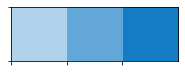

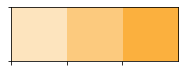

('90.35%\n\n2649/2932人', '87.36%\n\n1832/2097人')

In [79]:
formatter_string = f"{male_lsbyqx_ratio:.2f}%" + "\n" * 2 + "%d/%d人" % (male_lsbyqx_count,male_by_count),f"{female_lsbyqx_ratio:.2f}%" + "\n" * 2 + "%d/%d人" % (female_lsbyqx_count,female_by_count)
colors_1 = get_color('#FFFFFF',color_1)[0]
colors_2 = get_color('#FFFFFF',color_2)[0]
formatter_string

In [80]:
p1_9 = (
    Gauge()
    .add("", [("男",male_lsbyqx_ratio)], radius="50%",
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string[0],font_size=21,font_family="Times New Roman"),
         title_label_opts=opts.LabelOpts(font_size=21,font_family="宋体"))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['30%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_1[0]], [0.7, colors_1[1]], [1, colors_1[2]]], width=30)))
)
p1_10 = (
    Gauge()
    .add("", [("女", female_lsbyqx_ratio)], radius="50%",
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string[1],font_size=21,font_family="Times New Roman"),
         title_label_opts=opts.LabelOpts(font_size=21,font_family="宋体"))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['70%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_2[0]], [0.7, colors_2[1]], [1, colors_2[2]]], width=30)))
)
grid = (
     Grid()
    .add(p1_9, grid_opts=opts.GridOpts(pos_right=""))
    .add(p1_10, grid_opts=opts.GridOpts(pos_left=""))
)
grid.render_notebook()

In [81]:
#make_snapshot(snapshot,grid.render(), pic_path+'毕业生分性别毕业去向落实率.png',pixel_ratio = 5)
while_func('毕业生分性别毕业去向落实率',grid)
add_pic('毕业生分性别毕业去向落实率',15.24)
write_tz('分性别毕业去向落实率')

#### 3.分生源省份毕业去向落实率

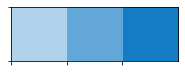

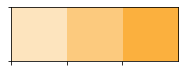

('89.46%\n\n3351/3746人', '88.07%\n\n1130/1283人')

In [82]:
Heading_4("3.分生源省份毕业去向落实率")
snsy_count = df_jy.query(f"sysf=='{xxsf}'").count()['xh']
swsy_count = df_jy.query(f"sysf!='{xxsf}'").count()['xh']
snjy_count = df_jy.query(f"lsbyqx=='是'& sysf=='{xxsf}'").count()['xh']
swjy_count = df_jy.query(f"lsbyqx=='是'& sysf!='{xxsf}'").count()['xh']
snjy_ratio = snjy_count/snsy_count*100
swjy_ratio = swjy_count/swsy_count*100
formatter_string = f"{snjy_ratio:.2f}%" + "\n" * 2 + "%d/%d人" % (snjy_count,snsy_count),f"{swjy_ratio:.2f}%" + "\n" * 2 + "%d/%d人" % (swjy_count,swsy_count)
colors_1 = get_color('#FFFFFF',color_1)[0]
colors_2 = get_color('#FFFFFF',color_2)[0]
formatter_string

In [83]:
write_zw(f'''毕业生中，省内生源毕业去向落实人数{snjy_count}人，毕业去向落实率为{snjy_ratio:.2f}%；省外生源毕业去向落实人数{swjy_count}人，毕业去向落实率为{swjy_ratio:.2f}%。''')

In [84]:
p1_9 = (
    Gauge()
    .add("", [("本省生源", snjy_ratio)], radius="50%",
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string[0],font_size=21,font_family="Times New Roman"),
         title_label_opts=opts.LabelOpts(font_size=21,font_family="宋体"))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['30%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_1[0]], [0.7, colors_1[1]], [1, colors_1[2]]], width=30)))
)
p1_10 = (
    Gauge()
    .add("", [("外省生源", swjy_ratio)], radius="50%",
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string[1],font_size=21,font_family="Times New Roman"),
         title_label_opts=opts.LabelOpts(font_size=21,font_family="宋体"))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['70%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_2[0]], [0.7, colors_2[1]], [1, colors_2[2]]], width=30)))
)
grid = (
     Grid()
    .add(p1_9, grid_opts=opts.GridOpts(pos_right=""))
    .add(p1_10, grid_opts=opts.GridOpts(pos_left=""))
)
grid.render_notebook()

In [85]:
#make_snapshot(snapshot,grid.render(), pic_path+'分生源省毕业去向落实率.png',pixel_ratio = 5)

while_func('分生源省毕业去向落实率',grid)
add_pic('分生源省毕业去向落实率',15.24)
write_tz('分生源省份毕业去向落实率')

#### 4.分民族毕业去向落实率

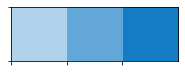

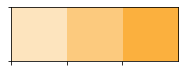

('89.27%\n\n3995/4475人', '87.73%\n\n486/554人')

In [86]:
Heading_4("4.分民族毕业去向落实率")
hz_count = df_jy.query("mz=='汉族'").count()['xh']
ssmz_count = df_jy.query("mz!='汉族'").count()['xh']
hzjy_count = df_jy.query("lsbyqx=='是'& mz=='汉族'").count()['xh']
ssmzjy_count = df_jy.query("lsbyqx=='是'& mz!='汉族'").count()['xh']
hz_ratio = hzjy_count/hz_count*100
ssmz_ratio = ssmzjy_count/ssmz_count*100

formatter_string = f"{hz_ratio:.2f}%" + "\n" * 2 + "%d/%d人" % (hzjy_count,hz_count),f"{ssmz_ratio:.2f}%" + "\n" * 2 + "%d/%d人" % (ssmzjy_count,ssmz_count)
colors_1 = get_color('#FFFFFF',color_1)[0]
colors_2 = get_color('#FFFFFF',color_2)[0]
formatter_string

In [87]:
write_zw(f'''毕业生中，汉族生源毕业去向落实人数{hzjy_count}人，毕业去向落实率为{hz_ratio:.2f}%；少数民族生源毕业去向落实人数{ssmzjy_count}人，毕业去向落实率为{ssmz_ratio:.2f}%。''')

In [88]:
p1_9 = (
    Gauge()
    .add("", [("汉族",hz_ratio)], radius="50%",
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string[0],font_size=21,font_family="Times New Roman"),
         title_label_opts=opts.LabelOpts(font_size=21,font_family="宋体"))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['30%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_1[0]], [0.7, colors_1[1]], [1, colors_1[2]]], width=30)))
)
p1_10 = (
    Gauge()
    .add("", [("少数民族",ssmz_ratio)], radius="50%",
         detail_label_opts=opts.GaugeDetailOpts(offset_center=[0, "43%"],formatter=formatter_string[1],font_size=21,font_family="Times New Roman"),
         title_label_opts=opts.LabelOpts(font_size=21,font_family="宋体"))
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(center = ['70%', '50%'],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(
                color=[[0.3, colors_2[0]], [0.7, colors_2[1]], [1, colors_2[2]]], width=30)))
)
grid = (
     Grid()
    .add(p1_9, grid_opts=opts.GridOpts(pos_right=""))
    .add(p1_10, grid_opts=opts.GridOpts(pos_left=""))
)
grid.render_notebook()

In [89]:
#make_snapshot(snapshot,grid.render(), pic_path+'分民族毕业去向落实率.png',pixel_ratio = 5)
while_func('分民族毕业去向落实率',grid)
add_pic('分民族毕业去向落实率',15.24)
write_tz('分民族毕业去向落实率')

## 三、单位就业流向

### （一）单位行业分布

In [90]:
Heading_2("三、单位就业流向")
Heading_3("（一）单位行业分布")
#单位就业分布取数
value_count=map_type_class('dwjy','是','dwhy',True)[0]
value_ratio=map_type_class('dwjy','是','dwhy',True)[1]
#构建辅助条形图数据 
value_count_1 = []
for i in range(value_count.shape[0]):
    value_count_1.append(max(value_count)*1.3)

In [91]:
write_zw(f'''按国家统计局国民经济行业分类标准，毕业生就业行业主要为“{value_count.index[-1]}”（{value_count[-1]}人，占比{value_ratio[-1]:.2f}%）、“{value_count.index[-2]}”（{value_count[-2]}人，占比{value_ratio[-2]:.2f}%）、“{value_count.index[-3]}”（{value_count[-3]}人，占比{value_ratio[-3]:.2f}%）。''')

In [92]:
pictorial_reversal_bar(value_count.index.tolist(),value_count.tolist(),value_count_1,value_count.sum(),'毕业生就业行业',height = '900px')[1]

[1, 16, 16, 24, 25, 44, 48, 51, 62, 73, 113, 141, 144, 189, 214, 299, 450, 568, 1471] 3949 function (params) {return (params.value/3949*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


In [93]:
pictorial_reversal_bar(value_count.index.tolist(),value_count.tolist(),value_count_1,value_count.sum(),'就业行业分布',height = '900px')[0]
add_pic('就业行业分布',15.24)
write_tz('毕业生就业行业分布')

[1, 16, 16, 24, 25, 44, 48, 51, 62, 73, 113, 141, 144, 189, 214, 299, 450, 568, 1471] 3949 function (params) {return (params.value/3949*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


In [94]:
#取出院系数据
sql9=f'''
select yx,zy,rs,replace(hytop3,',(%)','') as hytop3,hynum
from
(select a.yx,'' as zy,a.rs+COALESCE(b.rs,0)+COALESCE(c.rs,0) as rs,a.dwhy||'('||a.ratio||'%'||')'||','||COALESCE(b.dwhy,'')||'('||COALESCE(b.ratio,0)||'%'||')'||','||COALESCE(c.dwhy,'')||'('||COALESCE(c.ratio,0)||'%'||')' as hytop3,round((a.ratio+COALESCE(b.ratio,0)+COALESCE(c.ratio,0)),2) as hynum
from 
(select a.rn,a.yx,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(PARTITION by yx order by count(1) desc) as rn,yx,dwhy,count(1) as rs
from dw_s_employment_auto
where dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,dwhy
order by yx desc,rs desc) a
left join
(select yx,count(1) as zrs from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx) b on a.yx=b.yx
where a.rn=1
order by a.yx,a.rs desc) a

left join 

(select a.rn,a.yx,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(PARTITION by yx order by count(1) desc) as rn,yx,dwhy,count(1) as rs
from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,dwhy
order by yx desc,rs desc) a
left join
(select yx,count(1) as zrs from dw_s_employment_auto
where   dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx) b on a.yx=b.yx
order by a.yx,a.rs desc) b on a.yx=b.yx and b.rn=2

left join 

(select a.rn,a.yx,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(PARTITION by yx order by count(1) desc) as rn,yx,dwhy,count(1) as rs
from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,dwhy
order by yx desc,rs desc) a
left join
(select yx,count(1) as zrs from dw_s_employment_auto
where   dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx) b on a.yx=b.yx
order by a.yx,a.rs desc) c on b.yx=c.yx and c.rn=3
order by a.rs+COALESCE(b.rs,0)+COALESCE(c.rs,0) desc) t
'''
data_yx= pd.read_sql(sql=sql9,con=conn_3)


#取出本科专业数据
sql10=f'''
select yx,zy,jyrs,replace(replace(hytop3,',(%)',''),',(0%)','') as hytop3,hynum from
(select a.yx,a.zy,a.rs+COALESCE(b.rs,0)+COALESCE(c.rs,0) as jyrs,a.dwhy||'('||a.ratio||'%'||')'||','||COALESCE(b.dwhy,'')||'('||COALESCE(b.ratio,0)||'%'||')'||','||COALESCE(c.dwhy,'')||'('||COALESCE(c.ratio,0)||'%'||')' as hytop3,round((a.ratio+COALESCE(b.ratio,0)+COALESCE(c.ratio,0)),2) as hynum
from 
(select a.rn,a.yx,a.zy,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(PARTITION by yx,zy order by count(1) desc) as rn,yx,zy,dwhy,count(1) as rs
from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,zy,dwhy
order by yx,zy desc,rs desc) a
left join
(select yx,zy,count(1) as zrs from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,zy) b on a.yx=b.yx and a.zy=b.zy
where a.rn=1
order by a.yx,a.zy,a.rs desc) a

left join 

(select a.rn,a.yx,a.zy,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(PARTITION by yx,zy order by count(1) desc) as rn,yx,zy,dwhy,count(1) as rs
from dw_s_employment_auto
where dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,zy,dwhy
order by yx,zy desc,rs desc) a
left join
(select yx,zy,count(1) as zrs from dw_s_employment_auto
where dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,zy) b on a.yx=b.yx and a.zy=b.zy
order by a.yx,a.zy,a.rs desc) b on a.yx=b.yx and a.zy=b.zy and b.rn=2

left join 

(select a.rn,a.yx,a.zy,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(PARTITION by yx,zy order by count(1) desc) as rn,yx,zy,dwhy,count(1) as rs
from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,zy,dwhy
order by yx,zy desc,rs desc) a
left join
(select yx,zy,count(1) as zrs from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by yx,zy) b on a.yx=b.yx and a.zy=b.zy
order by a.yx,a.zy,a.rs desc) c on b.yx=c.yx and b.zy=c.zy and c.rn=3
order by a.yx,(a.ratio+COALESCE(b.ratio,0)+COALESCE(c.ratio,0)) desc) t
'''
data_zy= pd.read_sql(sql=sql10,con=conn_3)
data_yx

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,yx,zy,rs,hytop3,hynum
0,安全与管理工程学院,,356,"制造业(81.25%),建筑业(4.50%),交通运输、仓储和邮政业(3.25%)",89.00
1,智能制造与机械工程学院,,403,"制造业(68.55%),信息传输、软件和信息技术服务业(7.66%),批发和零售业(5.04%)",81.25
2,外国语学院,,130,"批发和零售业(22.41%),制造业(17.24%),教育(16.38%)",56.03
3,理学院,,44,"信息传输、软件和信息技术服务业(57.89%),批发和零售业(14.04%),房地产业(5....",77.19
4,计算机科学与工程学院,,301,"信息传输、软件和信息技术服务业(54.68%),制造业(14.43%),租赁和商务服务业(7...",76.20
5,商学院,,353,"制造业(23.90%),批发和零售业(13.37%),金融业(12.94%)",50.21
6,土木与建筑工程学院,,382,"建筑业(80.45%),批发和零售业(3.18%),批发和零售业(3.18%)",86.81
7,化学与环境工程学院,,178,"制造业(67.44%),建筑业(10.23%),批发和零售业(5.12%)",82.79
8,材料科学与工程学院,,243,"制造业(73.94%),建筑业(7.39%),科学研究和技术服务业(4.23%)",85.56
9,电气与信息工程学院,,381,"电力、热力、燃气及水生产和供应业(30.93%),制造业(26.11%),信息传输、软件和信...",70.56


In [95]:
data_zy

,yx,zy,jyrs,hytop3,hynum
0,化学与环境工程学院,化学工程与工艺,98,"制造业(77.98%),建筑业(6.42%),批发和零售业(5.50%)",89.90
1,商学院,金融工程,41,"金融业(29.73%),制造业(14.86%),批发和零售业(10.81%)",55.40
2,土木与建筑工程学院,工程管理,70,"建筑业(86.49%),批发和零售业(5.41%),制造业(2.70%)",94.60
3,计算机科学与工程学院,网络工程,73,"信息传输、软件和信息技术服务业(57.45%),制造业(12.77%),租赁和商务服务业(7...",77.67
4,土木与建筑工程学院,工程造价,139,"建筑业(79.75%),制造业(4.43%),批发和零售业(3.80%)",87.98
5,安全与管理工程学院,物流管理,126,"制造业(83.33%),交通运输、仓储和邮政业(5.07%),金融业(2.90%)",91.30
6,智能制造与机械工程学院,材料成型及控制工程,44,"制造业(66.67%),批发和零售业(5.26%),批发和零售业(5.26%)",77.19
7,电气与信息工程学院,通信工程,65,"制造业(32.35%),信息传输、软件和信息技术服务业(23.53%),批发和零售业(7.84%)",63.72
8,材料科学与工程学院,无机非金属材料工程,60,"制造业(68.57%),建筑业(12.86%),水利、环境和公共设施管理业(4.29%)",85.72
9,材料科学与工程学院,金属材料工程,28,"制造业(76.67%),建筑业(10.00%),科学研究和技术服务业(6.67%)",93.34


In [96]:
#总体行业聚集度取数
sql_jjd=f'''
select a.rn,a.dwhy,a.rs,round((cast(a.rs as numeric)/cast(b.zrs as numeric))*100,2) as ratio
from
(select ROW_NUMBER() over(order by count(1) desc) as rn,dwhy,count(1) as rs
from dw_s_employment_auto
where  dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}'
group by dwhy
order by rs desc) a
left join
(select count(1) as zrs from dw_s_employment_auto
where   dwjy='是' and xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}') b on 1=1
order by a.rs desc
'''
data_jjd= pd.read_sql(sql=sql_jjd,con=conn)
jjd=data_jjd[:3]['ratio'].sum()
jjd

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


63.03

In [97]:
write_zw(f'''将各专业就业行业位列前三的占比之和作为行业聚集度的衡量指标，毕业生整体行业聚集度为{jjd:.2f}%，毕业生各专业的主要行业流向如下表所示。''')

In [98]:
trow = len(data_zy)+len(data_yx)
tcol = 5

write_tz(f'分专业就业行业聚集度')
table = document.add_table(rows=trow+1,cols=tcol,style="表格-全部")
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#基本字段导入内容
table.cell(0,0).text = '学院' #第一个单元格（0，0）为标题“本科生毕业生”
table.cell(0,1).text = '专业'
table.cell(0,2).text = '前三行业单位就业人数'
table.cell(0,3).text = '就业人数排名前三行业'
table.cell(0,4).text ='行业聚集度'

#数据导入
yx_indexlist=list(data_yx["yx"])
a=1#计数器
for m in yx_indexlist:#m为院系的名称
    n=yx_indexlist.index(m)#n为院系的序数
    single_yx=data_zy[data_zy['yx']==m]
    b=len(single_yx)#b储存每个院系的专业个数
    for i in range(b):#i为院系内部专业的第几个个数
        row=list(single_yx.iloc[i,:])
        for j in range(len(row)):#j为每一行需要填写的内容
            if j == 2:
                table.cell(a+i,j).text=str(row[j])
            elif j == 4:
                if row[j]>100:
                    row[j]=100
                table.cell(a+i,j).text=str(Decimal(row[j]).quantize(Decimal("0.00")))+'%'
            else:
                table.cell(a+i,j).text=row[j]
        general_yx=list(data_yx.iloc[n,:])#院系汇总内容
        table.cell(a+b,0).merge(table.cell(a+b,1))
        table.cell(a+b,0).text=general_yx[0]+'  汇总'
        table.cell(a+b,2).text=str(general_yx[2])
        table.cell(a+b,3).text=general_yx[3]
        table.cell(a+b,4).text=str(Decimal(general_yx[4]).quantize(Decimal("0.00")))+'%'
    a=a+b+1

#合并单元格
num=1#记录行数
yx=0#记录院系数量
count=0#记录需要合并的单元格数量
while num <= trow-1:
    if table.cell(num,0).text == table.cell(num+1,0).text:
        count+=1
        yx_name = table.cell(num,0).text
    else:
        if count !=0:
            table.cell(num-count,0).merge(table.cell(num,0))
            table.cell(num,0).text=yx_name
            count=0
            yx+=1
    num+=1

table_format()#修改单元格格式函数

### （二）就业单位性质

In [99]:
Heading_3("（二）就业单位性质")
#单位就业分布取数
value_count=map_type_class('dwjy','是','dwxz',True)[0]
value_ratio=map_type_class('dwjy','是','dwxz',True)[1]
#构建辅助条形图数据 
value_count_1 = []
for i in range(value_count.shape[0]):
    value_count_1.append(max(value_count)*1.3)

In [100]:
write_zw(f'''毕业生就业单位性质主要为“{value_count.index[-1]}”（{value_count[-1]}人，占比{value_ratio[-1]:.2f}%）、“{value_count.index[-2]}”（{value_count[-2]}人，占比{value_ratio[-2]:.2f}%）、“{value_count.index[-3]}”（{value_count[-3]}人，占比{value_ratio[-3]:.2f}%）。''')

In [101]:
pictorial_reversal_bar(value_count.index.tolist(),value_count.tolist(),value_count_1,value_count.sum(),'毕业生就业单位性质',height = '700px')[1]

[1, 2, 4, 7, 29, 33, 42, 105, 849, 2877] 3949 function (params) {return (params.value/3949*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


In [102]:
pictorial_reversal_bar(value_count.index.tolist(),value_count.tolist(),value_count_1,value_count.sum(),'毕业生就业单位性质',height = '700px')[0]
add_pic('毕业生就业单位性质',15.24)
write_tz('毕业生就业单位性质分布')

[1, 2, 4, 7, 29, 33, 42, 105, 849, 2877] 3949 function (params) {return (params.value/3949*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


### （三）就业职位类别

In [103]:
Heading_3("（三）就业职位类别")
#单位就业分布取数
value_count=map_type_class('dwjy','是','gzzwlb',True)[0]
value_ratio=map_type_class('dwjy','是','gzzwlb',True)[1]
#构建辅助条形图数据 
value_count_1 = []
for i in range(value_count.shape[0]):
    value_count_1.append(max(value_count)*1.3)

In [104]:
write_zw(f'''毕业生就业职位类别主要为“{value_count.index[-1]}”（{value_count[-1]}人，占比{value_ratio[-1]:.2f}%）、“{value_count.index[-2]}”（{value_count[-2]}人，占比{value_ratio[-2]:.2f}%）、“{value_count.index[-3]}”（{value_count[-3]}人，占比{value_ratio[-3]:.2f}%）。''')

In [105]:
pictorial_reversal_bar(value_count.index.tolist(),value_count.tolist(),value_count_1,value_count.sum(),'毕业生就业职位类别',height = '850px')[1]

[1, 1, 2, 19, 43, 56, 62, 74, 137, 255, 282, 601, 785, 1631] 3949 function (params) {return (params.value/3949*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


In [106]:
pictorial_reversal_bar(value_count.index.tolist(),value_count.tolist(),value_count_1,value_count.sum(),'就业职位类别分布',height = '850px')[0]
add_pic('就业职位类别分布',15.24)
write_tz('毕业生就业职位类别分布')

[1, 1, 2, 19, 43, 56, 62, 74, 137, 255, 282, 601, 785, 1631] 3949 function (params) {return (params.value/3949*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


### （四）就业省份分布

In [195]:
Heading_3("（四）就业省份分布")
#单位就业分布取数
value_count=map_type_class('dwjy','是','sfmc',True)[0]
value_ratio=map_type_class('dwjy','是','sfmc',True)[1]

In [196]:
write_zw(f'''毕业生就业地区覆盖{value_count.count()}个省（直辖市、自治区、特别行政区），{value_count.index[-1]}就业人数最多，共有{value_count[-1]}人（占比{value_ratio[-1]:.2f}%），省外就业人数{value_count[:-1].sum()}人（占比{100-value_ratio[-1]:.2f}%）。省外就业人数位列前三的地区分别为“{value_count.index[-2]}”（{value_count[-2]}人，占比{value_ratio[-2]:.2f}%）、“{value_count.index[-3]}”（{value_count[-3]}人，占比{value_ratio[-3]:.2f}%）、“{value_count.index[-4]}”（{value_count[-4]}人，占比{value_ratio[-4]:.2f}%）。''')

In [203]:
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % value_count.sum() + "+ '%' + ' ' + params.value + '人'}"
a = (
    Bar()
    .add_xaxis(value_count.index.tolist())
    .add_yaxis("",value_count.tolist(),bar_width=20)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right",color=color_1,font_weight='bold',
                                               formatter=JsCode(jscode),font_size = 18,font_family = 'Times New Roman'),
                     itemstyle_opts=opts.ItemStyleOpts(color=f'{color_1}'))
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),
                     yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 18,font_family = '宋体',color='black'),axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1))))) #设置坐标轴文字样式
a =(Grid(init_opts = opts.InitOpts(height='900px',width='1200px'))  #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left="20%")))#位置调整
a.render_notebook()

In [204]:
#make_snapshot(snapshot,a.render(), pic_path+'毕业生就业地区流向_1.png',pixel_ratio = 5)
while_func('毕业生就业地区流向_1',a)
add_pic('毕业生就业地区流向_1',15.24)

In [111]:
picture_china_map(value_count,'毕业生就业地区流向_2')[0]
picture_china_map(value_count,'毕业生就业地区流向_2')[1]

In [112]:
add_pic('毕业生就业地区流向_2',15.24)
write_tz('就业地区流向')

In [113]:
document.add_page_break()#章节末尾分页符
document.add_page_break()

# 第二章 服务重点区域和领域就业情况

## 一、就业地理大区

In [114]:
document.add_picture(pic_path+'一级标题底色.png')
Heading_1("第二章      服务重点区域和领域就业情况")

dwjy_count = df_jy.query("dwjy=='是'").count()['xh']
dzxbdq_count = df_jy.query("dwjy=='是'").groupby('dzxbdq').count()[['xh']]
dzxbdq_ratio = round(dzxbdq_count/dwjy_count,4)
formatter_1 = "%.2f"%(dzxbdq_ratio['xh']['东部']*100)+'%'+'\n'*9+'东部地区'
formatter_2 = "%.2f"%(dzxbdq_ratio['xh']['中部']*100)+'%'+'\n'*9+'中部地区'
formatter_3 = "%.2f"%(dzxbdq_ratio['xh']['西部']*100)+'%'+'\n'*9+'西部地区'
formatter_4 = "%.2f"%(dzxbdq_ratio['xh']['东北地区']*100)+'%'+'\n'*9+'东北地区'


a = (
    Liquid()
    .add("", [dzxbdq_ratio['xh']['东部']], is_outline_show=False,shape = location,center=["15%", "50%"],is_animation=False,color = [color_1],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_1,
        formatter=f'{formatter_1}'))
    .add("", [dzxbdq_ratio['xh']['中部']], is_outline_show=False,shape = location, center=["38%", "50%"],is_animation=False,color = [color_2],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_2,
         formatter=f'{formatter_2}'))
    .add("", [dzxbdq_ratio['xh']['西部']], is_outline_show=False,shape = location, center=["61%", "50%"],is_animation=False,color = [color_3],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_3,
         formatter=f'{formatter_3}'))
    .add("", [dzxbdq_ratio['xh']['东北地区']], is_outline_show=False,shape = location, center=["85%", "50%"],is_animation=False,color = [color_4],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_4,
         formatter=f'{formatter_4}'))
    .set_series_opts(radius="35%"))
a.render_notebook()

In [115]:
if df_jy['sjly'].unique()[0] =='国库':
    write_zw(f'''服务重点区域和领域的就业情况只分析已落实就业单位的{dwjy_count}人，包含签就业协议形式就业，签劳动合同形式就业，其他录用形式就业。''')
if df_jy['sjly'].unique()[0] =='省库':
    write_zw(f'''服务重点区域和领域的就业情况只分析已落实就业单位的{dwjy_count}人，包含签就业协议形式就业，签劳动合同形式就业，其他录用形式就业，应征义务兵，国家、地方基层项目。''')

Heading_2("一、就业地理大区")
write_zw(f'''学校鼓励和引导毕业生对接“四大板块”，积极服务推进西部大开发、发挥优势推动中部地区崛起、创新引领率先实现东部地区优化发展、深化改革加快东北老工业基地振兴等战略。其中在东部地区就业{dzxbdq_count['xh']['东部']}人，占已落实就业单位毕业生的{dzxbdq_ratio['xh']['东部']*100:.2f}%，中部地区就业{dzxbdq_count['xh']['中部']}人（占比{dzxbdq_ratio['xh']['中部']*100:.2f}%），西部地区就业{dzxbdq_count['xh']['西部']}人（占比{dzxbdq_ratio['xh']['西部']*100:.2f}%），东北地区就业{dzxbdq_count['xh']['东北地区']}人（占比{dzxbdq_ratio['xh']['东北地区']*100:.2f}%）。''')

In [116]:
#make_snapshot(snapshot,a.render(), pic_path+'就业地理大区.png',pixel_ratio = 5)
while_func('就业地理大区',a)
add_pic('就业地理大区',15.24)
write_tz('毕业生就业地理大区分布')

## 二、国家重点战略地区就业情况

In [117]:
Heading_2("二、国家重点战略地区就业情况")

In [118]:
cjjjd_count = df_jy.query("dwjy=='是'").count()['cjjjd']
ydyl_count = df_jy.query("dwjy=='是'").count()['ydyl']
csj_count = df_jy.query("dwjy=='是'").count()['csj']
jjj_count = df_jy.query("dwjy=='是'").count()['jjj']
yga_count = df_jy.query("dwjy=='是'").count()['ygadwq']
hhly_count = df_jy.query("dwjy=='是'").count()['hhly']

cjjjd_ratio = cjjjd_count/df_jy.query("dwjy=='是'").count()['xh']*100
ydyl_ratio = ydyl_count/df_jy.query("dwjy=='是'").count()['xh']*100
csj_ratio = csj_count/df_jy.query("dwjy=='是'").count()['xh']*100
jjj_ratio = jjj_count/df_jy.query("dwjy=='是'").count()['xh']*100
yga_ratio = yga_count/df_jy.query("dwjy=='是'").count()['xh']*100
hhly_ratio = hhly_count/df_jy.query("dwjy=='是'").count()['xh']*100

cjjjd_name = ['长江经济带','其他']
ydyl_name = ['一带一路经济带','其他']
csj_name = ['长江三角洲区域','其他']
jjj_name = ['京津冀区域','其他']
yga_name = ['粤港澳大湾区','其他']
hhly_name = ['黄河流域','其他']

cjjjd_union = [cjjjd_ratio,100-cjjjd_ratio]
ydyl_union = [ydyl_ratio,100-ydyl_ratio]
csj_union = [csj_ratio,100-csj_ratio]
jjj_union = [jjj_ratio,100-jjj_ratio]
yga_union = [yga_ratio,100-yga_ratio]
hhly_union = [hhly_ratio,100-hhly_ratio]

cjjjd_name_ratio = [*zip(cjjjd_name,np.round(cjjjd_union,2))] # *zip进行数据的组合压缩,把类别和数值放到一个列表中
ydyl_name_ratio = [*zip(ydyl_name,np.round(ydyl_union,2))]
csj_name_ratio = [*zip(csj_name,np.round(csj_union,2))]
jjj_name_ratio = [*zip(jjj_name,np.round(jjj_union,2))]
yga_name_ratio = [*zip(yga_name,np.round(yga_union,2))]
hhly_name_ratio = [*zip(hhly_name,np.round(hhly_union,2))]
csj_name_ratio

[('长江三角洲区域', 13.19), ('其他', 86.81)]

In [119]:
write_zw(f'''为实现区域均衡发展和人才资源的有效配置，学校积极响应国家号召，有效引导毕业生服务“六大区域”战略 。其中，毕业生在长江经济带就业{cjjjd_count}人，占已落实就业单位毕业生的{cjjjd_ratio:.2f}%，一带一路经济带就业{ydyl_count}人（占比{ydyl_ratio:.2f}%），长江三角洲区域就业{csj_count}人（占比{csj_ratio:.2f}%），京津冀区域就业{jjj_count}人（占比{jjj_ratio:.2f}%），粤港澳大湾区就业{yga_count}人（占比{yga_ratio:.2f}%），黄河流域就业{hhly_count}人（占比{hhly_ratio:.2f}%）。''')

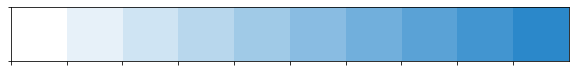

In [120]:
fn = """function(params) {if(params.name == '其他')return '';return params.name +'\\n\\n'+ (params.value).toFixed(2) + '%'}"""
def new_label_opts():
    return opts.LabelOpts(formatter=JsCode(fn), position="center",font_size = 20,font_family = '宋体') #定义标签样式
color=get_lighter_color('#FFFFFF',color_1)[0]

In [121]:
a = (
     Pie(init_opts = opts.InitOpts(height = '600px'))
    .add(
        "",cjjjd_name_ratio,center=["20%", "20%"],radius=[70, 110],label_opts=new_label_opts()) #radius为饼图的半径，数组的第一项是内半径，第二项是外半径
   
    .add(
        "",ydyl_name_ratio,center=["50%", "20%"],radius=[70, 110],label_opts=new_label_opts())
    
    .add(
        "",csj_name_ratio,center=["80%", "20%"],radius=[70, 110],label_opts=new_label_opts())
   
    .add(
        "",jjj_name_ratio,center=["20%", "80%"],radius=[70, 110],label_opts=new_label_opts()) 

    .add(
        "",yga_name_ratio,center=["50%", "80%"],radius=[70, 110],label_opts=new_label_opts()) 
    
    .add(
        "",hhly_name_ratio,center=["80%", "80%"],radius=[70, 110],label_opts=new_label_opts())
    
    .set_colors([f'{color_1}',color[1],f'{color_1}',f'{color_1}',f'{color_1}',f'{color_1}'])
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False))
)

In [122]:
#make_snapshot(snapshot,a.render(), pic_path+'毕业生国家重点战略地区就业情况.png',pixel_ratio = 5)
while_func('毕业生国家重点战略地区就业情况',a)
add_pic('毕业生国家重点战略地区就业情况',15.24)
write_tz('毕业生国家重点战略地区就业情况')
a.render_notebook()

## 三、主要就业城市

In [123]:
Heading_2("三、主要就业城市")
#单位就业分布取数
value_count=map_type_class('dwjy','是','sqmc',False)[0]
value_ratio=map_type_class('dwjy','是','sqmc',False)[1]
data=value_count[:10]
data['其他']=value_count[10:].sum()
data
value_ratio

sqmc
长沙市    15.85
深圳市    13.95
衡阳市     7.70
广州市     6.25
东莞市     3.65
       ...  
扬州市     0.03
房山区     0.03
怀柔区     0.03
忻州市     0.03
龙岩市     0.03
Name: xh, Length: 256, dtype: float64

In [124]:
write_zw(f'''从就业单位所在城市来看，毕业生主要流向的城市为“{data.index[0]}”{data[0]}人，占已落实就业单位毕业生的{value_ratio[0]:.2f}%，其次为“{data.index[1]}”{data[1]}人（占比{value_ratio[1]:.2f}%）、“{data.index[2]}”{data[2]}人（占比{value_ratio[2]:.2f}%）。''')

In [125]:
#定义标签格式
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % value_count.sum() + "+ '%' + '\\n' + params.value + '人'}"
#定义图元颜色
if type(color) == list:    
        color_fuc = """
                function (params) {
                    if (params.dataIndex % 2 == 1) 
                        return """ + f"'{color_1}';" + """
                    else return """ + f"'{color_2}';" +"""
                }
               """
a = (
    Bar(init_opts = opts.InitOpts(width='1000px'))
    .add_xaxis(data.index.tolist())
    .add_yaxis("",data.tolist(),bar_width=25,stack="stack1",
                label_opts=opts.LabelOpts(position='top',color=JsCode(color_fuc),formatter=JsCode(jscode),font_size = 20,font_family = 'Times New Roman'),
                itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_fuc)))#设置柱形图样式
    .set_global_opts(yaxis_opts=opts.AxisOpts(is_show=False),#不显示y轴
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 20,font_family = '宋体',rotate=30))))

In [126]:
#make_snapshot(snapshot,a.render(), pic_path+'毕业生就业城市.png',pixel_ratio = 5)
while_func('毕业生就业城市',a)
add_pic('毕业生就业城市',15.24)
write_tz('毕业生主要就业城市（前10）')
a.render_notebook()

## 四、就业经济区流向

In [127]:
Heading_2("四、就业经济区流向")

In [128]:
df_jy['syjjq_'] = df_jy['syjjq'].replace({'东北综合经济区':'东北综合经济区_', '东部沿海经济区':'东部沿海经济区_','北部沿海经济区':'北部沿海经济区_','南部沿海经济区':'南部沿海经济区_','大西北经济区':'大西北经济区_','西南经济区':'西南经济区_','长江中游经济区':'长江中游经济区_','黄河中游经济区':'黄河中游经济区_'})
syjjq_jyjjq_count = df_jy.query("dwjy=='是'").groupby(['syjjq_','jjq']).count()['xh']

link=[]                                      #构建桑基图数据表
for i in range(len(syjjq_jyjjq_count)):
    dic={}
    dic['source']=syjjq_jyjjq_count.index[i][0]
    dic['target']=syjjq_jyjjq_count.index[i][1]
    dic['value']=int(syjjq_jyjjq_count.values[i])
    link.append(dic)

#取生源人数和就业人数最多的经济区
max_count = syjjq_jyjjq_count.sort_values(ascending = False).index[0][1]

In [129]:
write_zw(f'''从毕业生生源地所在经济大区（左）和就业地所在经济大区（右）分布可以看到：{max_count}的生源人数和就业人数最多。''')

In [130]:
nodes = [                                                            #定义数据指标和颜色
    {"name": "东北综合经济区",'itemStyle':{'color':f'{color_1}'}},
    {"name": "东部沿海经济区",'itemStyle':{'color':f'{color_1}'}},
    {"name": "北部沿海经济区",'itemStyle':{'color':f'{color_3}'}},
    {"name": "南部沿海经济区",'itemStyle':{'color':f'{color_4}'}},
    {"name": "大西北经济区",'itemStyle':{'color':f'{color_5}'}},
    {"name": "西南经济区",'itemStyle':{'color':f'{color_5}'}},
    {"name": "长江中游经济区",'itemStyle':{'color':f'{color_2}'}},
    {"name": "黄河中游经济区",'itemStyle':{'color':f'{color_2}'}},
    {"name": "东北综合经济区_",'itemStyle':{'color':f'{color_1}'}},
    {"name": "东部沿海经济区_",'itemStyle':{'color':f'{color_1}'}},
    {"name": "北部沿海经济区_",'itemStyle':{'color':f'{color_3}'}},
    {"name": "南部沿海经济区_",'itemStyle':{'color':f'{color_4}'}},
    {"name": "大西北经济区_",'itemStyle':{'color':f'{color_5}'}},
    {"name": "西南经济区_",'itemStyle':{'color':f'{color_5}'}},
    {"name": "长江中游经济区_",'itemStyle':{'color':f'{color_2}'}},
    {"name": "黄河中游经济区_",'itemStyle':{'color':f'{color_2}'}},
]

links = link

c = (
    Sankey(init_opts = opts.InitOpts(height = '700px'))
    .add(
        "",
        nodes,
        links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.3, color="source"),
        label_opts=opts.LabelOpts(position="right",font_size = 12,font_family = '宋体')
    )
)
c.render_notebook()

In [131]:
#make_snapshot(snapshot,c.render(), pic_path+'毕业生生源地到就业地流向.png',pixel_ratio = 5)
while_func('毕业生生源地到就业地流向',c)
add_pic('毕业生生源地到就业地流向',15.24)
write_tz('毕业生生源地（左）到就业地（右）流向')

In [132]:
write_zw(f'''各大经济区的生源人数和就业人数如下表所示。''')

In [133]:
sql_syjjq_jjq=f'''
 SELECT jjq,syrs,jyrs FROM
((SELECT jjq,count(xh) jyrs FROM dw_s_employment_auto where xxmc = '{xxmc}' and substring(bynd,1,4)='{bynd}' and dwjy='是' group by jjq)a
left join
(SELECT syjjq,count(xh) syrs FROM dw_s_employment_auto where xxmc = '{xxmc}' and substring(bynd,1,4)='{bynd}' group by syjjq)b on a.jjq=b.syjjq
)t1 where jjq is not null order by syrs desc
'''
data_syjjq_jj= pd.read_sql(sql=sql_syjjq_jjq,con=conn)
data_syjjq_jj

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,jjq,syrs,jyrs
0,长江中游经济区,3915,1624
1,西南经济区,245,109
2,大西北经济区,205,77
3,黄河中游经济区,186,118
4,南部沿海经济区,181,1349
5,东部沿海经济区,141,489
6,北部沿海经济区,92,158
7,东北综合经济区,64,24


In [134]:
#普通表结构模板

#aql查询生成的DataFrame按列赋值给变量
list1=data_syjjq_jj['jjq'] 
list2=data_syjjq_jj['syrs']
list3=data_syjjq_jj['jyrs']

trow=len(list1)#行数
tcol=3 #列数

write_tz('生源地到就业地流向人数')#题注
table = document.add_table(rows=trow+1,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '经济区' 
table.cell(0,1).text = '生源人数'
table.cell(0,2).text = '单位就业人数'


#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=list1[i]
    table.cell(i+1,1).text=str(list2[i])
    table.cell(i+1,2).text=str(list3[i])

#调整单元格内部的格式
table_format ()     

document.add_paragraph().add_run(u'''''')#增加空行

## 五、回生源地就业情况

In [135]:
Heading_2("五、回生源地就业情况")

In [136]:
#回生源地就业取数

sql13=f'''
SELECT a.sfmc,b.sysf,syrs,hsydrs,round(cast(hsydrs as numeric)/cast(syrs as numeric)*100,2) hsyd_ratio,jyrs,round(cast(jyrs as numeric)/cast(syrs as numeric),2) jyrs_syrs_ratio from(
(SELECT sfmc,count(xh) jyrs FROM dw_s_employment_auto
where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' and dwjy = '是' group by sfmc)a 
full join
(SELECT sysf,count(xh) syrs FROM dw_s_employment_auto
where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' and dwjy = '是' group by sysf)b on a.sfmc=b.sysf
full join
(SELECT sysf,count(xh) hsydrs FROM dw_s_employment_auto
where xxmc = '{xxmc}'and substring(bynd,1,4)='{bynd}' and dwjy = '是' and sysf=sfmc group by sysf)c on a.sfmc=c.sysf)
order by round(cast(hsydrs as numeric)/cast(syrs as numeric)*100,2) desc
     '''

df_hsydjy_1 = pd.read_sql(sql=sql13,con=conn)
df_hsydjy = df_hsydjy_1.replace( np.nan,'-')#nan值替换成'-'
df_hsydjy

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sfmc,sysf,syrs,hsydrs,hsyd_ratio,jyrs,jyrs_syrs_ratio
0,北京市,北京市,1.0,1.0,100.0,96,96.0
1,西藏自治区,西藏自治区,7.0,7.0,100.0,10,1.43
2,广东省,广东省,36.0,35.0,97.22,1270,35.28
3,上海市,上海市,8.0,7.0,87.5,159,19.88
4,浙江省,浙江省,42.0,35.0,83.33,175,4.17
5,天津市,天津市,24.0,13.0,54.17,31,1.29
6,山东省,山东省,23.0,12.0,52.17,16,0.7
7,福建省,福建省,55.0,27.0,49.09,56,1.02
8,江苏省,江苏省,59.0,28.0,47.46,155,2.63
9,宁夏回族自治区,宁夏回族自治区,34.0,16.0,47.06,17,0.5


In [137]:
hsydrs = df_hsydjy_1['hsydrs'].sum()
hsydrs_ratio = hsydrs/df_hsydjy_1['syrs'].sum()*100
hsyd_dwjy = df_hsydjy.query(f"sysf=='{xxsf}'")['hsydrs'].values[0]
sysf_dwjy = df_hsydjy.query(f"sysf=='{xxsf}'")['syrs'].values[0]
snjy_ratio = hsyd_dwjy/sysf_dwjy*100
xxsf_1 = xxsf.replace('省','')#去掉“省”字
jysf_dwjy = df_hsydjy.query(f"sfmc=='{xxsf}'")['jyrs'].values[0]

In [138]:
write_zw(f'''已落实就业单位的毕业生有{dwjy_count}人，回生源地就业的有{int(hsydrs)}人，回生源地就业比例为{hsydrs_ratio:.2f}% 。其中{xxsf}生源留{xxsf}就业比例为{snjy_ratio:.2f}%（{xxsf_1}籍毕业生单位就业{int(sysf_dwjy)}人，留{xxsf}就业人数{int(hsyd_dwjy)}人）。''')

In [139]:
#普通表结构模板

#aql查询生成的DataFrame按列赋值给变量
list1=df_hsydjy.query("sysf!='-'").reset_index(drop=True)['sysf'] #学院结构:yx,生源结构:sysf,民族结构:mz
list2=df_hsydjy.query("sysf!='-'").reset_index(drop=True)['syrs']
list3=df_hsydjy.query("sysf!='-'").reset_index(drop=True)['hsydrs']
list4=df_hsydjy.query("sysf!='-'").reset_index(drop=True)['hsyd_ratio']
# list5=df_hsydjy['jyrs']
# list6=df_hsydjy['jyrs_syrs_ratio']


trow=len(list1)#行数,学院结构:yx,生源结构:sysf,民族结构:mz
tcol=4 #列数

write_tz('已就业毕业生回生源地就业情况')#题注
table = document.add_table(rows=trow+2,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '省份' 
table.cell(0,1).text ='单位就业人数'
table.cell(0,2).text ='回生源地就业人数'
table.cell(0,3).text ='回生源地就业比例'
# table.cell(0,4).text ='就业人数'
# table.cell(0,5).text ='就业人数/生源人数'

#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=list1[i]
    if type(list2[i])==str:#输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
        table.cell(i+1,1).text=list2[i]
    else:
        table.cell(i+1,1).text=str(int(list2[i]))
    if type(list3[i])==str:#输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
        table.cell(i+1,2).text=list3[i]
    else:
        table.cell(i+1,2).text=str(int(list3[i]))
    if type(list4[i])==str:#输入比例的时候，空值“-”不变，其他数值要保证两位小数以及加上百分号
        table.cell(i+1,3).text=list4[i]
    else:
        table.cell(i+1,3).text=str(Decimal(list4[i]).quantize(Decimal("0.00")))+'%'
#     table.cell(i+1,4).text=str(list5[i])
#     if type(list6[i])==str:
#         table.cell(i+1,5).text=list6[i]
#     else:
#         table.cell(i+1,5).text=str(Decimal(list6[i]).quantize(Decimal("0.00")))


#加入尾部汇总行
table.cell(trow+1,0).text='总计'
table.cell(trow+1,1).text=str(int(list_sum(list2)))#自定义函数list_sum,忽略列表里的'-'求和
table.cell(trow+1,2).text=str(int(list_sum(list3)))
table.cell(trow+1,3).text=str(Decimal(list_sum(list3)/list_sum(list2)*100).quantize(Decimal("0.00")))+'%'
# table.cell(trow+1,4).text=str(list_sum(list5))
# table.cell(trow+1,5).text='-'

#调整单元格内部的格式
table_format ()     

document.add_paragraph().add_run(u'''''')#增加空行

## 六、省内就业情况

### 1．省内就业地区

In [140]:
Heading_2("六、省内就业情况")
write_zw(f'''毕业生在省内就业{jysf_dwjy}人，主要从省内就业地区、就业行业、生源地分布三个方面进行分析。''')
Heading_3("（一）省内就业地区")
picture_province_map('dwjy','是','毕业生省内就业城市_1')[1]

In [141]:
snjy_count = df_jy.query(f"sfmc=='{xxsf}'&dwjy=='是'").groupby('sqmc').count()['xh'].sort_values(ascending = True)#省内就业计数
snjy_ratio = round(snjy_count/snjy_count.sum()*100,2)
snjy_ratio

sqmc
张家界市           0.60
湘西土家族苗族自治州     0.94
郴州市            2.41
怀化市            2.48
益阳市            2.55
邵阳市            2.75
湘潭市            3.02
常德市            3.29
娄底市            3.55
永州市            3.69
岳阳市            6.17
株洲市            6.17
衡阳市           20.39
长沙市           41.99
Name: xh, dtype: float64

In [142]:
write_zw(f'''毕业生在省内就业城市主要为“{snjy_count.index[-1]}”（{snjy_count[-1]}人，占{xxsf}就业人数{snjy_ratio[-1]:.2f}%）、“{snjy_count.index[-2]}”（{snjy_count[-2]}人，占比{snjy_ratio[-2]:.2f}%）、“{snjy_count.index[-3]}”（{snjy_count[-3]}人，占比{snjy_ratio[-3]:.2f}%）。''')

In [143]:
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % snjy_count.sum() + "+ '%' + ' ' + params.value + '人'}"
a = (
    Bar()
    .add_xaxis(snjy_count.index.tolist())
    .add_yaxis("",snjy_count.tolist(),bar_width=25,stack="stack1",
               label_opts=opts.LabelOpts(position='right',color=color_1,font_weight='bold',
                                         formatter = JsCode(jscode),font_size = 16,font_family = 'Times New Roman'),
               itemstyle_opts=opts.ItemStyleOpts(color=color_1))#设置柱形图样式
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 21,font_family = '宋体',color='black'), 
                                              axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)))))
a =( 
    Grid(init_opts = opts.InitOpts(height = '600px',width = '1250px'))  #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left="25%")))#位置调整
a.render_notebook()

In [144]:
picture_province_map('dwjy','是','毕业生省内就业城市_1')[0]
#make_snapshot(snapshot, a.render(), pic_path+'毕业生省内就业城市_2.png',pixel_ratio = 5)
while_func('毕业生省内就业城市_2',a)
add_pic('毕业生省内就业城市_1',15.24)
add_pic('毕业生省内就业城市_2',15.24)
write_tz('毕业生省内就业城市分布')

### 2．省内就业行业

In [145]:
Heading_3("（二）省内就业行业")

In [146]:
value_count = df_jy.query(f"sfmc=='{xxsf}'&dwjy=='是'").groupby('dwhy').count()['xh'].sort_values(ascending = True)
value_ratio = value_count/value_count.sum()*100
value_count_1 = []
for i in range(value_count.shape[0]):
    value_count_1.append(max(value_count)*1.3)#构建辅助条形图数据    

In [147]:
write_zw(f'''毕业生省内就业行业主要为“{value_count.index[-1]}”（{value_count[-1]}人，占比{value_ratio[-1]:.2f}%）、“{value_count.index[-2]}”（{value_count[-2]}人，占比{value_ratio[-2]:.2f}%）、“{value_count.index[-3]}”（{value_count[-3]}人，占比{value_ratio[-3]:.2f}%）。''')

In [148]:
pictorial_reversal_bar(x_data=value_count.index.tolist(),y1_data=value_count.tolist(),y2_data=value_count_1,all_count=value_count.sum(),picture_name='毕业生省内就业行业',height = '850px')[1]

[1, 9, 9, 12, 13, 15, 25, 29, 34, 46, 49, 83, 88, 91, 107, 110, 124, 209, 442] 1496 function (params) {return (params.value/1496*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


In [149]:
pictorial_reversal_bar(x_data=value_count.index.tolist(),y1_data=value_count.tolist(),y2_data=value_count_1,all_count=value_count.sum(),picture_name='毕业生省内就业行业',height = '850px')[0]
add_pic('毕业生省内就业行业',15.24)
write_tz('毕业生省内就业行业')

[1, 9, 9, 12, 13, 15, 25, 29, 34, 46, 49, 83, 88, 91, 107, 110, 124, 209, 442] 1496 function (params) {return (params.value/1496*100).toFixed(2)+ '%' + ' ' + params.value + '人'}


### 3．省内就业生源地分布

In [150]:
Heading_3("（三）省内就业生源地分布")

In [151]:
# for i in (df_jy['sfmc']):
#     if i==f'{xxsf}':
#         df_jy['sfmc_1']=df_jy['sfmc']
#     else: df_jy['sfmc_1']=df_jy['sfmc'].replace({i:f'非{xxsf}'})

In [152]:
df_jy['sfmc_1'] = df_jy['sfmc'].apply(lambda x: xxsf if x == xxsf else '非'+xxsf)#就业省份替换，如其他省份钱替换成非湖南省
sysf_sfmc_count = df_jy.query("dwjy=='是'").groupby(['sysf','sfmc_1']).count()['xh']
snjy_count_1 = df_jy.query(f"dwjy=='是'& sysf=='{xxsf}'& sfmc=='{xxsf}'").count()['xh']
snjy_count_2 = df_jy.query(f"dwjy=='是'& sysf!='{xxsf}'& sfmc=='{xxsf}'").count()['xh']
snjy_ratio_1 = snjy_count_1/(snjy_count_1+snjy_count_2)
snjy_ratio_2 = snjy_count_2/(snjy_count_1+snjy_count_2)
snjy_count_3 = df_jy.query(f"dwjy=='是'& sysf=='{xxsf}'& sqmc=='{xxcs}'").count()['xh']
snjy_count_4 = df_jy.query(f"dwjy=='是'& sysf!='{xxsf}'& sqmc=='{xxcs}'").count()['xh']
snjy_ratio_3 = snjy_count_3/(snjy_count_3+snjy_count_4)
snjy_ratio_4 = snjy_count_4/(snjy_count_3+snjy_count_4)

In [153]:
write_zw(f'''在{xxsf}就业的毕业生中，{snjy_ratio_1*100:.2f}%的毕业生为{xxsf_1}籍生源，{snjy_ratio_2*100:.2f}%的毕业生为非{xxsf_1}籍生源。在学校所在城市{xxcs}就业的毕业生中，{snjy_ratio_3*100:.2f}%的毕业生为{xxsf_1}籍生源，{snjy_ratio_4*100:.2f}%的毕业生为非{xxsf_1}籍生源。''')

In [154]:
#普通表结构模板

trow=4#行数
tcol=9 #列数

write_tz('省内就业毕业生生源地分布')#题注
table = document.add_table(rows=trow,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '生源属性' 
table.cell(0,1).text = '就业地'
table.cell(0,2).text = '就业人数'
table.cell(0,3).text = '占比'

table.cell(0,5).text = '生源属性' 
table.cell(0,6).text = '就业地'
table.cell(0,7).text = '就业人数'
table.cell(0,8).text = '占比'

#数据录入表格
table.cell(1,0).text=f'{xxsf_1}籍'
table.cell(1,1).text=f'{xxsf}'
table.cell(1,2).text=str(snjy_count_1)
table.cell(1,3).text= "%.2f" % (snjy_ratio_1*100) + '%'

table.cell(1,5).text=f'{xxsf_1}籍'
table.cell(1,6).text='本市'
table.cell(1,7).text=str(snjy_count_3)
table.cell(1,8).text="%.2f" % (snjy_ratio_3*100) + '%'

table.cell(2,0).text=f'非{xxsf_1}籍'
table.cell(2,1).text=f'{xxsf}'
table.cell(2,2).text=str(snjy_count_2)
table.cell(2,3).text= "%.2f" % (snjy_ratio_2*100) + '%'

table.cell(2,5).text=f'非{xxsf_1}籍'
table.cell(2,6).text='本市'
table.cell(2,7).text=str(snjy_count_4)
table.cell(2,8).text="%.2f" % (snjy_ratio_4*100) + '%'

#加入尾部汇总行
table.cell(3,0).text='总计'
table.cell(3,0).merge(table.cell(3,1))
table.cell(3,2).text=str(snjy_count_1+snjy_count_2)
table.cell(3,3).text='100.00%'

table.cell(3,5).text='总计'
table.cell(3,5).merge(table.cell(3,6))
table.cell(3,7).text=str(snjy_count_3+snjy_count_4)
table.cell(3,8).text='100.00%'
    
#调整单元格内部的格式
table_format ()

In [155]:
write_zw(f'''各生源地的毕业生到{xxsf}就业的流向如下图所示。''')

In [156]:
#构建桑基图数据表
link=[]                                      
for i in range(len(sysf_sfmc_count)):
    dic={}
    dic['source']=sysf_sfmc_count.index[i][0]
    dic['target']=sysf_sfmc_count.index[i][1] + '_'
    dic['value']=int(sysf_sfmc_count.values[i])
    link.append(dic)

#设置类别和颜色    
node=[]
node.append({'name': df_jy.query("dwjy=='是'")['sysf'].unique()[0], 'itemStyle': {'color': ''}})
for i in range(len(df_jy.query("dwjy=='是'")['sfmc_1'].unique())):
    dic={}
    dic['name']=df_jy.query("dwjy=='是'")['sfmc_1'].unique()[i] + '_'
    dic['itemStyle']={'color':color_2}
    node.append(dic)
for i in range(len(df_jy.query("dwjy=='是'")['sysf'].unique())-1):
    dic={}
    dic['name']=df_jy.query("dwjy=='是'")['sysf'].unique()[1:][i]
    dic['itemStyle']={'color':f'{color_1}'}
    node.append(dic)

colors = [color_1,color_2,color_3,color_4,color_5]
for i in range(len(node)):
    node[i]['itemStyle']['color'] = colors[i % 5]
node

[{'name': '江苏省', 'itemStyle': {'color': '#147BC5'}},
 {'name': '非湖南省_', 'itemStyle': {'color': '#FBB03E'}},
 {'name': '湖南省_', 'itemStyle': {'color': '#24AAE1'}},
 {'name': '福建省', 'itemStyle': {'color': '#E3798D'}},
 {'name': '湖南省', 'itemStyle': {'color': '#00ABCB'}},
 {'name': '新疆维吾尔自治区', 'itemStyle': {'color': '#147BC5'}},
 {'name': '安徽省', 'itemStyle': {'color': '#FBB03E'}},
 {'name': '四川省', 'itemStyle': {'color': '#24AAE1'}},
 {'name': '青海省', 'itemStyle': {'color': '#E3798D'}},
 {'name': '上海市', 'itemStyle': {'color': '#00ABCB'}},
 {'name': '山东省', 'itemStyle': {'color': '#147BC5'}},
 {'name': '江西省', 'itemStyle': {'color': '#FBB03E'}},
 {'name': '内蒙古自治区', 'itemStyle': {'color': '#24AAE1'}},
 {'name': '海南省', 'itemStyle': {'color': '#E3798D'}},
 {'name': '辽宁省', 'itemStyle': {'color': '#00ABCB'}},
 {'name': '甘肃省', 'itemStyle': {'color': '#147BC5'}},
 {'name': '浙江省', 'itemStyle': {'color': '#FBB03E'}},
 {'name': '陕西省', 'itemStyle': {'color': '#24AAE1'}},
 {'name': '云南省', 'itemStyle': {'col

In [157]:
c = (
    Sankey(init_opts = opts.InitOpts(height = '700px'))
    .add(
        "",
        node,
        link,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.3, color="source"),
        label_opts=opts.LabelOpts(position="right",font_size = 12,font_family = '宋体')
    )
)
c.render_notebook()

In [158]:
#make_snapshot(snapshot, c.render(), pic_path+'毕业生生源省到就业省流向.png',pixel_ratio = 5)
while_func('毕业生生源省到就业省流向',c)
add_pic('毕业生生源省到就业省流向',15.24)
write_tz(f'各省生源（左）到{xxsf}（右）就业流向')

## 七、国家地方基层就业情况

In [159]:
Heading_2("七、国家地方基层就业情况")

In [10]:
jkbydq_count = df_jy.query("jylbfl == '国家、地方项目'").groupby('jylb').count()['xh'].sort_values(ascending=False)
jkbydq_name_count = [*zip(jkbydq_count.index,jkbydq_count)]
jkbydq_name_count

[('选调生', 7), ('西部计划', 4), ('地方特岗教师', 3), ('三支一扶', 2)]

In [161]:
write_zw(f'''学校始终将学生就业观、成才观的教育和培养放在首要位置，聚焦价值引领，厚植爱国主义情怀，鼓励毕业生为各地脱贫攻坚和乡村振兴贡献力量。2022届毕业生中，有{jkbydq_count.sum()}人从事国家或地方基层项目，占单位就业总人数的{jkbydq_count.sum()/dwjy_count*100:.2f}%。'''+topthree_count(jkbydq_count))

In [162]:
 a = (
    Pie()
    .add("",jkbydq_name_count,radius=["", "50%"],
            label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
            label_opts=opts.LabelOpts(interval=0,
                position="outside",
               #formatter='{b|{b}}'+'\n'+'{d|{d}}%',
                formatter='{c|{c}}{per|人}'+'\n'*4+'{b|{b}}',
                rich={
                    "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                    "per": {"fontSize": 20},
                    "c": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
                })
         ) 
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=False))#去掉图例
    .set_colors([color_1,color_2,color_3,color_4,color_5]))
a.render_notebook()

In [163]:
#make_snapshot(snapshot, a.render(), pic_path+'毕业生国家、地方基层就业情况.png',pixel_ratio = 5)
while_func('毕业生国家、地方基层就业情况',a)
add_pic('毕业生国家、地方基层就业情况',15.24)
write_tz('国家、地方基层就业情况')

## 八、重点企业就业情况

In [164]:
sql_zdqy=f'''select dwmc,bq,jyrs,round(jyrs/rs*100,2) as ratio from
((SELECT dwmc,case when sj500q='是' then '世界500强' when zg500q='是' then '中国500强' end as bq,count(xh) as jyrs 
FROM "dw_s_employment_auto" where xxmc='{xxmc}' and bynd='{bynd}'and zh500q='是' group by dwmc)a
left join (SELECT count(xh) rs FROM "dw_s_employment_auto" where xxmc='{xxmc}'and bynd='{bynd}'and zh500q='是')b on 1=1)
order by jyrs desc'''
data_zdqy = pd.read_sql(sql=sql_zdqy,con=conn)
data_zdqy

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dwmc,bq,jyrs,ratio


In [165]:
Heading_2("八、重点企业就业情况")
write_zw(f'''毕业生进入500强企业就业人数为{data_zdqy['jyrs'].sum()}人，占已落实就业单位毕业生的{data_zdqy['jyrs'].sum()/dwjy_count*100:.2f}%。其中世界500强企业吸纳毕业生{data_zdqy.query("bq == '世界500强'").sum()['jyrs']}人；中国500强企业吸纳毕业生{data_zdqy.query("bq == '中国500强'").sum()['jyrs']}人。具体500强企业就业明细如下表所示。''')

In [166]:
#普通表结构模板

trow=data_zdqy.shape[0]#行数
tcol=data_zdqy.shape[1] #列数

write_tz('毕业生五百强企业就业情况')#题注
table = document.add_table(rows=trow+2,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '集团名称' 
table.cell(0,1).text = '500强标签'
table.cell(0,2).text = '就业人数'
table.cell(0,3).text = '占比'


#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=data_zdqy['dwmc'][i]
    table.cell(i+1,1).text=data_zdqy['bq'][i]
    table.cell(i+1,2).text=str(data_zdqy['jyrs'][i])
    table.cell(i+1,3).text=f'''{data_zdqy['ratio'][i]:.2f}%'''

#加入尾部汇总行
table.cell(trow+1,0).text='500强企业'
table.cell(trow+1,0).merge(table.cell(trow+1,1))
table.cell(trow+1,2).text=str(data_zdqy['jyrs'].sum())
table.cell(trow+1,3).text='100.00%'
    
#调整单元格内部的格式
table_format ()     

document.add_paragraph().add_run(u'''''')#增加空行

## 九、战略新兴产业就业情况

In [167]:
Heading_2("九、战略新兴产业就业情况")
xxcy_count = index_single_options_top('dy_dwcy',False)[1].drop('其他产业')
xxcy_count.rename(index={'相关服务业（战略性新兴产业相关服务业）':'相关服务业'},inplace=True)
xxcy_ratio = xxcy_count/xxcy_count.sum()*100
write_zw(f'''毕业生在重点战略新兴产业就业的占比为{100-index_single_options_top('dy_dwcy',False)[2]['其他产业']:.2f}%，就业的战略新兴产业主要为{topthree_proportion(xxcy_ratio.sort_values(ascending=True),'dy_dwcy')}''')

In [168]:
value_count_1 = []
for i in range(xxcy_count.shape[0]):
    value_count_1.append(max(xxcy_count)*1.3)#构建辅助条形图数据 

#环形图数据构建
xxcy_1 = ['新兴产业','非新兴产业']
xxcy_2 = [100-index_single_options_top('dy_dwcy',False)[2]['其他产业'],index_single_options_top('dy_dwcy',False)[2]['其他产业']]
xxcy_zip =[*zip(xxcy_1,xxcy_2)]

#柱形图降序数据传入
xxcy_count_1 = index_single_options_top('dy_dwcy',True)[1].drop('其他产业')
xxcy_count_1.rename(index={'相关服务业（战略性新兴产业相关服务业）':'相关服务业'},inplace=True)

In [169]:
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % xxcy_count.sum() + "+ '%'}"   
a = (
    PictorialBar()
    .add_xaxis(xxcy_count_1.index.tolist())
    .add_yaxis("",value_count_1,label_opts=opts.LabelOpts(is_show=False),symbol_size=[25,25],
               itemstyle_opts=opts.ItemStyleOpts(color=color_1,opacity=0.2),symbol=bd,symbol_repeat=True) #添加辅助条形图,增加灰色进度条
    .add_yaxis("",xxcy_count_1.tolist(),symbol_size=['100%',25],
               label_opts=opts.LabelOpts(position="right",color=color_1,font_weight='bold',
#                                          formatter =JsCode("function (params) {return (params.value/3352*100).toFixed(2) + '%' + ' ' + params.value + '人'}"),
                                         formatter=JsCode(jscode),
                                         font_size=16,font_family ='Bahnschrift SemiLight Condensed'                                   
                                         ),
               itemstyle_opts=opts.ItemStyleOpts(color=color_1),symbol=cube)#设置柱形图样式
  
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),axislabel_opts=opts.LabelOpts(font_size=21,color='black',font_family = '宋体')))
    .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}',f'{color_5}'])
)
xxcy = (
Pie()
.add("",xxcy_zip,radius=["30%", "55%"],center=["20%", "55%"],label_opts=opts.LabelOpts(is_show=False)) 
.set_global_opts(
    title_opts=opts.TitleOpts(title='战略新兴产业' ,
                              subtitle=f'''      {100-index_single_options_top('dy_dwcy',False)[2]['其他产业']:.2f}%''',pos_left='13%',pos_top='50%', #标题位置
                              title_textstyle_opts=opts.TextStyleOpts(font_size = 20,font_family = '宋体',color=color_1),
                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size = 20,font_family = 'Bahnschrift SemiLight Condensed',color=color_1)), #标题字体样式
    legend_opts=opts.LegendOpts(is_show=False)))#去掉图例

grid = (
    Grid(init_opts=opts.InitOpts(height='500px',width='1000px'))   #设置图形大小,高度:height,宽度:width
    .add(a, grid_opts=opts.GridOpts(pos_left="55%"))
    .add(xxcy, grid_opts=opts.GridOpts(pos_left="")))
grid.render_notebook()

In [170]:
#make_snapshot(snapshot, grid.render(), pic_path+'毕业生战略新兴产业就业情况.png',pixel_ratio = 5)
while_func('毕业生战略新兴产业就业情况',grid)
add_pic('毕业生战略新兴产业就业情况',15.24)
write_tz('毕业生战略新兴产业就业情况')

In [171]:
document.add_page_break()#章节末尾分页符
document.add_page_break()

# 第三章 毕业生继续深造情况

## （一）总体继续深造情况

In [17]:
document.add_picture(pic_path+'一级标题底色.png')
Heading_1("第三章      毕业生继续深造情况")
Heading_2("一、总体继续深造情况")
Heading_3("（一）继续深造率")

In [18]:
gnsx_count = df_jy.query("gnsx == '是'").count()['xh']
cgcj_count = df_jy.query("cgcj=='是'").count()['xh']
gnsx_ratio = gnsx_count/df_jy.count()['xh']
cgcj_ratio = cgcj_count/df_jy.count()['xh']

formatter_1 = "%d"%(gnsx_count)+'人'+'\n'*2+"%.2f"%(gnsx_ratio*100)+'%'+'\n'*9+'国内升学'
formatter_2 = "%d"%(cgcj_count)+'人'+'\n'*2+"%.2f"%(cgcj_ratio*100)+'%'+'\n'*9+'出国（境）'

In [21]:
write_zw(f'''毕业生总体继续深造人数{gnsx_count+cgcj_count}人，继续深造率为{(gnsx_count+cgcj_count)/bys_count*100:.2f}%。其中国内升学{gnsx_count}人，国内升学率为{gnsx_ratio*100:.2f}%；出国（境）{cgcj_count}人，出国（境）率为{cgcj_ratio*100:.2f}%。''')

In [23]:
a = (
    Liquid()
    .add("国内升学", [gnsx_ratio], is_outline_show=False,shape = bd,center=["30%","50%"],is_animation=False,color = [color_1],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_1,
        formatter=f'{formatter_1}'))
    .add("出国（境）", [cgcj_ratio], is_outline_show=False,shape = airplane, center=["70%","50%"],is_animation=False,color = [color_2],background_color=['#D3D3D3'],
         label_opts=opts.LabelOpts(font_size=25,position="inside",color = color_2,
         formatter=f'{formatter_2}'))
    .set_series_opts(radius="30%"))
a.render_notebook()

In [ ]:
#make_snapshot(snapshot, a.render(), pic_path+'毕业生继续深造情况.png',pixel_ratio = 5)
while_func('毕业生继续深造情况',a)
add_pic('毕业生继续深造情况',15.24)
write_tz('毕业生继续深造情况')

## （二）分学院及专业继续深造情况

In [ ]:
Heading_3("（二）分学院及专业继续深造情况")

In [24]:
#分专业继续深造情况取数
sql_jxsz=f'''select a.yx,a.zy,bysrs,jxszrs,round(cast(jxszrs as numeric)/cast(bysrs as numeric)*100,2)jxsz_ratio,cgcjrs,gnsxrs from (
(select yx,zy,count(xh) bysrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} group by yx,zy) a
left join 
(select yx,zy,count(xh) jxszrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} and (gnsx = '是' or cgcj = '是') group by yx,zy) b on a.yx=b.yx and a.zy = b.zy
left join 
(select yx,zy,count(xh) cgcjrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} and cgcj = '是' group by yx,zy) c on a.yx=c.yx and a.zy = c.zy
left join 
(select yx,zy,count(xh) gnsxrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} and gnsx = '是' group by yx,zy) d on a.yx=d.yx and a.zy = d.zy)'''
df_zy_jxsz_1 = pd.read_sql(sql=sql_jxsz,con=conn)
df_zy_jxsz = df_zy_jxsz_1.replace( np.nan,'-')#nan值替换成'-'

sql_yx_jxsz=f'''select a.yx,bysrs,jxszrs,round(cast(jxszrs as numeric)/cast(bysrs as numeric)*100,2)jxsz_ratio,cgcjrs,gnsxrs from (
(select yx,count(xh) bysrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} group by yx) a
left join 
(select yx,count(xh) jxszrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} and (gnsx = '是' or cgcj = '是') group by yx) b on a.yx=b.yx
left join 
(select yx,count(xh) cgcjrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} and cgcj = '是' group by yx) c on a.yx=c.yx
left join 
(select yx,count(xh) gnsxrs from dw_s_employment_auto  where xxmc = '{xxmc}' and substring(bynd,1,4)={bynd} and gnsx = '是' group by yx) d on a.yx=d.yx) '''
df_yx_jxsz_1 = pd.read_sql(sql=sql_yx_jxsz,con=conn)

df_yx_jxsz = df_yx_jxsz_1.replace( np.nan,'-')#nan值替换成'-'
df_yx_jxsz_order = df_yx_jxsz_1.sort_values(by='jxsz_ratio',ascending=False)
df_zy_jxsz_order = df_zy_jxsz_1.sort_values(by='jxsz_ratio',ascending=False)

# df_yx_gnsxrs_order = df_yx_jxsz_1.sort_values(by='gnsxrs',ascending=False)
# df_yx_cgcjrs_order = df_yx_jxsz_1.sort_values(by='cgcjrs',ascending=False)

#sql取数人数识别成浮点数，将浮点数转换成整数
for i in df_yx_jxsz.columns[1:]:
    if i != 'jxsz_ratio':
        df_yx_jxsz[i] = df_yx_jxsz[i].apply(lambda x: x if x == '-' else int(x))
    else:
        continue
df_yx_jxsz

for i in df_zy_jxsz.columns[2:]:
    if i != 'jxsz_ratio':
        df_zy_jxsz[i] = df_zy_jxsz[i].apply(lambda x: x if x == '-' else int(x))
    else:
        continue

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [ ]:
write_zw(f'''继续深造率最高的三个学院为{df_yx_jxsz_order.iloc[0]['yx']}（继续深造{df_yx_jxsz_order.iloc[0]['jxszrs']}人，继续深造率{df_yx_jxsz_order.iloc[0]['jxsz_ratio']}%）、{df_yx_jxsz_order.iloc[1]['yx']}（继续深造{df_yx_jxsz_order.iloc[1]['jxszrs']}人，继续深造率{df_yx_jxsz_order.iloc[1]['jxsz_ratio']:.2f}%）、{df_yx_jxsz_order.iloc[2]['yx']}（继续深造{df_yx_jxsz_order.iloc[2]['jxszrs']}人，继续深造率{df_yx_jxsz_order.iloc[2]['jxsz_ratio']:.2f}%）。''')

write_zw(f'''继续深造率最高的三个专业为{df_zy_jxsz_order.iloc[0]['zy']}（继续深造{df_zy_jxsz_order.iloc[0]['jxszrs']}人，继续深造率{df_zy_jxsz_order.iloc[0]['jxsz_ratio']}%）、{df_zy_jxsz_order.iloc[1]['zy']}（继续深造{df_zy_jxsz_order.iloc[1]['jxszrs']}人，继续深造率{df_zy_jxsz_order.iloc[1]['jxsz_ratio']:.2f}%）、{df_zy_jxsz_order.iloc[2]['zy']}（继续深造{df_zy_jxsz_order.iloc[2]['jxszrs']}人，继续深造率{df_zy_jxsz_order.iloc[2]['jxsz_ratio']:.2f}%）。''')

#write_zw(f'''分深造类型来看，国内升学比例最高的为{df_yx_gnsxrs_order.iloc[0]['yx']}，升学人数{df_yx_gnsxrs_order.iloc[0]['gnsxrs']}人，国内升学率{df_yx_gnsxrs_order.iloc[0]['gnsxrs']/df_yx_gnsxrs_order.iloc[0]['bysrs']*100:.2f}%；出国（境）比例最高的为{df_yx_cgcjrs_order.iloc[0]['yx']}，出国（境）人数{df_yx_cgcjrs_order.iloc[0]['cgcjrs']}人，出国（境）率{df_yx_cgcjrs_order.iloc[0]['cgcjrs']/df_yx_cgcjrs_order.iloc[0]['bysrs']*100:.2f}%。''')

In [ ]:
#包含小计表结构模板

trow=len(df_yx_jxsz['yx'])+len(df_zy_jxsz['zy'])#行数
tcol=7 #列数

write_tz('分学院及专业继续深造情况')#题注
table=document.add_table(rows=trow+2,cols=tcol,style="表格-全部") #建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER #设置整个表格居中

#表格标题行设置
table.cell(0,0).text='学院'
table.cell(0,1).text='专业'
table.cell(0,2).text='毕业人数'
table.cell(0,3).text='国内升学人数'
table.cell(0,4).text='出国（境）人数'
table.cell(0,5).text='继续深造人数'
table.cell(0,6).text='继续深造率'

#aql查询生成的DataFrame按列赋值给变量
list1=df_yx_jxsz['yx']
list2=df_zy_jxsz['yx']
list3=df_yx_jxsz['bysrs']
list4=df_zy_jxsz['bysrs']
list5=df_yx_jxsz['jxszrs']
list6=df_zy_jxsz['jxszrs']
list7=df_yx_jxsz['cgcjrs']
list8=df_zy_jxsz['cgcjrs']
list9=df_yx_jxsz['gnsxrs']
list10=df_zy_jxsz['gnsxrs']
list11=df_yx_jxsz['jxsz_ratio']

#数据录入表格
num=0
for i in range(len(list1)):
    yx_name=list1[i]
    yx_rs=list3[i]
    yx_jxszrs=list5[i]
    yx_cgcjrs=list7[i]
    yx_gnsxrs=list9[i]
    zy_number=df_zy_jxsz[list2.map(lambda x: x== f'{yx_name}')].sort_values(by='bysrs',ascending=False)
    table.cell(num+1,0).merge(table.cell(num+len(zy_number),0))#学院列合并单元格
    table.cell(num+1,0).text=yx_name
    for j in range(len(zy_number)):
        table.cell(num+1,1).text=zy_number['zy'].iloc[j]
        table.cell(num+1,2).text=str(zy_number['bysrs'].iloc[j])
        table.cell(num+1,3).text=str(zy_number['gnsxrs'].iloc[j])
        table.cell(num+1,4).text=str(zy_number['cgcjrs'].iloc[j])
        table.cell(num+1,5).text=str(zy_number['jxszrs'].iloc[j])
        if type(zy_number['jxsz_ratio'].iloc[j])==str:
            table.cell(num+1,6).text=zy_number['jxsz_ratio'].iloc[j]
        else:
            table.cell(num+1,6).text=f'''{zy_number['jxsz_ratio'].iloc[j]:.2f}%'''
        num+=1
    table.cell(num+1,1).merge(table.cell(num+1,0))
    table.cell(num+1,1).text=f'{yx_name}'+" 汇总"
    table.cell(num+1,2).text=f'{yx_rs}'
    table.cell(num+1,3).text=f'{yx_gnsxrs}'
    table.cell(num+1,4).text=f'{yx_cgcjrs}'
    table.cell(num+1,5).text=f'{yx_jxszrs}'
    if type(list11[i])==str:
        table.cell(num+1,6).text=list11[i]
    else:
        table.cell(num+1,6).text=str(Decimal(list11[i]).quantize(Decimal("0.00")))+'%'
    num+=1
table.cell(trow+1,0).merge(table.cell(trow+1,1))
table.cell(trow+1,0).text="总计"
table.cell(trow+1,2).text=str(list_sum(list3))
table.cell(trow+1,3).text=str(list_sum(list9))
table.cell(trow+1,4).text=str(list_sum(list7))
table.cell(trow+1,5).text=str(list_sum(list5))
table.cell(trow+1,6).text="%.2f"%(list_sum(list5)/list_sum(list3)*100)+'%'

table_format ()#修改单元格格式函数
document.add_paragraph().add_run(u'''''')#增加空行

## （三）国内升学院校特征

### 1．院校类型

In [25]:
Heading_2("二、国内升学院校特征")
Heading_3("（一）升学院校类型")

In [26]:
sxgxbq_count = df_jy.query("gnsx=='是'").groupby('sxgxbq').count()['xh'].sort_values(ascending=False)
sxgxlx_count = df_jy.query("gnsx=='是'").groupby('sxgxlx').count()['xh'].sort_values(ascending=False)
sxgxlx_count_1 = df_jy.query("gnsx=='是'").groupby('sxgxlx').count()['xh'].sort_values(ascending=True)
sxgxbq_ratio = round(sxgxbq_count/sxgxbq_count.sum()*100,2)
sxgxlx_ratio = round(sxgxlx_count/sxgxlx_count.sum()*100,2)
sxgxbq_name_count = [*zip(sxgxbq_count.index,sxgxbq_count)]
#自定义标签样式
jscode = "function (params) {return (params.value/%d*100).toFixed(2)" % sxgxlx_count_1.sum() + "+ '%' + ' ' + params.value + '人'}"

In [27]:
write_zw(f'''从升学院校层次来看，毕业生升学院校层次为'''+topthree(sxgxbq_count,sxgxbq_ratio,'sxgxbq'))
write_zw(f'''从升学院校类型来看，毕业生升学院校类型主要为'''+topthree(sxgxlx_count,sxgxlx_ratio,'sxgxlx'))

In [28]:
a = (
    Bar()
    .add_xaxis(sxgxlx_count_1.index.tolist())
    .add_yaxis("",sxgxlx_count_1.tolist(),bar_width=20)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right",color=color_1,formatter=JsCode(jscode),font_size = 18,font_family = 'Times New Roman'),
                     itemstyle_opts=opts.ItemStyleOpts(color=color_1))
    .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False),
                     yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 18,font_family = '宋体',color='black'),
                                             axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)),
                                             axistick_opts=opts.AxisTickOpts(linestyle_opts=opts.LineStyleOpts(color=color_1)))) #设置坐标轴文字样式
    .set_colors([f'{color_1}',f'{color_2}',f'{color_3}',f'{color_4}']))
b = (
    Pie()
    .add(
        "",sxgxbq_name_count,radius = ["", "40%"], #radius为饼图的半径，数组的第一项是内半径，第二项是外半
           center = ['75%', '60%'])               #设置饼状图位置，第一个百分数调水平位置，第二个百分数调垂直位置
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=False))
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}'+'\n'+'{d}%',font_size = 18,font_family = '宋体')))

grid = (
    Grid(init_opts=opts.InitOpts(width='800px'))
    .add(a, grid_opts=opts.GridOpts(pos_left="15%"))
    .add(b, grid_opts=opts.GridOpts(pos_left="")))
grid.render_notebook()

In [ ]:
#make_snapshot(snapshot, grid.render(), pic_path+'毕业生国内升学院校类型.png',pixel_ratio = 5)
while_func('毕业生国内升学院校类型',grid)
add_pic('毕业生国内升学院校类型',15.24)
write_tz('毕业生国内升学院校类型')

### 2．升学至“双一流”建设高校名单

In [29]:
Heading_3("（二）升学至“双一流”建设高校名单")
write_zw(f'''升学至“双一流”建设高校名单如下表所示。''')

In [30]:
sql_syl=f'''SELECT xxmc_c,count(xh) rs FROM `dw_s_employment_auto`
where xxmc = '{xxmc}' and bynd = '{bynd}' and sxgxbq='双一流高校' group by xxmc_c order by count(xh) desc'''
data_syl = pd.read_sql(sql=sql_syl,con=conn)
data_syl

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,xxmc_c,rs
0,None,590


In [ ]:
#普通表结构模板

trow=data_syl.shape[0]#行数
tcol=data_syl.shape[1] #列数

write_tz('升学至“双一流”建设高校名单（人数≥10）')#题注
table = document.add_table(rows=trow+1,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '升学高校名称' 
table.cell(0,1).text = '录取人数'

#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=data_syl['xxmc_c'][i]
    table.cell(i+1,1).text=str(data_syl['rs'][i])
    
#调整单元格内部的格式
table_format ()     

document.add_paragraph().add_run(u'''''')#增加空行

## （四）出国（境）情况

### 1．出国（境）地区

In [ ]:
Heading_2("三、出国（境）院校特征")
Heading_3("（一）出国（境）国家/地区")

In [31]:
cgcj_count = df_jy.query("cgcj=='是'").groupby('cggxgj').count()['xh'].sort_values(ascending=True)

In [32]:
sql14=f'''
SELECT xxmc,cggxgj,rs,zrs,round(rs/zrs*100,2) ratio from
(SELECT xxmc,cggxgj,count(xh) rs FROM dw_s_employment_auto where xxmc = '{xxmc}' and bynd = {bynd} and cggxgj is not null group by cggxgj)
left join
(select count(xh) zrs FROM dw_s_employment_auto where xxmc = '{xxmc}' and bynd = {bynd} and cggxgj is not null) on 1=1
order by rs desc
     '''
cgcj_count = pd.read_sql(sql=sql14,con=conn)
cgcj_count

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,xxmc,cggxgj,rs,zrs,ratio


In [ ]:
if len(cgcj_count) > 10:
    cgcj_count[10-len(cgcj_count):]
    dic_1 = {'xxmc':'云就业大学','cggxgj':'其他','rs':cgcj_count[10-len(cgcj_count):]['rs'].sum(),'zrs':cgcj_count[10-len(cgcj_count):]['zrs'].values[0],'ratio':cgcj_count[10-len(cgcj_count):]['ratio'].sum()}
    cgcj_count1 = cgcj_count[:10].append(dic_1,ignore_index=True)
    cgcj_count1
else:
    cgcj_count1 = cgcj_count
cgcj_count1

In [ ]:
write_zw(f'''毕业生出国（境）最多的国家/地区为“{cgcj_count1['cggxgj'][0]}”（{cgcj_count1['rs'][0]}人，占比{cgcj_count1['ratio'][0]:.2f}%）、“{cgcj_count1['cggxgj'][1]}”（{cgcj_count1['rs'][1]}人，占比{cgcj_count1['ratio'][1]:.2f}%）、“{cgcj_count1['cggxgj'][2]}”（{cgcj_count1['rs'][2]}人，占比{cgcj_count1['ratio'][2]:.2f}%）。''')

In [ ]:
a = (
    Bar(init_opts = opts.InitOpts(height = '700px',width='1150px'))                       #象形柱状图
    .add_xaxis(cgcj_count1['cggxgj'].tolist())  #x轴
    .add_yaxis(
        "",                         #系列名字
        cgcj_count1['rs'].tolist(), #数据
        bar_width=50,
        label_opts=opts.LabelOpts(is_show=True,position="inside",
                                  formatter = "{c}人",font_size = 18,font_family = 'Times New Roman'), #数值标签
        color=f'{color_1}',
        yaxis_index=0
    )
    .set_global_opts(yaxis_opts=opts.AxisOpts(max_=max(cgcj_count['rs'])+5,is_show = False), #去掉Y轴,设置最大轴值
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 16,font_family = '宋体',color = 'black')))#设置坐标轴文字样式               
    .set_global_opts(legend_opts=opts.LegendOpts(item_width=40,item_height=30,
                                                 textstyle_opts=opts.TextStyleOpts(font_size = 18,font_family = '宋体')))#调整图例格式
    .extend_axis(                  #增加扩展轴     
        yaxis=opts.AxisOpts(
            type_="value",
            min_=0,
            max_=max(cgcj_count1['ratio']),             #设置次坐标轴最大值
            position="right",
            is_show = False
            )
        )
)
line = (                         #折线图
    Line()
    .add_xaxis(cgcj_count1['cggxgj'].tolist()) #x轴
    .add_yaxis(                  
        "",
        cgcj_count1['ratio'].tolist(),#数据
        #is_smooth=True,
        label_opts=opts.LabelOpts(is_show=True,position='top',
                                  formatter=JsCode("function (params) {return params.value[1] + '%'}"),
                                  font_size = 18,font_family = 'Times New Roman'),
        yaxis_index=1,
        linestyle_opts=opts.LineStyleOpts(color=f'{color_2}',width=1.5),
        itemstyle_opts=opts.ItemStyleOpts(color=f'{color_2}')
    )
)
a.overlap(line).render_notebook()

In [ ]:
#make_snapshot(snapshot, a.render(), pic_path+'毕业生出国（境）地区排行_1.png',pixel_ratio = 5)
while_func('毕业生出国（境）地区排行_1',a)

In [ ]:
c = (
    Map()
    .add("",[list(z) for z in zip(cgcj_count['cggxgj'],cgcj_count['rs'])], "world",
         itemstyle_opts=opts.ItemStyleOpts(border_color = 'white'))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(visualmap_opts=opts.VisualMapOpts(is_show=False,range_color = ["#A6A6A6"]),
    )
)
c.render_notebook()

In [ ]:
#make_snapshot(snapshot, c.render(), pic_path+'毕业生出国（境）地区排行_2.png',pixel_ratio = 5)
while_func('毕业生出国（境）地区排行_2',c)
add_pic('毕业生出国（境）地区排行_1',15.24)
add_pic('毕业生出国（境）地区排行_2',15.24)
write_tz('出国（境）国家/地区排行')

In [ ]:
Heading_3("（二）出国（境）高校QS排名")

In [ ]:
sql14=f'''
SELECT xxmc,pm,count(xh) rs,case when pm<=100 then 'QS前100强' when pm BETWEEN 100 and 500 then 'QS100-500强' else '其他' end as QS
FROM dw_s_employment_auto where xxmc = '{xxmc}'and bynd = {bynd} and pm is not null group by pm order by rs desc'''
data_2 = pd.read_sql(sql=sql14,con=conn)
pm_count = data_2.groupby('QS').sum()['rs'].sort_values(ascending=False)
pm_ratio = pm_count/pm_count.sum()*100
pm_name_count = [*zip(pm_count.index,pm_count)]
pm_name_count

In [ ]:
write_zw(f'''毕业生升入“{pm_count.index[0]}”高校的有{pm_count[0]}人，占出国（境）总人数的{pm_ratio[0]:.2f}%，升入“{pm_count.index[1]}”高校的有{pm_count[1]}人（占比{pm_ratio[1]:.2f}%）。''')

In [ ]:
 a = (
    Pie()
    .add("",pm_name_count,radius=["30%", "55%"],
            label_line_opts=opts.PieLabelLineOpts(length_2=40,linestyle_opts=opts.LineStyleOpts(width=2.5)),
            label_opts=opts.LabelOpts(interval=0,
                position="outside",
               #formatter='{b|{b}}'+'\n'+'{d|{d}}%',
                formatter='{c|{c}人 }''{d|{d}}{per|%}'+'\n'*4+'{b|{b}}',
                rich={
                    "b": {"fontSize": 18, "fontFamily": '宋体',"fontWeight":'normal',"padding":[0,0,-53,0]},
                    "per": {"fontSize": 20},
                    "d": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'},
                    "c": {"fontSize": 30, "lineHeight": 10, "fontFamily": 'Bahnschrift SemiLight Condensed',"fontWeight":'normal'}
                })
         ) 
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=False))#去掉图例
    .set_colors([color_1,color_2,color_3,color_4,color_5]))
a.render_notebook()

In [ ]:
#make_snapshot(snapshot, a.render(), pic_path+'毕业生出国（境）高校排名.png',pixel_ratio = 5)
while_func('毕业生出国（境）高校排名',a)
add_pic('毕业生出国（境）高校排名',15.24)
write_tz('毕业生出国（境）高校QS排名')

In [ ]:
Heading_3("（三）出国（境）高校名单")

In [ ]:
write_zw(f'''毕业生出国（境）深造的主要高校名单、高校排名和国家/地区如下表所示。''')

In [33]:
sql_cgcj = f'''select xxmc_c,pm,cggxgj,rs,round(rs/tatal*100,2) ratio from
(select xxmc_c,pm,cggxgj,count(xh) rs FROM `dw_s_employment_auto`
where xxmc = '{xxmc}' and bynd = {bynd} and cgcj = '是' group by xxmc_c,cggxgj,pm)
left join (SELECT count(xh) tatal FROM `dw_s_employment_auto` where xxmc = '{xxmc}' and bynd = {bynd} and cgcj = '是')on 1=1 order by rs desc'''
data_cgcj = pd.read_sql(sql=sql_cgcj,con=conn)
data_cgcj

E:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,xxmc_c,pm,cggxgj,rs,ratio
0,None,None,None,4,100.0


In [ ]:
#普通表结构模板

trow=data_cgcj.shape[0]#行数
tcol=data_cgcj.shape[1] #列数

write_tz('主要出国（境）高校名单（人数≥5）')#题注
table = document.add_table(rows=trow+1,cols=tcol,style="表格-全部")#建立表格
table.alignment = WD_TABLE_ALIGNMENT.CENTER   #设置整个表格居中

#表格标题行设置
table.cell(0,0).text = '学校名称' 
table.cell(0,1).text = 'QS排名'
table.cell(0,2).text = '出国（境）国家/地区'
table.cell(0,3).text = '人数'
table.cell(0,4).text = '占比'

#数据录入表格
for i in range(trow):
    table.cell(i+1,0).text=data_cgcj['xxmc_c'][i]
    table.cell(i+1,1).text=str(data_cgcj['pm'][i])
    table.cell(i+1,2).text=data_cgcj['cggxgj'][i]
    table.cell(i+1,3).text=str(data_cgcj['rs'][i])
    table.cell(i+1,4).text=f'''{data_cgcj['ratio'][i]:.2f}%'''
    
#调整单元格内部的格式
table_format () 

In [ ]:
document.save(pic_path+f'{xxmc}派遣分析.docx')#文档保存